Imports

In [18]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import date, timedelta

#for ML

import numpy as np
import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from scipy.optimize import curve_fit

from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import math

##Example of RandomForestRegressor (ML pt2)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

Import files

In [19]:
def test(Sensors, df):
    Test = {}
    maxim = len(Sensors.columns)
    for i,col in enumerate(Sensors.columns):
        materials = []
        if i == maxim-1:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })])
                else:
                    Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })    
        else:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
                                                        ])
                else:
                    Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
    return Test



Sensors_ViaBolz = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
                     sep = ",")
Sensors_ViaBolz.set_index("channel", inplace = True)
Sensors_ViaBolz = Sensors_ViaBolz.applymap(lambda x: x.replace("*", ""))

df_ViaBolz = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df_ViaBolz.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df_ViaBolz = df_ViaBolz.rename(columns=change)
test_ViaBolz=test(Sensors_ViaBolz, df_ViaBolz)


# Sensors_StChiara = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
#                      sep = ",")
# Sensors_StChiara.set_index("channel", inplace = True)
# Sensors_StChiara = Sensors_StChiara.applymap(lambda x: x.replace("*", ""))

# df_StChiara = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
#              sep = ",",
#              parse_dates = ["ts"])
# df_StChiara.set_index("ts", inplace = True)

# change = {}
# for i in range(1,9):
#     change["S" +str(i)+"_R1"] = "T" + str(i)
#     change["S" +str(i)+"_R2"] = "R" + str(i)
#     change["S"+ str(i)+"_Voltage"] = "V"+str(i)
# df_StChiara = df_StChiara.rename(columns=change)
# test_StChiara=test(Sensors_StChiara, df_StChiara)







#ML Bea


def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts


Sensors = read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

dfSC = read_csv("C:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
             sep = ",",
             parse_dates = ["ts"])
dfSC.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
dfSC = dfSC.rename(columns=change)
test_Bea_StChiara = test(Sensors, dfSC)

dfSC = dfSC.apply(pd.to_numeric, errors='coerce')
dfSC = dfSC.dropna() #this has to be df1, ecc...


dfAPPA = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv", parse_dates=["Time"])
dfAPPA = dfAPPA.rename(columns={"Time": "ts"})
                                

dfAPPA.ts = tempo(dfAPPA)

dfAPPA.rename(columns = {"Time":"ts"}, inplace= True)


ViaBolz, dati

In [8]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])


# df1-2
date_vere_group1=[]
date_tot_group1=[]
date_aggiunte_group1=[]
date_tot1_group1=[]
df_slice1=[]
df_slice2=[]

df1 = test_ViaBolz["LaFeO31"]
df1=df1.dropna(how="all")
df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df2 = test_ViaBolz["LaFeO32"]
df2=df2.dropna(how="all")
df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))

df_slice1, date_vere_group1, date_tot_group1 = funzione_df_primario(start_date, end_date, df1)
df_slice2, date_tot1_group1= funzione_df_secondario(start_date, end_date, df2)


unione(start_date, end_date, date_vere_group1, date_tot1_group1, df1, df2)
# date_vere_group1.sort
df1 = df1.sort_index()
print(df1)



# df3-4
date_vere_group2=[]
date_tot_group2=[]
date_aggiunte_group2=[]
date_tot1_group2=[]
df_slice3=[]
df_slice4=[]

df3 = test_ViaBolz["WO31"]
df3=df3.dropna(how="all")
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df4 = test_ViaBolz["WO32"]
df4=df4.dropna(how="all")
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice3, date_tot1_group2=funzione_df_secondario(start_date, end_date, df3)
df_slice4, date_vere_group2, date_tot_group2=funzione_df_primario(start_date, end_date, df4)

unione(start_date, end_date, date_vere_group2, date_tot1_group2, df4, df3)
# date_vere_group2.sort
df4 = df4.sort_index()
print(df4)



# df5-6
date_vere_group3=[]
date_tot_group3=[]
date_aggiunte_group3=[]
date_tot1_group3=[]
df_slice5=[]
df_slice6=[]

df5 = test_ViaBolz["ZnO1"]
df5=df5.dropna(how="all")
df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df6 = test_ViaBolz["ZnO2"]
df6=df6.dropna(how="all")
df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice5, date_vere_group3, date_tot_group3=funzione_df_primario(start_date, end_date, df5)
df_slice6, date_tot1_group3=funzione_df_secondario(start_date, end_date, df6)

unione(start_date, end_date, date_vere_group3, date_tot1_group3, df5, df6)
# date_vere_group3.sort
df5 = df5.sort_index()
print(df5)


# df7-8
# DF3
date_vere_group4=[]
date_tot_group4=[]
date_aggiunte_group4=[]
date_tot1_group4=[]
df_slice7=[]
df_slice8=[]


df7 = test_ViaBolz["STN1"]
df7=df7.dropna(how="all")
df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df8 = test_ViaBolz["STN2"]
df8=df8.dropna(how="all")
df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df_slice7, date_tot1_group4=funzione_df_secondario(start_date, end_date, df7)
df_slice8, date_vere_group4, date_tot_group4=funzione_df_primario(start_date, end_date, df8)

unione(start_date, end_date, date_vere_group4, date_tot1_group4, df8, df7)
# date_vere_group4.sort
df8 = df8.sort_index()
print(df8)


#df 9-10
date_tot_group5=[]
date_tot1_group5=[]
date_aggiunte_group5=[]
date_vere_group5=[]
df_slice9=[]
df_slice10=[]

df9 = test_ViaBolz["ZnOg1"]
df9=df9.dropna(how="all")
df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df10 = test_ViaBolz["ZnOg2"]
df10=df10.dropna(how="all")
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))

df_slice9, date_tot1_group5=funzione_df_secondario(start_date, end_date, df9)
df_slice10, date_vere_group5, date_tot_group5=funzione_df_primario(start_date, end_date, df10)

unione(date(2021,5,4), date(2021,10,4), date_vere_group5, date_tot1_group5, df10, df9)
date_vere_group5.sort
df10 = df10.sort_index()
print(df10)

# df11
date_tot_group6=[]
df_slice11=[]
date_vere_group6=[]

df11 = test_ViaBolz["ZnOR1"]
df11=df11.dropna(how="all")
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))

df_slice11, date_vere_group6, date_tot_group6=funzione_df_primario(start_date, end_date, df11)
print(df11)


# df12
date_tot_group7=[]
df_slice12=[]
date_vere_group7=[]

df12 = test_ViaBolz["CNT1"]
df12=df12.dropna(how="all")
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))

df_slice12, date_vere_group7, date_tot_group7=funzione_df_primario(start_date, end_date, df12)
print(df12)
# df13-14
date_tot_group8=[]
date_tot1_group8=[]
date_aggiunte_group8=[]
date_vere_group8=[]
df_slice13=[]
df_slice14=[]

df13 = test_ViaBolz["SmFeO31"]
df13=df13.dropna(how="all")
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

df14 = test_ViaBolz["SmFeO32"]
df14=df14.dropna(how="all")
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13, date_tot1_group8=funzione_df_secondario(start_date, end_date, df13)
df_slice14, date_vere_group8, date_tot_group8=funzione_df_primario(start_date, end_date, df14)

unione(start_date, end_date, date_vere_group8, date_tot1_group8, df14, df13)
df14 = df14.sort_index()
print(df14)

                                   R     HT     V
ts                                               
2021-01-13 10:31:00+00:00   327680.0   89.6  3.24
2021-01-13 10:32:00+00:00   318136.0   90.0  3.24
2021-01-13 10:34:00+00:00   310597.0   90.1  3.23
2021-01-13 10:35:00+00:00   297215.0   90.5  3.24
2021-01-13 10:36:00+00:00   291920.0   90.6  3.24
...                              ...    ...   ...
2023-06-26 09:07:00+00:00  1702234.0  112.2  3.36
2023-06-26 09:08:00+00:00  1702234.0  112.1  3.36
2023-06-26 09:09:00+00:00  1680410.0  112.2  3.36
2023-06-26 09:10:00+00:00  1680410.0  112.1  3.36
2023-06-26 09:12:00+00:00  1702234.0  112.3  3.36

[1176936 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 10:13:00+00:00  104857600.0   53.2  0.36
2021-01-13 10:14:00+00:00  104857600.0   52.6  0.35
2021-01-13 10:15:00+00:00  108323960.0   52.6  0.35
2021-01-13 10:16:00+00:00  112027344.0   52.6  0.35
2021-01-13

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Santa Chiara, dati

In [20]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])

#df 1-2
date_vere_group1_StChiara=[]
date_tot1_group1_StChiara=[]
date_tot_group1_StChiara=[]
date_aggiunte_group1_StChiara=[]
df_slice1_StChiara=[]
df_slice2_StChiara=[]

df1_StChiara = test_Bea_StChiara["LaFeO31"]
df1_StChiara=df1_StChiara.dropna(how="all")
df1_StChiara=df1_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df2_StChiara = test_Bea_StChiara["LaFeO32"]
df2_StChiara=df2_StChiara.dropna(how="all")
df2_StChiara=df2_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice1_StChiara, date_vere_group1_StChiara, date_tot_group1_StChiara = funzione_df_primario(start_date, end_date, df1_StChiara)
df_slice2_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df2_StChiara)
unione(start_date, end_date, date_vere_group1_StChiara, date_tot_group1_StChiara, df1_StChiara, df2_StChiara)
df1_StChiara = df1_StChiara.sort_index()
print(df1_StChiara)

#df 3-4
date_vere_group2_StChiara=[]
date_tot1_group2_StChiara=[]
date_aggiunte_group2_StChiara=[]
date_tot_group2_StChiara=[]
date_tot_group2_StChiara=[]
df_slice3_StChiara=[]
df_slice4_StChiara=[]

df3_StChiara = test_Bea_StChiara["WO31"]
df3_StChiara=df3_StChiara.dropna(how="all")
df3_StChiara = df3_StChiara.loc[df3_StChiara.R < 0.6e8]
fig = plt.figure(figsize=(15,5))

df4_StChiara = test_Bea_StChiara["WO32"]
df4_StChiara=df4_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice3_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df3_StChiara)
df_slice4_StChiara, date_vere_group2_StChiara, date_tot_group2_StChiara = funzione_df_primario(start_date, end_date, df4_StChiara)
unione(start_date, end_date, date_vere_group2_StChiara, date_tot_group2_StChiara, df4_StChiara, df3_StChiara)
df4_StChiara = df4_StChiara.sort_index()
print(df4_StChiara)

# df5-6
date_tot_group3_StChiara=[]
date_vere_group3_StChiara=[]
date_tot1_group3_StChiara=[]
date_aggiunte_group3_StChiara=[]
df_slice5_StChiara=[]
df_slice6_StChiara=[]

df5_StChiara = test_Bea_StChiara["ZnO1"]
df5_StChiara=df5_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df6_StChiara = test_Bea_StChiara["ZnO2"]
df6_StChiara=df6_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice5_StChiara, date_vere_group3_StChiara, date_tot_group3_StChiara = funzione_df_primario(start_date, end_date, df5_StChiara)
df_slice5_StChiara, date_tot1_group3_StChiara = funzione_df_secondario(start_date, end_date, df6_StChiara)
unione(start_date, end_date, date_vere_group3_StChiara, date_tot_group3_StChiara, df5_StChiara, df6_StChiara)
df5_StChiara = df5_StChiara.sort_index()
print(df5_StChiara)

#df7
date_tot_group4_StChiara=[]
df_slice7_StChiara=[]
date_vere_group4_StChiara=[]

df7_StChiara = test_Bea_StChiara["STN1"]
df7_StChiara=df7_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice7_StChiara, date_vere_group4_StChiara, date_tot_group4_StChiara = funzione_df_primario(start_date, end_date, df7_StChiara)

print(df7_StChiara)

#df8
date_tot_group5_StChiara=[]
df_slice8_StChiara=[]
date_vere_group5_StChiara=[]

df8_StChiara = test_Bea_StChiara["SmFeO31"]
df8_StChiara=df8_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice8_StChiara, date_vere_group5_StChiara, date_tot_group5_StChiara = funzione_df_primario(start_date, end_date, df8_StChiara)

print(df8_StChiara)

#df9-10
date_tot_group6_StChiara=[]
date_vere_group6_StChiara=[]
date_tot1_group6_StChiara=[]
date_aggiunte_group6_StChiara=[]
df_slice9_StChiara=[]
df_slice10_StChiara=[]

df9_StChiara = test_Bea_StChiara["ZnOg1"]
df9_StChiara=df9_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df10_StChiara = test_Bea_StChiara["ZnOg2"]
df10_StChiara=df10_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice9_StChiara, date_vere_group6_StChiara, date_tot_group6_StChiara = funzione_df_primario(start_date, end_date, df9_StChiara)
df_slice10_StChiara, date_tot1_group6_StChiara = funzione_df_secondario(start_date, end_date, df10_StChiara)
unione(start_date, end_date, date_vere_group6_StChiara, date_tot_group6_StChiara, df9_StChiara, df10_StChiara)
df9_StChiara = df9_StChiara.sort_index()
print(df9_StChiara)

#df11
date_tot_group7_StChiara=[]
df_slice11_StChiara=[]
date_vere_group7_StChiara=[]

df11_StChiara = test_Bea_StChiara["ZnOR1"]
df11_StChiara=df11_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice11_StChiara, date_vere_group7_StChiara, date_tot_group7_StChiara = funzione_df_primario(start_date, end_date, df11_StChiara)

print(df11_StChiara)

#df12
date_tot_group8_StChiara=[]
df_slice12_StChiara=[]
date_vere_group8_StChiara=[]

df12_StChiara = test_Bea_StChiara["SnO21"]
df12_StChiara=df12_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice12_StChiara, date_vere_group8_StChiara, date_tot_group8_StChiara = funzione_df_primario(start_date, end_date, df12_StChiara)

print(df12_StChiara)

#df13
date_tot_group9_StChiara=[]
df_slice13_StChiara=[]
date_vere_group9_StChiara=[]

df13_StChiara = test_Bea_StChiara["SmFeO31"]
df13_StChiara=df13_StChiara.dropna(how="all")
df13_StChiara = df13_StChiara.loc[df13_StChiara.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13_StChiara, date_vere_group9_StChiara, date_tot_group9_StChiara = funzione_df_primario(start_date, end_date, df13_StChiara)

print(df13_StChiara)

#df14
date_tot_group10_StChiara=[]
df_slice14_StChiara=[]
date_vere_group10_StChiara=[]

df14_StChiara = test_Bea_StChiara["SnO2Au1"]
df14_StChiara=df14_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice14_StChiara, date_vere_group10_StChiara, date_tot_group10_StChiara = funzione_df_primario(start_date, end_date, df14_StChiara)

print(df14_StChiara)

#df15
date_tot_group11_StChiara=[]
df_slice15_StChiara=[]
date_vere_group11_StChiara=[]

df15_StChiara = test_Bea_StChiara["SnO2Pt1"]
df15_StChiara=df15_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice15_StChiara, date_vere_group11_StChiara, date_tot_group11_StChiara = funzione_df_primario(start_date, end_date, df15_StChiara)

print(df15_StChiara)

                                     R    HT     V
ts                                                
2021-01-13 08:46:00+00:00  148837216.0  50.8  0.33
2021-01-13 08:47:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:48:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:49:00+00:00  148837216.0  51.0  0.33
2021-01-13 08:50:00+00:00  148837216.0  50.6  0.33
...                                ...   ...   ...
2023-02-08 23:55:00+00:00    1024000.0  90.3  3.08
2023-02-08 23:56:00+00:00    1024000.0  90.2  3.07
2023-02-08 23:57:00+00:00    1024000.0  90.1  3.07
2023-02-08 23:58:00+00:00    1015873.0  90.2  3.08
2023-02-08 23:59:00+00:00    1024000.0  90.2  3.07

[997190 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 08:46:00+00:00    9491525.0   49.8  0.33
2021-01-13 08:47:00+00:00    9595716.0   49.8  0.33
2021-01-13 08:48:00+00:00    9627938.0   49.8  0.33
2021-01-13 08:49:00+00:00    9789675.0   49.8  0.3

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

ML

In [9]:
df1_StChiara

R    HT     V
ts                                                
2021-01-13 08:46:00+00:00  148837216.0  50.8  0.33
2021-01-13 08:47:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:48:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:49:00+00:00  148837216.0  51.0  0.33
2021-01-13 08:50:00+00:00  148837216.0  50.6  0.33
...                                ...   ...   ...
2023-02-08 23:55:00+00:00    1024000.0  90.3  3.08
2023-02-08 23:56:00+00:00    1024000.0  90.2  3.07
2023-02-08 23:57:00+00:00    1024000.0  90.1  3.07
2023-02-08 23:58:00+00:00    1015873.0  90.2  3.08
2023-02-08 23:59:00+00:00    1024000.0  90.2  3.07

[997190 rows x 3 columns]

In [9]:
test_Bea_StChiara

{'ZnOR1':                                      R    HT     V
 ts                                                
 2021-01-13 08:46:00+00:00  128000000.0  52.1  0.33
 2021-01-13 08:47:00+00:00  128000000.0  51.9  0.33
 2021-01-13 08:48:00+00:00  128000000.0  51.4  0.33
 2021-01-13 08:49:00+00:00  128000000.0  52.3  0.34
 2021-01-13 08:50:00+00:00  128000000.0  52.3  0.34
 ...                                ...   ...   ...
 2023-06-26 09:07:00+00:00     173762.0  68.7  1.99
 2023-06-26 09:08:00+00:00     173517.0  68.6  1.99
 2023-06-26 09:09:00+00:00     173367.0  68.6  1.99
 2023-06-26 09:10:00+00:00     173423.0  68.6  1.99
 2023-06-26 09:11:00+00:00     173254.0  68.5  1.99
 
 [1187395 rows x 3 columns],
 'ZnOR2':                                      R    HT     V
 ts                                                
 2021-01-13 08:46:00+00:00  128000000.0  51.2  0.33
 2021-01-13 08:47:00+00:00  128000000.0  51.0  0.33
 2021-01-13 08:48:00+00:00  128000000.0  51.0  0.33
 2021-01-13 08:

In [10]:
dfSC

R1           R2           R3          R4   
ts                                                                            
2019-08-26 16:15:00+00:00     81512.0       1952.0  119156360.0  85111688.0  \
2019-08-26 16:16:00+00:00     80610.0       1950.0  117028568.0  86231576.0   
2019-08-26 16:17:00+00:00     80412.0       1957.0  117028568.0  85111688.0   
2019-08-26 16:18:00+00:00     80117.0       1961.0  118082880.0  87381328.0   
2019-08-26 16:19:00+00:00     79873.0       1965.0  118082880.0  87381328.0   
...                               ...          ...          ...         ...   
2023-06-26 09:07:00+00:00  32000000.0  128000000.0     173762.0    253485.0   
2023-06-26 09:08:00+00:00  32000000.0  128000000.0     173517.0    252446.0   
2023-06-26 09:09:00+00:00  32000000.0  128000000.0     173367.0    252406.0   
2023-06-26 09:10:00+00:00  32000000.0  128000000.0     173423.0    252605.0   
2023-06-26 09:11:00+00:00  32000000.0  128000000.0     173254.0    252167.0   

                                    R5           R6           R7           R8   
ts                                                                              
2019-08-26 16:15:00+00:00  499000000.0  499000000.0  499000000.0  499000000.0  \
2019-08-26 16:16:00+00:00  499000000.0  499000000.0  499000000.0  499000000.0   
2019-08-26 16:17:00+00:00  499000000.0  499000000.0  499000000.0  499000000.0   
2019-08-26 16:18:00+00:00  499000000.0  499000000.0  499000000.0  499000000.0   
2019-08-26 16:19:00+00:00  499000000.0  499000000.0  499000000.0  499000000.0   
...                                ...          ...          ...          ...   
2023-06-26 09:07:00+00:00  210823536.0  499000000.0   40292300.0  184742272.0   
2023-06-26 09:08:00+00:00  203636368.0  499000000.0   40497176.0  183324816.0   
2023-06-26 09:09:00+00:00  202485872.0  499000000.0   41918128.0  178753120.0   
2023-06-26 09:10:00+00:00  208979584.0  499000000.0   41314120.0  181468352.0   
2023-06-26 09:11:00+00:00  204216528.0  499000000.0   40269664.0  179200000.0   

                              T1     T2  ...    V3    V4    V5    V6    V7   
ts                                       ...                                 
2019-08-26 16:15:00+00:00   90.7   92.8  ...  0.35  0.35  0.35  0.35  0.35  \
2019-08-26 16:16:00+00:00   81.0   82.1  ...  0.35  0.35  0.35  0.35  0.35   
2019-08-26 16:17:00+00:00   81.9   83.5  ...  0.36  0.36  0.36  0.35  0.36   
2019-08-26 16:18:00+00:00   82.4   83.4  ...  0.36  0.36  0.35  0.35  0.36   
2019-08-26 16:19:00+00:00   80.1   80.6  ...  0.35  0.35  0.35  0.35  0.35   
...                          ...    ...  ...   ...   ...   ...   ...   ...   
2023-06-26 09:07:00+00:00  105.7  100.8  ...  1.99  2.07  1.95  4.06  4.52   
2023-06-26 09:08:00+00:00  105.8  100.9  ...  1.99  2.07  1.95  4.07  4.52   
2023-06-26 09:09:00+00:00  105.8  100.8  ...  1.99  2.07  1.96  4.07  4.52   
2023-06-26 09:10:00+00:00  105.7  100.8  ...  1.99  2.07  1.95  4.07  4.52   
2023-06-26 09:11:00+00:00  105.7  100.9  ...  1.99  2.07  1.96  4.07  4.52   

                             V8     T    RH      P     IAQ  
ts                                                          
2019-08-26 16:15:00+00:00  0.35  25.0  62.9  979.4   87.91  
2019-08-26 16:16:00+00:00  0.35  25.3  62.5  979.3  108.96  
2019-08-26 16:17:00+00:00  0.35  25.5  62.0  979.3  125.47  
2019-08-26 16:18:00+00:00  0.35  25.8  61.6  979.3  139.41  
2019-08-26 16:19:00+00:00  0.35  26.0  61.2  979.3  150.25  
...                         ...   ...   ...    ...     ...  
2023-06-26 09:07:00+00:00  2.25  31.9  31.2  990.9  113.40  
2023-06-26 09:08:00+00:00  2.25  31.9  32.0  990.8  112.90  
2023-06-26 09:09:00+00:00  2.24  31.9  31.8  990.8  111.30  
2023-06-26 09:10:00+00:00  2.31  31.9  31.8  990.8  112.20  
2023-06-26 09:11:00+00:00  2.25  31.8  31.8  990.9  111.70  

[1558233 rows x 28 columns]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 6ms/step - loss: 0.8130 - mean_squared_error: 0.8130 - val_loss: 0.7448 - val_mean_squared_error: 0.7448
Epoch 2/100
256/285 [=========================>....] - ETA: 0s - loss: 0.7677 - mean_squared_error: 0.7677
Epoch 2: val_loss improved from 0.74481 to 0.71918, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.7659 - mean_squared_error: 0.7659 - val_loss: 0.7192 - val_mean_squared_error: 0.7192
Epoch 3/100
275/285 [===========================>..] - ETA: 0s - loss: 0.7418 - mean_squared_error: 0.7418
Epoch 3: val_loss improved from 0.71918 to 0.68709, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.7394 - mean_squared_error: 0.7394 - val_loss: 0.6871 - val_mean_squared_error: 0.6871
Epoch 4/100
266/285 [===========================>..] - ETA: 0s - loss: 0.7107 - mean_squared_error: 0.7107
Epoch 4: val_loss improved from 0.68709 to 0.63607, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.7113 - mean_squared_error: 0.7113 - val_loss: 0.6361 - val_mean_squared_error: 0.6361
Epoch 5/100
270/285 [===========================>..] - ETA: 0s - loss: 0.6750 - mean_squared_error: 0.6750
Epoch 5: val_loss improved from 0.63607 to 0.62590, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6778 - mean_squared_error: 0.6778 - val_loss: 0.6259 - val_mean_squared_error: 0.6259
Epoch 6/100
271/285 [===========================>..] - ETA: 0s - loss: 0.6682 - mean_squared_error: 0.6682
Epoch 6: val_loss improved from 0.62590 to 0.61272, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6687 - mean_squared_error: 0.6687 - val_loss: 0.6127 - val_mean_squared_error: 0.6127
Epoch 7/100
284/285 [============================>.] - ETA: 0s - loss: 0.6511 - mean_squared_error: 0.6511
Epoch 7: val_loss improved from 0.61272 to 0.59859, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6514 - mean_squared_error: 0.6514 - val_loss: 0.5986 - val_mean_squared_error: 0.5986
Epoch 8/100
275/285 [===========================>..] - ETA: 0s - loss: 0.6458 - mean_squared_error: 0.6458
Epoch 8: val_loss improved from 0.59859 to 0.59112, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6492 - mean_squared_error: 0.6492 - val_loss: 0.5911 - val_mean_squared_error: 0.5911
Epoch 9/100
279/285 [============================>.] - ETA: 0s - loss: 0.6374 - mean_squared_error: 0.6374
Epoch 9: val_loss improved from 0.59112 to 0.57931, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6396 - mean_squared_error: 0.6396 - val_loss: 0.5793 - val_mean_squared_error: 0.5793
Epoch 10/100
265/285 [==========================>...] - ETA: 0s - loss: 0.6377 - mean_squared_error: 0.6377
Epoch 10: val_loss did not improve from 0.57931
285/285 [==============================] - 1s 2ms/step - loss: 0.6359 - mean_squared_error: 0.6359 - val_loss: 0.5898 - val_mean_squared_error: 0.5898
Epoch 11/100
285/285 [==============================] - ETA: 0s - loss: 0.6246 - mean_squared_error: 0.6246
Epoch 11: val_loss improved from 0.57931 to 0.56746, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6246 - mean_squared_error: 0.6246 - val_loss: 0.5675 - val_mean_squared_error: 0.5675
Epoch 12/100
269/285 [===========================>..] - ETA: 0s - loss: 0.6145 - mean_squared_error: 0.6145
Epoch 12: val_loss did not improve from 0.56746
285/285 [==============================] - 1s 3ms/step - loss: 0.6145 - mean_squared_error: 0.6145 - val_loss: 0.6076 - val_mean_squared_error: 0.6076
Epoch 13/100
282/285 [============================>.] - ETA: 0s - loss: 0.6212 - mean_squared_error: 0.6212
Epoch 13: val_loss did not improve from 0.56746
285/285 [==============================] - 1s 3ms/step - loss: 0.6206 - mean_squared_error: 0.6206 - val_loss: 0.5747 - val_mean_squared_error: 0.5747
Epoch 14/100
265/285 [==========================>...] - ETA: 0s - loss: 0.6117 - mean_squared_error: 0.6117
Epoch 14: val_loss improved from 0.56746 to 0.54544, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6111 - mean_squared_error: 0.6111 - val_loss: 0.5454 - val_mean_squared_error: 0.5454
Epoch 15/100
273/285 [===========================>..] - ETA: 0s - loss: 0.6035 - mean_squared_error: 0.6035
Epoch 15: val_loss did not improve from 0.54544
285/285 [==============================] - 1s 3ms/step - loss: 0.6045 - mean_squared_error: 0.6045 - val_loss: 0.5473 - val_mean_squared_error: 0.5473
Epoch 16/100
268/285 [===========================>..] - ETA: 0s - loss: 0.6074 - mean_squared_error: 0.6074
Epoch 16: val_loss did not improve from 0.54544
285/285 [==============================] - 1s 2ms/step - loss: 0.6058 - mean_squared_error: 0.6058 - val_loss: 0.5540 - val_mean_squared_error: 0.5540
Epoch 17/100
282/285 [============================>.] - ETA: 0s - loss: 0.5998 - mean_squared_error: 0.5998
Epoch 17: val_loss improved from 0.54544 to 0.53758, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5994 - mean_squared_error: 0.5994 - val_loss: 0.5376 - val_mean_squared_error: 0.5376
Epoch 18/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5962 - mean_squared_error: 0.5962
Epoch 18: val_loss improved from 0.53758 to 0.53382, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5937 - mean_squared_error: 0.5937 - val_loss: 0.5338 - val_mean_squared_error: 0.5338
Epoch 19/100
284/285 [============================>.] - ETA: 0s - loss: 0.5904 - mean_squared_error: 0.5904
Epoch 19: val_loss did not improve from 0.53382
285/285 [==============================] - 1s 3ms/step - loss: 0.5902 - mean_squared_error: 0.5902 - val_loss: 0.5359 - val_mean_squared_error: 0.5359
Epoch 20/100
279/285 [============================>.] - ETA: 0s - loss: 0.5892 - mean_squared_error: 0.5892
Epoch 20: val_loss did not improve from 0.53382
285/285 [==============================] - 1s 3ms/step - loss: 0.5886 - mean_squared_error: 0.5886 - val_loss: 0.5391 - val_mean_squared_error: 0.5391
Epoch 21/100
275/285 [===========================>..] - ETA: 0s - loss: 0.5866 - mean_squared_error: 0.5866
Epoch 21: val_loss did not improve from 0.53382
285/285 [==============================] - 1s 2ms/step - loss: 0.5883 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5834 - mean_squared_error: 0.5834 - val_loss: 0.5306 - val_mean_squared_error: 0.5306
Epoch 23/100
268/285 [===========================>..] - ETA: 0s - loss: 0.5859 - mean_squared_error: 0.5859
Epoch 23: val_loss improved from 0.53059 to 0.52299, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5834 - mean_squared_error: 0.5834 - val_loss: 0.5230 - val_mean_squared_error: 0.5230
Epoch 24/100
272/285 [===========================>..] - ETA: 0s - loss: 0.5777 - mean_squared_error: 0.5777
Epoch 24: val_loss improved from 0.52299 to 0.51824, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5765 - mean_squared_error: 0.5765 - val_loss: 0.5182 - val_mean_squared_error: 0.5182
Epoch 25/100
271/285 [===========================>..] - ETA: 0s - loss: 0.5876 - mean_squared_error: 0.5876
Epoch 25: val_loss did not improve from 0.51824
285/285 [==============================] - 1s 3ms/step - loss: 0.5853 - mean_squared_error: 0.5853 - val_loss: 0.5256 - val_mean_squared_error: 0.5256
Epoch 26/100
277/285 [============================>.] - ETA: 0s - loss: 0.5744 - mean_squared_error: 0.5744
Epoch 26: val_loss did not improve from 0.51824
285/285 [==============================] - 1s 2ms/step - loss: 0.5741 - mean_squared_error: 0.5741 - val_loss: 0.5270 - val_mean_squared_error: 0.5270
Epoch 27/100
284/285 [============================>.] - ETA: 0s - loss: 0.5781 - mean_squared_error: 0.5781
Epoch 27: val_loss did not improve from 0.51824
285/285 [==============================] - 1s 3ms/step - loss: 0.5779 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5772 - mean_squared_error: 0.5772 - val_loss: 0.5131 - val_mean_squared_error: 0.5131
Epoch 29/100
264/285 [==========================>...] - ETA: 0s - loss: 0.5667 - mean_squared_error: 0.5667
Epoch 29: val_loss did not improve from 0.51309
285/285 [==============================] - 1s 3ms/step - loss: 0.5674 - mean_squared_error: 0.5674 - val_loss: 0.5154 - val_mean_squared_error: 0.5154
Epoch 30/100
285/285 [==============================] - ETA: 0s - loss: 0.5695 - mean_squared_error: 0.5695
Epoch 30: val_loss improved from 0.51309 to 0.51239, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5695 - mean_squared_error: 0.5695 - val_loss: 0.5124 - val_mean_squared_error: 0.5124
Epoch 31/100
279/285 [============================>.] - ETA: 0s - loss: 0.5733 - mean_squared_error: 0.5733
Epoch 31: val_loss did not improve from 0.51239
285/285 [==============================] - 1s 3ms/step - loss: 0.5717 - mean_squared_error: 0.5717 - val_loss: 0.5160 - val_mean_squared_error: 0.5160
Epoch 32/100
284/285 [============================>.] - ETA: 0s - loss: 0.5683 - mean_squared_error: 0.5683
Epoch 32: val_loss did not improve from 0.51239
285/285 [==============================] - 1s 3ms/step - loss: 0.5683 - mean_squared_error: 0.5683 - val_loss: 0.5203 - val_mean_squared_error: 0.5203
Epoch 33/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5699 - mean_squared_error: 0.5699
Epoch 33: val_loss improved from 0.51239 to 0.49715, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5655 - mean_squared_error: 0.5655 - val_loss: 0.4971 - val_mean_squared_error: 0.4971
Epoch 34/100
284/285 [============================>.] - ETA: 0s - loss: 0.5692 - mean_squared_error: 0.5692
Epoch 34: val_loss did not improve from 0.49715
285/285 [==============================] - 1s 3ms/step - loss: 0.5692 - mean_squared_error: 0.5692 - val_loss: 0.5023 - val_mean_squared_error: 0.5023
Epoch 35/100
263/285 [==========================>...] - ETA: 0s - loss: 0.5606 - mean_squared_error: 0.5606
Epoch 35: val_loss did not improve from 0.49715
285/285 [==============================] - 1s 3ms/step - loss: 0.5649 - mean_squared_error: 0.5649 - val_loss: 0.5202 - val_mean_squared_error: 0.5202
Epoch 36/100
279/285 [============================>.] - ETA: 0s - loss: 0.5630 - mean_squared_error: 0.5630
Epoch 36: val_loss did not improve from 0.49715
285/285 [==============================] - 1s 3ms/step - loss: 0.5629 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5552 - mean_squared_error: 0.5552 - val_loss: 0.4941 - val_mean_squared_error: 0.4941
Epoch 42/100
270/285 [===========================>..] - ETA: 0s - loss: 0.5611 - mean_squared_error: 0.5611
Epoch 42: val_loss did not improve from 0.49408
285/285 [==============================] - 1s 3ms/step - loss: 0.5593 - mean_squared_error: 0.5593 - val_loss: 0.4964 - val_mean_squared_error: 0.4964
Epoch 43/100
264/285 [==========================>...] - ETA: 0s - loss: 0.5554 - mean_squared_error: 0.5554
Epoch 43: val_loss did not improve from 0.49408
285/285 [==============================] - 1s 2ms/step - loss: 0.5588 - mean_squared_error: 0.5588 - val_loss: 0.4948 - val_mean_squared_error: 0.4948
Epoch 44/100
268/285 [===========================>..] - ETA: 0s - loss: 0.5584 - mean_squared_error: 0.5584
Epoch 44: val_loss did not improve from 0.49408
285/285 [==============================] - 1s 3ms/step - loss: 0.5601 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5576 - mean_squared_error: 0.5576 - val_loss: 0.4927 - val_mean_squared_error: 0.4927
Epoch 46/100
282/285 [============================>.] - ETA: 0s - loss: 0.5481 - mean_squared_error: 0.5481
Epoch 46: val_loss did not improve from 0.49271
285/285 [==============================] - 1s 3ms/step - loss: 0.5477 - mean_squared_error: 0.5477 - val_loss: 0.4938 - val_mean_squared_error: 0.4938
Epoch 47/100
277/285 [============================>.] - ETA: 0s - loss: 0.5524 - mean_squared_error: 0.5524
Epoch 47: val_loss did not improve from 0.49271
285/285 [==============================] - 1s 3ms/step - loss: 0.5521 - mean_squared_error: 0.5521 - val_loss: 0.4941 - val_mean_squared_error: 0.4941
Epoch 48/100
278/285 [============================>.] - ETA: 0s - loss: 0.5499 - mean_squared_error: 0.5499
Epoch 48: val_loss improved from 0.49271 to 0.49088, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5519 - mean_squared_error: 0.5519 - val_loss: 0.4909 - val_mean_squared_error: 0.4909
Epoch 49/100
279/285 [============================>.] - ETA: 0s - loss: 0.5478 - mean_squared_error: 0.5478
Epoch 49: val_loss did not improve from 0.49088
285/285 [==============================] - 1s 2ms/step - loss: 0.5483 - mean_squared_error: 0.5483 - val_loss: 0.5014 - val_mean_squared_error: 0.5014
Epoch 50/100
271/285 [===========================>..] - ETA: 0s - loss: 0.5462 - mean_squared_error: 0.5462
Epoch 50: val_loss did not improve from 0.49088
285/285 [==============================] - 1s 2ms/step - loss: 0.5465 - mean_squared_error: 0.5465 - val_loss: 0.5001 - val_mean_squared_error: 0.5001
Epoch 51/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5415 - mean_squared_error: 0.5415
Epoch 51: val_loss improved from 0.49088 to 0.48365, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5427 - mean_squared_error: 0.5427 - val_loss: 0.4836 - val_mean_squared_error: 0.4836
Epoch 52/100
284/285 [============================>.] - ETA: 0s - loss: 0.5469 - mean_squared_error: 0.5469
Epoch 52: val_loss did not improve from 0.48365
285/285 [==============================] - 1s 3ms/step - loss: 0.5469 - mean_squared_error: 0.5469 - val_loss: 0.4947 - val_mean_squared_error: 0.4947
Epoch 53/100
272/285 [===========================>..] - ETA: 0s - loss: 0.5439 - mean_squared_error: 0.5439
Epoch 53: val_loss did not improve from 0.48365
285/285 [==============================] - 1s 2ms/step - loss: 0.5446 - mean_squared_error: 0.5446 - val_loss: 0.5122 - val_mean_squared_error: 0.5122
Epoch 54/100
274/285 [===========================>..] - ETA: 0s - loss: 0.5480 - mean_squared_error: 0.5480
Epoch 54: val_loss did not improve from 0.48365
285/285 [==============================] - 1s 2ms/step - loss: 0.5485 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5416 - mean_squared_error: 0.5416 - val_loss: 0.4833 - val_mean_squared_error: 0.4833
Epoch 56/100
276/285 [============================>.] - ETA: 0s - loss: 0.5440 - mean_squared_error: 0.5440
Epoch 56: val_loss did not improve from 0.48332
285/285 [==============================] - 1s 3ms/step - loss: 0.5435 - mean_squared_error: 0.5435 - val_loss: 0.4894 - val_mean_squared_error: 0.4894
Epoch 57/100
283/285 [============================>.] - ETA: 0s - loss: 0.5433 - mean_squared_error: 0.5433
Epoch 57: val_loss improved from 0.48332 to 0.47844, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5432 - mean_squared_error: 0.5432 - val_loss: 0.4784 - val_mean_squared_error: 0.4784
Epoch 58/100
268/285 [===========================>..] - ETA: 0s - loss: 0.5452 - mean_squared_error: 0.5452
Epoch 58: val_loss did not improve from 0.47844
285/285 [==============================] - 1s 3ms/step - loss: 0.5465 - mean_squared_error: 0.5465 - val_loss: 0.4899 - val_mean_squared_error: 0.4899
Epoch 59/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5441 - mean_squared_error: 0.5441
Epoch 59: val_loss did not improve from 0.47844
285/285 [==============================] - 1s 2ms/step - loss: 0.5421 - mean_squared_error: 0.5421 - val_loss: 0.4842 - val_mean_squared_error: 0.4842
Epoch 60/100
270/285 [===========================>..] - ETA: 0s - loss: 0.5427 - mean_squared_error: 0.5427
Epoch 60: val_loss did not improve from 0.47844
285/285 [==============================] - 1s 2ms/step - loss: 0.5410 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5381 - mean_squared_error: 0.5381 - val_loss: 0.4743 - val_mean_squared_error: 0.4743
Epoch 67/100
284/285 [============================>.] - ETA: 0s - loss: 0.5334 - mean_squared_error: 0.5334
Epoch 67: val_loss improved from 0.47431 to 0.47384, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 9ms/step - loss: 0.5334 - mean_squared_error: 0.5334 - val_loss: 0.4738 - val_mean_squared_error: 0.4738
Epoch 68/100
277/285 [============================>.] - ETA: 0s - loss: 0.5419 - mean_squared_error: 0.5419
Epoch 68: val_loss did not improve from 0.47384
285/285 [==============================] - 1s 3ms/step - loss: 0.5405 - mean_squared_error: 0.5405 - val_loss: 0.4828 - val_mean_squared_error: 0.4828
Epoch 69/100
283/285 [============================>.] - ETA: 0s - loss: 0.5381 - mean_squared_error: 0.5381
Epoch 69: val_loss improved from 0.47384 to 0.46823, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5393 - mean_squared_error: 0.5393 - val_loss: 0.4682 - val_mean_squared_error: 0.4682
Epoch 70/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5352 - mean_squared_error: 0.5352
Epoch 70: val_loss did not improve from 0.46823
285/285 [==============================] - 1s 3ms/step - loss: 0.5366 - mean_squared_error: 0.5366 - val_loss: 0.4705 - val_mean_squared_error: 0.4705
Epoch 71/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5343 - mean_squared_error: 0.5343
Epoch 71: val_loss improved from 0.46823 to 0.46755, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5342 - mean_squared_error: 0.5342 - val_loss: 0.4676 - val_mean_squared_error: 0.4676
Epoch 72/100
285/285 [==============================] - ETA: 0s - loss: 0.5357 - mean_squared_error: 0.5357
Epoch 72: val_loss did not improve from 0.46755
285/285 [==============================] - 1s 3ms/step - loss: 0.5357 - mean_squared_error: 0.5357 - val_loss: 0.4719 - val_mean_squared_error: 0.4719
Epoch 73/100
282/285 [============================>.] - ETA: 0s - loss: 0.5320 - mean_squared_error: 0.5320
Epoch 73: val_loss did not improve from 0.46755
285/285 [==============================] - 1s 3ms/step - loss: 0.5342 - mean_squared_error: 0.5342 - val_loss: 0.4721 - val_mean_squared_error: 0.4721
Epoch 74/100
282/285 [============================>.] - ETA: 0s - loss: 0.5340 - mean_squared_error: 0.5340
Epoch 74: val_loss did not improve from 0.46755
285/285 [==============================] - 1s 4ms/step - loss: 0.5338 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5315 - mean_squared_error: 0.5315 - val_loss: 0.4660 - val_mean_squared_error: 0.4660
Epoch 78/100
280/285 [============================>.] - ETA: 0s - loss: 0.5277 - mean_squared_error: 0.5277
Epoch 78: val_loss did not improve from 0.46595
285/285 [==============================] - 1s 3ms/step - loss: 0.5285 - mean_squared_error: 0.5285 - val_loss: 0.4670 - val_mean_squared_error: 0.4670
Epoch 79/100
281/285 [============================>.] - ETA: 0s - loss: 0.5341 - mean_squared_error: 0.5341
Epoch 79: val_loss did not improve from 0.46595
285/285 [==============================] - 1s 4ms/step - loss: 0.5354 - mean_squared_error: 0.5354 - val_loss: 0.4705 - val_mean_squared_error: 0.4705
Epoch 80/100
276/285 [============================>.] - ETA: 0s - loss: 0.5260 - mean_squared_error: 0.5260
Epoch 80: val_loss improved from 0.46595 to 0.46235, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5263 - mean_squared_error: 0.5263 - val_loss: 0.4623 - val_mean_squared_error: 0.4623
Epoch 81/100
267/285 [===========================>..] - ETA: 0s - loss: 0.5326 - mean_squared_error: 0.5326
Epoch 81: val_loss did not improve from 0.46235
285/285 [==============================] - 1s 3ms/step - loss: 0.5340 - mean_squared_error: 0.5340 - val_loss: 0.4716 - val_mean_squared_error: 0.4716
Epoch 82/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5323 - mean_squared_error: 0.5323
Epoch 82: val_loss did not improve from 0.46235
285/285 [==============================] - 1s 2ms/step - loss: 0.5329 - mean_squared_error: 0.5329 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 83/100
283/285 [============================>.] - ETA: 0s - loss: 0.5284 - mean_squared_error: 0.5284
Epoch 83: val_loss did not improve from 0.46235
285/285 [==============================] - 1s 2ms/step - loss: 0.5281 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5250 - mean_squared_error: 0.5250 - val_loss: 0.4611 - val_mean_squared_error: 0.4611
Epoch 87/100
264/285 [==========================>...] - ETA: 0s - loss: 0.5288 - mean_squared_error: 0.5288
Epoch 87: val_loss did not improve from 0.46111
285/285 [==============================] - 1s 3ms/step - loss: 0.5293 - mean_squared_error: 0.5293 - val_loss: 0.4710 - val_mean_squared_error: 0.4710
Epoch 88/100
285/285 [==============================] - ETA: 0s - loss: 0.5280 - mean_squared_error: 0.5280
Epoch 88: val_loss did not improve from 0.46111
285/285 [==============================] - 1s 3ms/step - loss: 0.5280 - mean_squared_error: 0.5280 - val_loss: 0.4699 - val_mean_squared_error: 0.4699
Epoch 89/100
281/285 [============================>.] - ETA: 0s - loss: 0.5289 - mean_squared_error: 0.5289
Epoch 89: val_loss improved from 0.46111 to 0.45763, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5292 - mean_squared_error: 0.5292 - val_loss: 0.4576 - val_mean_squared_error: 0.4576
Epoch 90/100
257/285 [==========================>...] - ETA: 0s - loss: 0.5296 - mean_squared_error: 0.5296
Epoch 90: val_loss did not improve from 0.45763
285/285 [==============================] - 1s 2ms/step - loss: 0.5262 - mean_squared_error: 0.5262 - val_loss: 0.4650 - val_mean_squared_error: 0.4650
Epoch 91/100
264/285 [==========================>...] - ETA: 0s - loss: 0.5221 - mean_squared_error: 0.5221
Epoch 91: val_loss did not improve from 0.45763
285/285 [==============================] - 1s 2ms/step - loss: 0.5258 - mean_squared_error: 0.5258 - val_loss: 0.4774 - val_mean_squared_error: 0.4774
Epoch 92/100
276/285 [============================>.] - ETA: 0s - loss: 0.5237 - mean_squared_error: 0.5237
Epoch 92: val_loss did not improve from 0.45763
285/285 [==============================] - 1s 2ms/step - loss: 0.5222 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 5ms/step - loss: 0.5238 - mean_squared_error: 0.5238 - val_loss: 0.4571 - val_mean_squared_error: 0.4571
Epoch 94/100
270/285 [===========================>..] - ETA: 0s - loss: 0.5258 - mean_squared_error: 0.5258
Epoch 94: val_loss did not improve from 0.45711
285/285 [==============================] - 1s 2ms/step - loss: 0.5231 - mean_squared_error: 0.5231 - val_loss: 0.4698 - val_mean_squared_error: 0.4698
Epoch 95/100
257/285 [==========================>...] - ETA: 0s - loss: 0.5188 - mean_squared_error: 0.5188
Epoch 95: val_loss did not improve from 0.45711
285/285 [==============================] - 1s 2ms/step - loss: 0.5236 - mean_squared_error: 0.5236 - val_loss: 0.4633 - val_mean_squared_error: 0.4633
Epoch 96/100
262/285 [==========================>...] - ETA: 0s - loss: 0.5271 - mean_squared_error: 0.5271
Epoch 96: val_loss did not improve from 0.45711
285/285 [==============================] - 1s 2ms/step - loss: 0.5252 - mean_sq

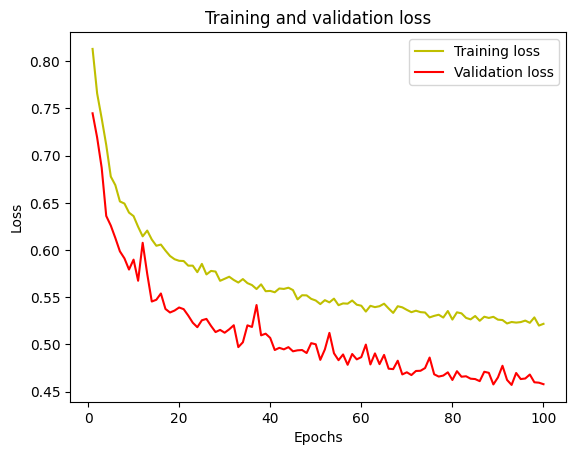

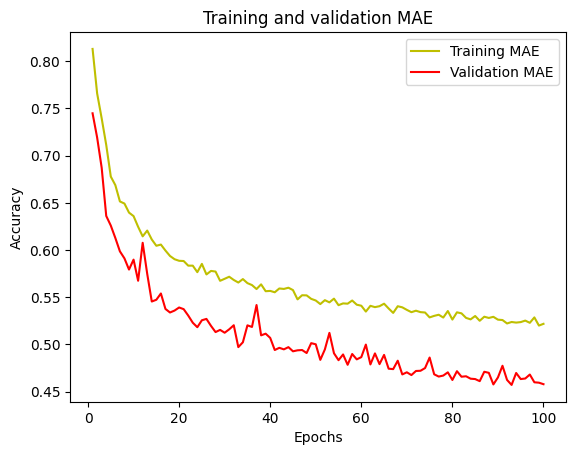

153/153 [==============================] - 0s 958us/step
Predicted values are:  [[18.408743  13.174791  41.253128   1.9716908 28.975603 ]
 [31.919962  21.328915  28.103287   1.7109656 48.00547  ]
 [44.13756   31.187296  38.88217    1.6473008 37.582443 ]
 ...
 [ 6.707461   4.18063   16.921282   1.1240879 74.658264 ]
 [10.383987   6.9349236 17.199938   1.361801  67.62735  ]
 [23.737234  17.409786  38.063347   2.939127  10.222832 ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-01-26 11:00:00+02:00  14.0    7.0               42.0             2.0  \
2021-04-11 17:00:00+02:00   5.0    5.0               17.0             1.0   
2021-03-05 17:00:00+02:00  35.0   21.0               24.0             1.0   
2021-04-27 06:00:00+02:00  51.0   36.0               23.0             1.0   
2022-05-10 03:00:00+02:00  20.0   16.0               26.0             2.0   
...      

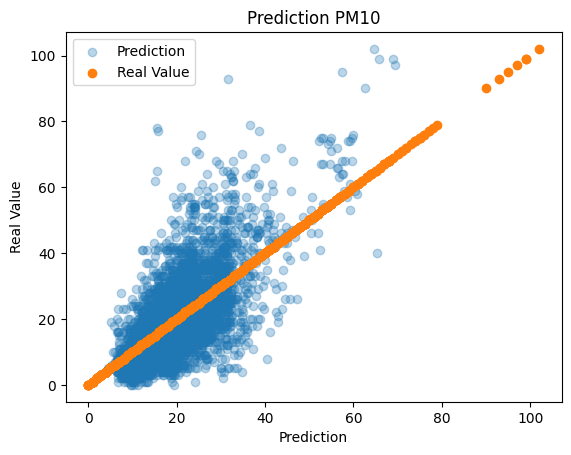

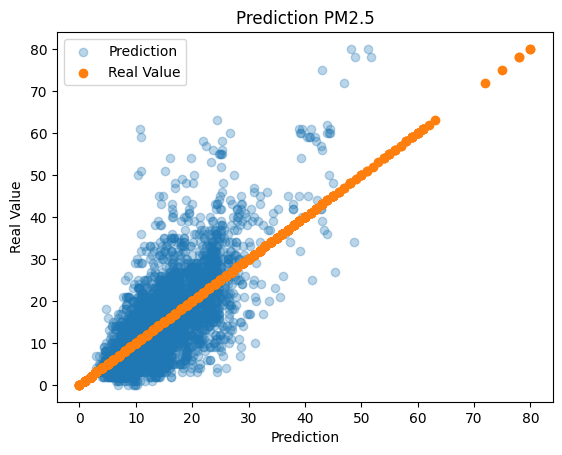

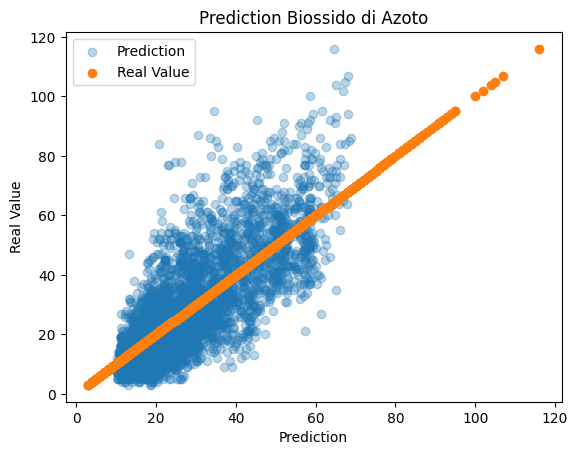

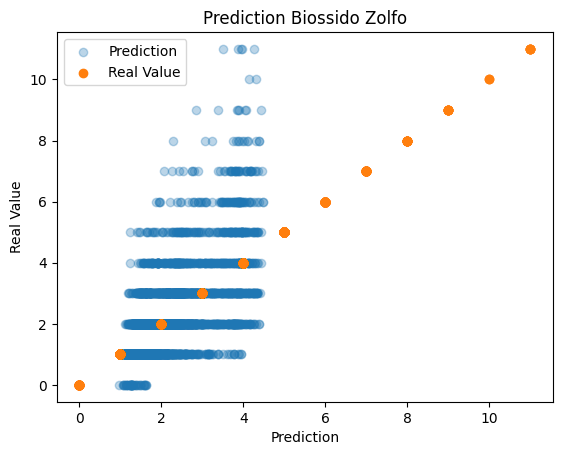

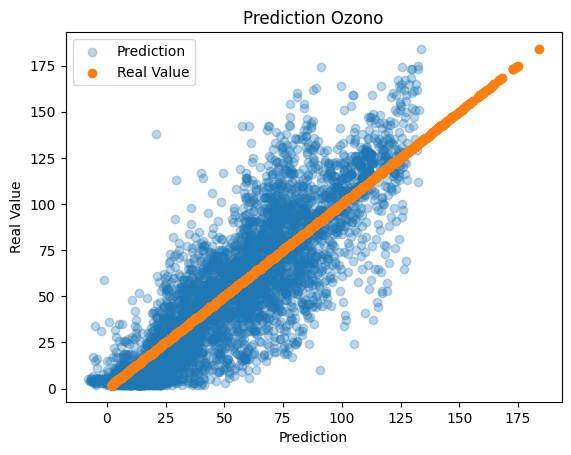

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                512       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 4s 7ms/step - loss: 0.7379 - mean_squared_error: 0.7379 - val_loss: 0.6667 - val_mean_squared_error: 0.6667
Epoch 2/100
331/354 [===========================>..] - ETA: 0s - loss: 0.6756 - mean_squared_error: 0.6756
Epoch 2: val_loss improved from 0.66670 to 0.64230, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.6824 - mean_squared_error: 0.6824 - val_loss: 0.6423 - val_mean_squared_error: 0.6423
Epoch 3/100
325/354 [==========================>...] - ETA: 0s - loss: 0.6593 - mean_squared_error: 0.6593
Epoch 3: val_loss improved from 0.64230 to 0.62350, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.6618 - mean_squared_error: 0.6618 - val_loss: 0.6235 - val_mean_squared_error: 0.6235
Epoch 4/100
334/354 [===========================>..] - ETA: 0s - loss: 0.6543 - mean_squared_error: 0.6543
Epoch 4: val_loss improved from 0.62350 to 0.60961, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.6533 - mean_squared_error: 0.6533 - val_loss: 0.6096 - val_mean_squared_error: 0.6096
Epoch 5/100
338/354 [===========================>..] - ETA: 0s - loss: 0.6439 - mean_squared_error: 0.6439
Epoch 5: val_loss improved from 0.60961 to 0.60127, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 1s 4ms/step - loss: 0.6468 - mean_squared_error: 0.6468 - val_loss: 0.6013 - val_mean_squared_error: 0.6013
Epoch 6/100
327/354 [==========================>...] - ETA: 0s - loss: 0.6298 - mean_squared_error: 0.6298
Epoch 6: val_loss improved from 0.60127 to 0.58971, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 1s 4ms/step - loss: 0.6318 - mean_squared_error: 0.6318 - val_loss: 0.5897 - val_mean_squared_error: 0.5897
Epoch 7/100
339/354 [===========================>..] - ETA: 0s - loss: 0.6211 - mean_squared_error: 0.6211
Epoch 7: val_loss improved from 0.58971 to 0.58303, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.6209 - mean_squared_error: 0.6209 - val_loss: 0.5830 - val_mean_squared_error: 0.5830
Epoch 8/100
333/354 [===========================>..] - ETA: 0s - loss: 0.6156 - mean_squared_error: 0.6156
Epoch 8: val_loss improved from 0.58303 to 0.56732, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.6143 - mean_squared_error: 0.6143 - val_loss: 0.5673 - val_mean_squared_error: 0.5673
Epoch 9/100
339/354 [===========================>..] - ETA: 0s - loss: 0.6044 - mean_squared_error: 0.6044
Epoch 9: val_loss improved from 0.56732 to 0.55573, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.6050 - mean_squared_error: 0.6050 - val_loss: 0.5557 - val_mean_squared_error: 0.5557
Epoch 10/100
323/354 [==========================>...] - ETA: 0s - loss: 0.5984 - mean_squared_error: 0.5984
Epoch 10: val_loss did not improve from 0.55573
354/354 [==============================] - 1s 2ms/step - loss: 0.5977 - mean_squared_error: 0.5977 - val_loss: 0.5597 - val_mean_squared_error: 0.5597
Epoch 11/100
325/354 [==========================>...] - ETA: 0s - loss: 0.5941 - mean_squared_error: 0.5941
Epoch 11: val_loss did not improve from 0.55573
354/354 [==============================] - 1s 2ms/step - loss: 0.5962 - mean_squared_error: 0.5962 - val_loss: 0.5652 - val_mean_squared_error: 0.5652
Epoch 12/100
334/354 [===========================>..] - ETA: 0s - loss: 0.5924 - mean_squared_error: 0.5924
Epoch 12: val_loss did not improve from 0.55573
354/354 [==============================] - 1s 2ms/step - loss: 0.5915 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5875 - mean_squared_error: 0.5875 - val_loss: 0.5420 - val_mean_squared_error: 0.5420
Epoch 14/100
334/354 [===========================>..] - ETA: 0s - loss: 0.5868 - mean_squared_error: 0.5868
Epoch 14: val_loss improved from 0.54198 to 0.53778, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.5855 - mean_squared_error: 0.5855 - val_loss: 0.5378 - val_mean_squared_error: 0.5378
Epoch 15/100
337/354 [===========================>..] - ETA: 0s - loss: 0.5758 - mean_squared_error: 0.5758
Epoch 15: val_loss improved from 0.53778 to 0.53688, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5800 - mean_squared_error: 0.5800 - val_loss: 0.5369 - val_mean_squared_error: 0.5369
Epoch 16/100
345/354 [============================>.] - ETA: 0s - loss: 0.5790 - mean_squared_error: 0.5790
Epoch 16: val_loss improved from 0.53688 to 0.52574, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5782 - mean_squared_error: 0.5782 - val_loss: 0.5257 - val_mean_squared_error: 0.5257
Epoch 17/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5800 - mean_squared_error: 0.5800
Epoch 17: val_loss did not improve from 0.52574
354/354 [==============================] - 1s 3ms/step - loss: 0.5777 - mean_squared_error: 0.5777 - val_loss: 0.5418 - val_mean_squared_error: 0.5418
Epoch 18/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5687 - mean_squared_error: 0.5687
Epoch 18: val_loss improved from 0.52574 to 0.52152, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 0.5215 - val_mean_squared_error: 0.5215
Epoch 19/100
352/354 [============================>.] - ETA: 0s - loss: 0.5711 - mean_squared_error: 0.5711
Epoch 19: val_loss improved from 0.52152 to 0.51929, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5712 - mean_squared_error: 0.5712 - val_loss: 0.5193 - val_mean_squared_error: 0.5193
Epoch 20/100
351/354 [============================>.] - ETA: 0s - loss: 0.5719 - mean_squared_error: 0.5719
Epoch 20: val_loss did not improve from 0.51929
354/354 [==============================] - 1s 3ms/step - loss: 0.5714 - mean_squared_error: 0.5714 - val_loss: 0.5285 - val_mean_squared_error: 0.5285
Epoch 21/100
350/354 [============================>.] - ETA: 0s - loss: 0.5703 - mean_squared_error: 0.5703
Epoch 21: val_loss did not improve from 0.51929
354/354 [==============================] - 1s 2ms/step - loss: 0.5694 - mean_squared_error: 0.5694 - val_loss: 0.5294 - val_mean_squared_error: 0.5294
Epoch 22/100
352/354 [============================>.] - ETA: 0s - loss: 0.5637 - mean_squared_error: 0.5637
Epoch 22: val_loss improved from 0.51929 to 0.51034, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5649 - mean_squared_error: 0.5649 - val_loss: 0.5103 - val_mean_squared_error: 0.5103
Epoch 23/100
353/354 [============================>.] - ETA: 0s - loss: 0.5665 - mean_squared_error: 0.5665
Epoch 23: val_loss did not improve from 0.51034
354/354 [==============================] - 1s 3ms/step - loss: 0.5666 - mean_squared_error: 0.5666 - val_loss: 0.5183 - val_mean_squared_error: 0.5183
Epoch 24/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5586 - mean_squared_error: 0.5586
Epoch 24: val_loss improved from 0.51034 to 0.51018, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5572 - mean_squared_error: 0.5572 - val_loss: 0.5102 - val_mean_squared_error: 0.5102
Epoch 25/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5660 - mean_squared_error: 0.5660
Epoch 25: val_loss did not improve from 0.51018
354/354 [==============================] - 1s 3ms/step - loss: 0.5627 - mean_squared_error: 0.5627 - val_loss: 0.5114 - val_mean_squared_error: 0.5114
Epoch 26/100
350/354 [============================>.] - ETA: 0s - loss: 0.5562 - mean_squared_error: 0.5562
Epoch 26: val_loss improved from 0.51018 to 0.50619, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5553 - mean_squared_error: 0.5553 - val_loss: 0.5062 - val_mean_squared_error: 0.5062
Epoch 27/100
333/354 [===========================>..] - ETA: 0s - loss: 0.5599 - mean_squared_error: 0.5599
Epoch 27: val_loss did not improve from 0.50619
354/354 [==============================] - 1s 3ms/step - loss: 0.5563 - mean_squared_error: 0.5563 - val_loss: 0.5226 - val_mean_squared_error: 0.5226
Epoch 28/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5595 - mean_squared_error: 0.5595
Epoch 28: val_loss did not improve from 0.50619
354/354 [==============================] - 1s 3ms/step - loss: 0.5597 - mean_squared_error: 0.5597 - val_loss: 0.5129 - val_mean_squared_error: 0.5129
Epoch 29/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5555 - mean_squared_error: 0.5555
Epoch 29: val_loss improved from 0.50619 to 0.49888, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5543 - mean_squared_error: 0.5543 - val_loss: 0.4989 - val_mean_squared_error: 0.4989
Epoch 30/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5525 - mean_squared_error: 0.5525
Epoch 30: val_loss did not improve from 0.49888
354/354 [==============================] - 1s 2ms/step - loss: 0.5502 - mean_squared_error: 0.5502 - val_loss: 0.5097 - val_mean_squared_error: 0.5097
Epoch 31/100
352/354 [============================>.] - ETA: 0s - loss: 0.5459 - mean_squared_error: 0.5459
Epoch 31: val_loss improved from 0.49888 to 0.49752, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5457 - mean_squared_error: 0.5457 - val_loss: 0.4975 - val_mean_squared_error: 0.4975
Epoch 32/100
349/354 [============================>.] - ETA: 0s - loss: 0.5502 - mean_squared_error: 0.5502
Epoch 32: val_loss did not improve from 0.49752
354/354 [==============================] - 1s 3ms/step - loss: 0.5509 - mean_squared_error: 0.5509 - val_loss: 0.4997 - val_mean_squared_error: 0.4997
Epoch 33/100
343/354 [============================>.] - ETA: 0s - loss: 0.5461 - mean_squared_error: 0.5461
Epoch 33: val_loss improved from 0.49752 to 0.49296, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5449 - mean_squared_error: 0.5449 - val_loss: 0.4930 - val_mean_squared_error: 0.4930
Epoch 34/100
350/354 [============================>.] - ETA: 0s - loss: 0.5449 - mean_squared_error: 0.5449
Epoch 34: val_loss improved from 0.49296 to 0.48469, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5451 - mean_squared_error: 0.5451 - val_loss: 0.4847 - val_mean_squared_error: 0.4847
Epoch 35/100
353/354 [============================>.] - ETA: 0s - loss: 0.5439 - mean_squared_error: 0.5439
Epoch 35: val_loss did not improve from 0.48469
354/354 [==============================] - 1s 3ms/step - loss: 0.5438 - mean_squared_error: 0.5438 - val_loss: 0.4889 - val_mean_squared_error: 0.4889
Epoch 36/100
350/354 [============================>.] - ETA: 0s - loss: 0.5387 - mean_squared_error: 0.5387
Epoch 36: val_loss did not improve from 0.48469
354/354 [==============================] - 1s 3ms/step - loss: 0.5397 - mean_squared_error: 0.5397 - val_loss: 0.4947 - val_mean_squared_error: 0.4947
Epoch 37/100
352/354 [============================>.] - ETA: 0s - loss: 0.5464 - mean_squared_error: 0.5464
Epoch 37: val_loss did not improve from 0.48469
354/354 [==============================] - 1s 3ms/step - loss: 0.5458 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5401 - mean_squared_error: 0.5401 - val_loss: 0.4771 - val_mean_squared_error: 0.4771
Epoch 39/100
347/354 [============================>.] - ETA: 0s - loss: 0.5375 - mean_squared_error: 0.5375
Epoch 39: val_loss did not improve from 0.47709
354/354 [==============================] - 1s 3ms/step - loss: 0.5382 - mean_squared_error: 0.5382 - val_loss: 0.4810 - val_mean_squared_error: 0.4810
Epoch 40/100
348/354 [============================>.] - ETA: 0s - loss: 0.5393 - mean_squared_error: 0.5393
Epoch 40: val_loss improved from 0.47709 to 0.47448, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5383 - mean_squared_error: 0.5383 - val_loss: 0.4745 - val_mean_squared_error: 0.4745
Epoch 41/100
350/354 [============================>.] - ETA: 0s - loss: 0.5358 - mean_squared_error: 0.5358
Epoch 41: val_loss did not improve from 0.47448
354/354 [==============================] - 1s 3ms/step - loss: 0.5355 - mean_squared_error: 0.5355 - val_loss: 0.4770 - val_mean_squared_error: 0.4770
Epoch 42/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 42: val_loss did not improve from 0.47448
354/354 [==============================] - 1s 3ms/step - loss: 0.5311 - mean_squared_error: 0.5311 - val_loss: 0.4819 - val_mean_squared_error: 0.4819
Epoch 43/100
335/354 [===========================>..] - ETA: 0s - loss: 0.5323 - mean_squared_error: 0.5323
Epoch 43: val_loss did not improve from 0.47448
354/354 [==============================] - 1s 3ms/step - loss: 0.5338 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5291 - mean_squared_error: 0.5291 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 45/100
351/354 [============================>.] - ETA: 0s - loss: 0.5353 - mean_squared_error: 0.5353
Epoch 45: val_loss did not improve from 0.46750
354/354 [==============================] - 2s 5ms/step - loss: 0.5355 - mean_squared_error: 0.5355 - val_loss: 0.4748 - val_mean_squared_error: 0.4748
Epoch 46/100
350/354 [============================>.] - ETA: 0s - loss: 0.5334 - mean_squared_error: 0.5334
Epoch 46: val_loss improved from 0.46750 to 0.46709, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 9ms/step - loss: 0.5335 - mean_squared_error: 0.5335 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 47/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5326 - mean_squared_error: 0.5326
Epoch 47: val_loss did not improve from 0.46709
354/354 [==============================] - 1s 4ms/step - loss: 0.5291 - mean_squared_error: 0.5291 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 48/100
353/354 [============================>.] - ETA: 0s - loss: 0.5282 - mean_squared_error: 0.5282
Epoch 48: val_loss did not improve from 0.46709
354/354 [==============================] - 1s 4ms/step - loss: 0.5282 - mean_squared_error: 0.5282 - val_loss: 0.4674 - val_mean_squared_error: 0.4674
Epoch 49/100
341/354 [===========================>..] - ETA: 0s - loss: 0.5289 - mean_squared_error: 0.5289
Epoch 49: val_loss did not improve from 0.46709
354/354 [==============================] - 1s 4ms/step - loss: 0.5280 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5276 - mean_squared_error: 0.5276 - val_loss: 0.4608 - val_mean_squared_error: 0.4608
Epoch 51/100
345/354 [============================>.] - ETA: 0s - loss: 0.5222 - mean_squared_error: 0.5222
Epoch 51: val_loss did not improve from 0.46079
354/354 [==============================] - 1s 3ms/step - loss: 0.5246 - mean_squared_error: 0.5246 - val_loss: 0.4673 - val_mean_squared_error: 0.4673
Epoch 52/100
347/354 [============================>.] - ETA: 0s - loss: 0.5286 - mean_squared_error: 0.5286
Epoch 52: val_loss improved from 0.46079 to 0.45629, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5271 - mean_squared_error: 0.5271 - val_loss: 0.4563 - val_mean_squared_error: 0.4563
Epoch 53/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5258 - mean_squared_error: 0.5258
Epoch 53: val_loss improved from 0.45629 to 0.45578, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 4s 11ms/step - loss: 0.5243 - mean_squared_error: 0.5243 - val_loss: 0.4558 - val_mean_squared_error: 0.4558
Epoch 54/100
352/354 [============================>.] - ETA: 0s - loss: 0.5225 - mean_squared_error: 0.5225
Epoch 54: val_loss did not improve from 0.45578
354/354 [==============================] - 1s 4ms/step - loss: 0.5223 - mean_squared_error: 0.5223 - val_loss: 0.4682 - val_mean_squared_error: 0.4682
Epoch 55/100
341/354 [===========================>..] - ETA: 0s - loss: 0.5158 - mean_squared_error: 0.5158
Epoch 55: val_loss improved from 0.45578 to 0.45308, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 9ms/step - loss: 0.5148 - mean_squared_error: 0.5148 - val_loss: 0.4531 - val_mean_squared_error: 0.4531
Epoch 56/100
345/354 [============================>.] - ETA: 0s - loss: 0.5179 - mean_squared_error: 0.5179
Epoch 56: val_loss did not improve from 0.45308
354/354 [==============================] - 1s 4ms/step - loss: 0.5183 - mean_squared_error: 0.5183 - val_loss: 0.4590 - val_mean_squared_error: 0.4590
Epoch 57/100
354/354 [==============================] - ETA: 0s - loss: 0.5164 - mean_squared_error: 0.5164
Epoch 57: val_loss improved from 0.45308 to 0.45049, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5164 - mean_squared_error: 0.5164 - val_loss: 0.4505 - val_mean_squared_error: 0.4505
Epoch 58/100
338/354 [===========================>..] - ETA: 0s - loss: 0.5224 - mean_squared_error: 0.5224
Epoch 58: val_loss did not improve from 0.45049
354/354 [==============================] - 1s 3ms/step - loss: 0.5210 - mean_squared_error: 0.5210 - val_loss: 0.4547 - val_mean_squared_error: 0.4547
Epoch 59/100
352/354 [============================>.] - ETA: 0s - loss: 0.5193 - mean_squared_error: 0.5193
Epoch 59: val_loss improved from 0.45049 to 0.44655, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.5193 - mean_squared_error: 0.5193 - val_loss: 0.4465 - val_mean_squared_error: 0.4465
Epoch 60/100
348/354 [============================>.] - ETA: 0s - loss: 0.5155 - mean_squared_error: 0.5155
Epoch 60: val_loss did not improve from 0.44655
354/354 [==============================] - 1s 3ms/step - loss: 0.5155 - mean_squared_error: 0.5155 - val_loss: 0.4691 - val_mean_squared_error: 0.4691
Epoch 61/100
354/354 [==============================] - ETA: 0s - loss: 0.5131 - mean_squared_error: 0.5131
Epoch 61: val_loss improved from 0.44655 to 0.43924, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5131 - mean_squared_error: 0.5131 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 62/100
354/354 [==============================] - ETA: 0s - loss: 0.5132 - mean_squared_error: 0.5132
Epoch 62: val_loss did not improve from 0.43924
354/354 [==============================] - 1s 3ms/step - loss: 0.5132 - mean_squared_error: 0.5132 - val_loss: 0.4459 - val_mean_squared_error: 0.4459
Epoch 63/100
336/354 [===========================>..] - ETA: 0s - loss: 0.5117 - mean_squared_error: 0.5117
Epoch 63: val_loss did not improve from 0.43924
354/354 [==============================] - 1s 3ms/step - loss: 0.5097 - mean_squared_error: 0.5097 - val_loss: 0.4451 - val_mean_squared_error: 0.4451
Epoch 64/100
351/354 [============================>.] - ETA: 0s - loss: 0.5148 - mean_squared_error: 0.5148
Epoch 64: val_loss did not improve from 0.43924
354/354 [==============================] - 1s 2ms/step - loss: 0.5143 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5146 - mean_squared_error: 0.5146 - val_loss: 0.4380 - val_mean_squared_error: 0.4380
Epoch 69/100
336/354 [===========================>..] - ETA: 0s - loss: 0.5089 - mean_squared_error: 0.5089
Epoch 69: val_loss did not improve from 0.43804
354/354 [==============================] - 1s 3ms/step - loss: 0.5110 - mean_squared_error: 0.5110 - val_loss: 0.4388 - val_mean_squared_error: 0.4388
Epoch 70/100
343/354 [============================>.] - ETA: 0s - loss: 0.5063 - mean_squared_error: 0.5063
Epoch 70: val_loss improved from 0.43804 to 0.43312, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5088 - mean_squared_error: 0.5088 - val_loss: 0.4331 - val_mean_squared_error: 0.4331
Epoch 71/100
351/354 [============================>.] - ETA: 0s - loss: 0.5030 - mean_squared_error: 0.5030
Epoch 71: val_loss improved from 0.43312 to 0.43273, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5036 - mean_squared_error: 0.5036 - val_loss: 0.4327 - val_mean_squared_error: 0.4327
Epoch 72/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5071 - mean_squared_error: 0.5071
Epoch 72: val_loss did not improve from 0.43273
354/354 [==============================] - 1s 3ms/step - loss: 0.5053 - mean_squared_error: 0.5053 - val_loss: 0.4428 - val_mean_squared_error: 0.4428
Epoch 73/100
344/354 [============================>.] - ETA: 0s - loss: 0.4968 - mean_squared_error: 0.4968
Epoch 73: val_loss did not improve from 0.43273
354/354 [==============================] - 1s 2ms/step - loss: 0.4981 - mean_squared_error: 0.4981 - val_loss: 0.4353 - val_mean_squared_error: 0.4353
Epoch 74/100
353/354 [============================>.] - ETA: 0s - loss: 0.5005 - mean_squared_error: 0.5005
Epoch 74: val_loss improved from 0.43273 to 0.43156, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5008 - mean_squared_error: 0.5008 - val_loss: 0.4316 - val_mean_squared_error: 0.4316
Epoch 75/100
338/354 [===========================>..] - ETA: 0s - loss: 0.5048 - mean_squared_error: 0.5048
Epoch 75: val_loss improved from 0.43156 to 0.42805, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5080 - mean_squared_error: 0.5080 - val_loss: 0.4280 - val_mean_squared_error: 0.4280
Epoch 76/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5023 - mean_squared_error: 0.5023
Epoch 76: val_loss improved from 0.42805 to 0.42613, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5028 - mean_squared_error: 0.5028 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 77/100
352/354 [============================>.] - ETA: 0s - loss: 0.5071 - mean_squared_error: 0.5071
Epoch 77: val_loss did not improve from 0.42613
354/354 [==============================] - 1s 3ms/step - loss: 0.5072 - mean_squared_error: 0.5072 - val_loss: 0.4289 - val_mean_squared_error: 0.4289
Epoch 78/100
351/354 [============================>.] - ETA: 0s - loss: 0.5024 - mean_squared_error: 0.5024
Epoch 78: val_loss did not improve from 0.42613
354/354 [==============================] - 1s 4ms/step - loss: 0.5030 - mean_squared_error: 0.5030 - val_loss: 0.4284 - val_mean_squared_error: 0.4284
Epoch 79/100
350/354 [============================>.] - ETA: 0s - loss: 0.5034 - mean_squared_error: 0.5034
Epoch 79: val_loss did not improve from 0.42613
354/354 [==============================] - 1s 3ms/step - loss: 0.5028 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.4944 - mean_squared_error: 0.4944 - val_loss: 0.4175 - val_mean_squared_error: 0.4175
Epoch 87/100
334/354 [===========================>..] - ETA: 0s - loss: 0.4931 - mean_squared_error: 0.4931
Epoch 87: val_loss did not improve from 0.41745
354/354 [==============================] - 1s 2ms/step - loss: 0.4922 - mean_squared_error: 0.4922 - val_loss: 0.4324 - val_mean_squared_error: 0.4324
Epoch 88/100
349/354 [============================>.] - ETA: 0s - loss: 0.4897 - mean_squared_error: 0.4897
Epoch 88: val_loss did not improve from 0.41745
354/354 [==============================] - 1s 3ms/step - loss: 0.4899 - mean_squared_error: 0.4899 - val_loss: 0.4206 - val_mean_squared_error: 0.4206
Epoch 89/100
337/354 [===========================>..] - ETA: 0s - loss: 0.4971 - mean_squared_error: 0.4971
Epoch 89: val_loss did not improve from 0.41745
354/354 [==============================] - 1s 2ms/step - loss: 0.4944 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.4909 - mean_squared_error: 0.4909 - val_loss: 0.4137 - val_mean_squared_error: 0.4137
Epoch 94/100
348/354 [============================>.] - ETA: 0s - loss: 0.4915 - mean_squared_error: 0.4915
Epoch 94: val_loss did not improve from 0.41370
354/354 [==============================] - 1s 2ms/step - loss: 0.4908 - mean_squared_error: 0.4908 - val_loss: 0.4292 - val_mean_squared_error: 0.4292
Epoch 95/100
341/354 [===========================>..] - ETA: 0s - loss: 0.4899 - mean_squared_error: 0.4899
Epoch 95: val_loss did not improve from 0.41370
354/354 [==============================] - 1s 2ms/step - loss: 0.4899 - mean_squared_error: 0.4899 - val_loss: 0.4215 - val_mean_squared_error: 0.4215
Epoch 96/100
330/354 [==========================>...] - ETA: 0s - loss: 0.4929 - mean_squared_error: 0.4929
Epoch 96: val_loss did not improve from 0.41370
354/354 [==============================] - 1s 2ms/step - loss: 0.4906 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.4866 - mean_squared_error: 0.4866 - val_loss: 0.4134 - val_mean_squared_error: 0.4134
Epoch 99/100
331/354 [===========================>..] - ETA: 0s - loss: 0.4936 - mean_squared_error: 0.4936
Epoch 99: val_loss did not improve from 0.41338
354/354 [==============================] - 1s 2ms/step - loss: 0.4931 - mean_squared_error: 0.4931 - val_loss: 0.4209 - val_mean_squared_error: 0.4209
Epoch 100/100
336/354 [===========================>..] - ETA: 0s - loss: 0.4853 - mean_squared_error: 0.4853
Epoch 100: val_loss did not improve from 0.41338
354/354 [==============================] - 1s 2ms/step - loss: 0.4867 - mean_squared_error: 0.4867 - val_loss: 0.4152 - val_mean_squared_error: 0.4152


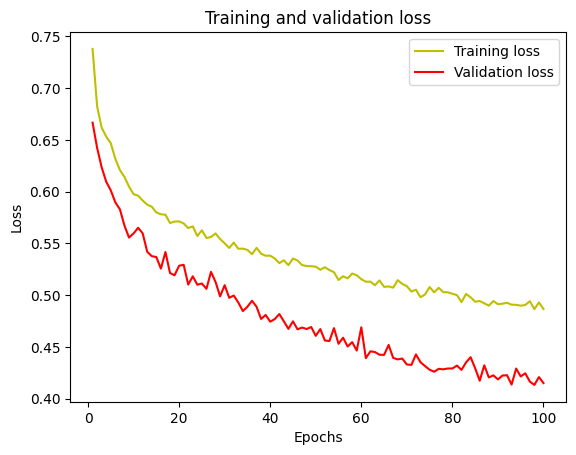

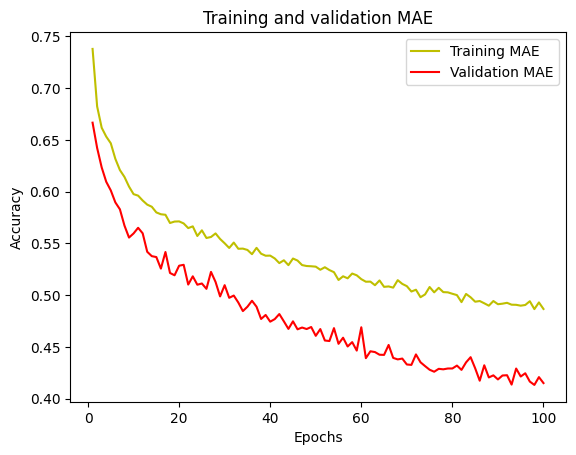

190/190 [==============================] - 0s 945us/step
Predicted values are:  [[ 12.903984    8.789416   17.299314    1.421409   67.636024 ]
 [ 13.09474     8.865776   14.3698225   1.4755278  82.24735  ]
 [ 29.067244   22.083508   47.22574     2.4473438  22.386663 ]
 ...
 [ 25.878542   18.280756   41.290882    3.325026    1.9072711]
 [ 19.909676   14.795843   13.397803    2.3557253 113.48487  ]
 [ 18.921577   12.783099   18.729181    1.9514515  53.03038  ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-07-05 23:00:00+02:00  15.0    9.0               16.0             1.0  \
2023-06-26 01:00:00+02:00  24.0   12.0               13.0             1.0   
2022-03-04 10:00:00+02:00  59.0   48.0               56.0             4.0   
2022-01-29 15:00:00+02:00   9.0    4.0               27.0             1.0   
2023-02-19 09:00:00+02:00  65.0   58.0               40.

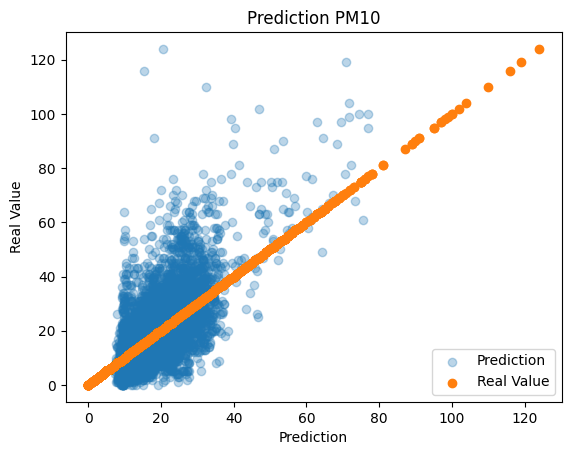

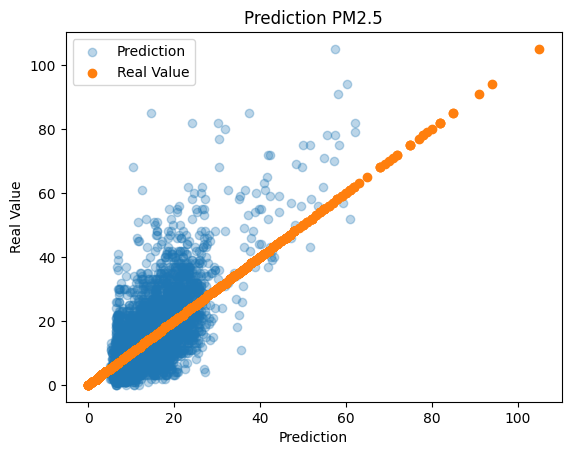

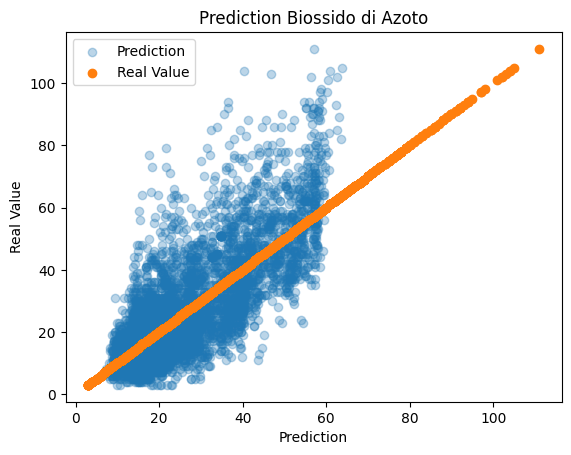

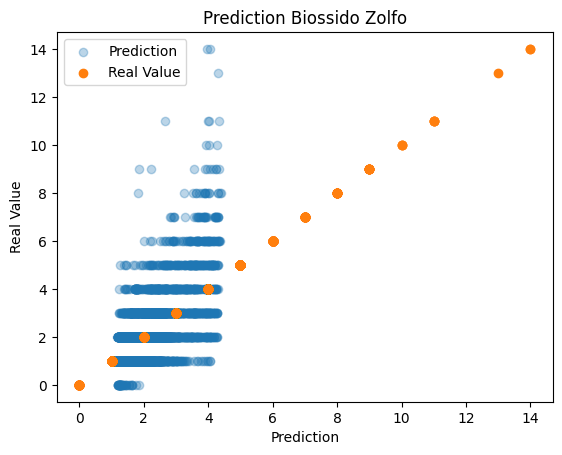

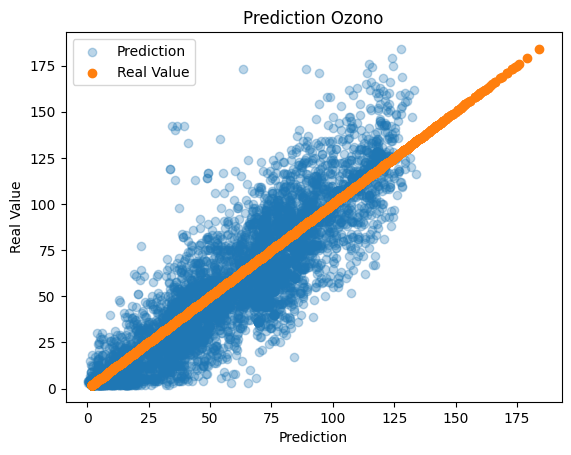

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                512       
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 3s 34ms/step - loss: 0.7814 - mean_squared_error: 0.7814 - val_loss: 0.5731 - val_mean_squared_error: 0.5731
Epoch 2/100
38/44 [========================>.....] - ETA: 0s - loss: 0.5858 - mean_squared_error: 0.5858
Epoch 2: val_loss improved from 0.57310 to 0.50435, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 3s 58ms/step - loss: 0.5979 - mean_squared_error: 0.5979 - val_loss: 0.5044 - val_mean_squared_error: 0.5044
Epoch 3/100
25/44 [================>.............] - ETA: 0s - loss: 0.5565 - mean_squared_error: 0.5565
Epoch 3: val_loss improved from 0.50435 to 0.49487, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.5585 - mean_squared_error: 0.5585 - val_loss: 0.4949 - val_mean_squared_error: 0.4949
Epoch 4/100
43/44 [============================>.] - ETA: 0s - loss: 0.5448 - mean_squared_error: 0.5448
Epoch 4: val_loss improved from 0.49487 to 0.47697, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 29ms/step - loss: 0.5437 - mean_squared_error: 0.5437 - val_loss: 0.4770 - val_mean_squared_error: 0.4770
Epoch 5/100
40/44 [==========================>...] - ETA: 0s - loss: 0.5295 - mean_squared_error: 0.5295
Epoch 5: val_loss improved from 0.47697 to 0.46200, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 28ms/step - loss: 0.5311 - mean_squared_error: 0.5311 - val_loss: 0.4620 - val_mean_squared_error: 0.4620
Epoch 6/100
37/44 [========================>.....] - ETA: 0s - loss: 0.5160 - mean_squared_error: 0.5160
Epoch 6: val_loss improved from 0.46200 to 0.45874, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 7/100
21/44 [=============>................] - ETA: 0s - loss: 0.4794 - mean_squared_error: 0.4794
Epoch 7: val_loss improved from 0.45874 to 0.44514, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.5110 - mean_squared_error: 0.5110 - val_loss: 0.4451 - val_mean_squared_error: 0.4451
Epoch 8/100
22/44 [==============>...............] - ETA: 0s - loss: 0.5318 - mean_squared_error: 0.5318
Epoch 8: val_loss improved from 0.44514 to 0.44314, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.4953 - mean_squared_error: 0.4953 - val_loss: 0.4431 - val_mean_squared_error: 0.4431
Epoch 9/100
28/44 [==================>...........] - ETA: 0s - loss: 0.5132 - mean_squared_error: 0.5132
Epoch 9: val_loss improved from 0.44314 to 0.44106, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 28ms/step - loss: 0.5003 - mean_squared_error: 0.5003 - val_loss: 0.4411 - val_mean_squared_error: 0.4411
Epoch 10/100
39/44 [=========================>....] - ETA: 0s - loss: 0.4842 - mean_squared_error: 0.4842
Epoch 10: val_loss improved from 0.44106 to 0.43280, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.4786 - mean_squared_error: 0.4786 - val_loss: 0.4328 - val_mean_squared_error: 0.4328
Epoch 11/100
35/44 [======================>.......] - ETA: 0s - loss: 0.4833 - mean_squared_error: 0.4833
Epoch 11: val_loss did not improve from 0.43280
44/44 [==============================] - 0s 4ms/step - loss: 0.4866 - mean_squared_error: 0.4866 - val_loss: 0.4355 - val_mean_squared_error: 0.4355
Epoch 12/100
32/44 [====================>.........] - ETA: 0s - loss: 0.4557 - mean_squared_error: 0.4557
Epoch 12: val_loss improved from 0.43280 to 0.42925, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.4730 - mean_squared_error: 0.4730 - val_loss: 0.4293 - val_mean_squared_error: 0.4293
Epoch 13/100
24/44 [===============>..............] - ETA: 0s - loss: 0.4346 - mean_squared_error: 0.4346
Epoch 13: val_loss improved from 0.42925 to 0.41861, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 26ms/step - loss: 0.4631 - mean_squared_error: 0.4631 - val_loss: 0.4186 - val_mean_squared_error: 0.4186
Epoch 14/100
37/44 [========================>.....] - ETA: 0s - loss: 0.4707 - mean_squared_error: 0.4707
Epoch 14: val_loss did not improve from 0.41861
44/44 [==============================] - 0s 3ms/step - loss: 0.4695 - mean_squared_error: 0.4695 - val_loss: 0.4422 - val_mean_squared_error: 0.4422
Epoch 15/100
31/44 [====================>.........] - ETA: 0s - loss: 0.4502 - mean_squared_error: 0.4502
Epoch 15: val_loss did not improve from 0.41861
44/44 [==============================] - 0s 2ms/step - loss: 0.4688 - mean_squared_error: 0.4688 - val_loss: 0.4271 - val_mean_squared_error: 0.4271
Epoch 16/100
32/44 [====================>.........] - ETA: 0s - loss: 0.4521 - mean_squared_error: 0.4521
Epoch 16: val_loss did not improve from 0.41861
44/44 [==============================] - 0s 2ms/step - loss: 0.4625 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.4603 - mean_squared_error: 0.4603 - val_loss: 0.4149 - val_mean_squared_error: 0.4149
Epoch 18/100
24/44 [===============>..............] - ETA: 0s - loss: 0.4416 - mean_squared_error: 0.4416
Epoch 18: val_loss did not improve from 0.41492
44/44 [==============================] - 0s 3ms/step - loss: 0.4572 - mean_squared_error: 0.4572 - val_loss: 0.4149 - val_mean_squared_error: 0.4149
Epoch 19/100
32/44 [====================>.........] - ETA: 0s - loss: 0.4708 - mean_squared_error: 0.4708
Epoch 19: val_loss did not improve from 0.41492
44/44 [==============================] - 0s 2ms/step - loss: 0.4589 - mean_squared_error: 0.4589 - val_loss: 0.4207 - val_mean_squared_error: 0.4207
Epoch 20/100
34/44 [======================>.......] - ETA: 0s - loss: 0.4688 - mean_squared_error: 0.4688
Epoch 20: val_loss did not improve from 0.41492
44/44 [==============================] - 0s 2ms/step - loss: 0.4562 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.4483 - mean_squared_error: 0.4483 - val_loss: 0.4065 - val_mean_squared_error: 0.4065
Epoch 22/100
43/44 [============================>.] - ETA: 0s - loss: 0.4459 - mean_squared_error: 0.4459
Epoch 22: val_loss did not improve from 0.40649
44/44 [==============================] - 0s 3ms/step - loss: 0.4490 - mean_squared_error: 0.4490 - val_loss: 0.4115 - val_mean_squared_error: 0.4115
Epoch 23/100
26/44 [================>.............] - ETA: 0s - loss: 0.4414 - mean_squared_error: 0.4414
Epoch 23: val_loss improved from 0.40649 to 0.40450, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 27ms/step - loss: 0.4449 - mean_squared_error: 0.4449 - val_loss: 0.4045 - val_mean_squared_error: 0.4045
Epoch 24/100
43/44 [============================>.] - ETA: 0s - loss: 0.4401 - mean_squared_error: 0.4401
Epoch 24: val_loss did not improve from 0.40450
44/44 [==============================] - 0s 3ms/step - loss: 0.4417 - mean_squared_error: 0.4417 - val_loss: 0.4107 - val_mean_squared_error: 0.4107
Epoch 25/100
31/44 [====================>.........] - ETA: 0s - loss: 0.4503 - mean_squared_error: 0.4503
Epoch 25: val_loss improved from 0.40450 to 0.40268, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 25ms/step - loss: 0.4432 - mean_squared_error: 0.4432 - val_loss: 0.4027 - val_mean_squared_error: 0.4027
Epoch 26/100
44/44 [==============================] - ETA: 0s - loss: 0.4412 - mean_squared_error: 0.4412
Epoch 26: val_loss did not improve from 0.40268
44/44 [==============================] - 0s 3ms/step - loss: 0.4412 - mean_squared_error: 0.4412 - val_loss: 0.4119 - val_mean_squared_error: 0.4119
Epoch 27/100
32/44 [====================>.........] - ETA: 0s - loss: 0.4556 - mean_squared_error: 0.4556
Epoch 27: val_loss did not improve from 0.40268
44/44 [==============================] - 0s 3ms/step - loss: 0.4426 - mean_squared_error: 0.4426 - val_loss: 0.4334 - val_mean_squared_error: 0.4334
Epoch 28/100
37/44 [========================>.....] - ETA: 0s - loss: 0.4282 - mean_squared_error: 0.4282
Epoch 28: val_loss did not improve from 0.40268
44/44 [==============================] - 0s 4ms/step - loss: 0.4357 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 29ms/step - loss: 0.4252 - mean_squared_error: 0.4252 - val_loss: 0.3920 - val_mean_squared_error: 0.3920
Epoch 36/100
23/44 [==============>...............] - ETA: 0s - loss: 0.4182 - mean_squared_error: 0.4182
Epoch 36: val_loss did not improve from 0.39198
44/44 [==============================] - 0s 3ms/step - loss: 0.4431 - mean_squared_error: 0.4431 - val_loss: 0.4020 - val_mean_squared_error: 0.4020
Epoch 37/100
38/44 [========================>.....] - ETA: 0s - loss: 0.4258 - mean_squared_error: 0.4258
Epoch 37: val_loss did not improve from 0.39198
44/44 [==============================] - 0s 2ms/step - loss: 0.4308 - mean_squared_error: 0.4308 - val_loss: 0.4098 - val_mean_squared_error: 0.4098
Epoch 38/100
37/44 [========================>.....] - ETA: 0s - loss: 0.4306 - mean_squared_error: 0.4306
Epoch 38: val_loss did not improve from 0.39198
44/44 [==============================] - 0s 2ms/step - loss: 0.4254 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 28ms/step - loss: 0.4193 - mean_squared_error: 0.4193 - val_loss: 0.3891 - val_mean_squared_error: 0.3891
Epoch 43/100
31/44 [====================>.........] - ETA: 0s - loss: 0.4343 - mean_squared_error: 0.4343
Epoch 43: val_loss did not improve from 0.38914
44/44 [==============================] - 0s 3ms/step - loss: 0.4303 - mean_squared_error: 0.4303 - val_loss: 0.4058 - val_mean_squared_error: 0.4058
Epoch 44/100
38/44 [========================>.....] - ETA: 0s - loss: 0.4237 - mean_squared_error: 0.4237
Epoch 44: val_loss did not improve from 0.38914
44/44 [==============================] - 0s 4ms/step - loss: 0.4199 - mean_squared_error: 0.4199 - val_loss: 0.3944 - val_mean_squared_error: 0.3944
Epoch 45/100
21/44 [=============>................] - ETA: 0s - loss: 0.4258 - mean_squared_error: 0.4258
Epoch 45: val_loss did not improve from 0.38914
44/44 [==============================] - 0s 3ms/step - loss: 0.4198 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 28ms/step - loss: 0.4168 - mean_squared_error: 0.4168 - val_loss: 0.3829 - val_mean_squared_error: 0.3829
Epoch 50/100
23/44 [==============>...............] - ETA: 0s - loss: 0.4212 - mean_squared_error: 0.4212
Epoch 50: val_loss did not improve from 0.38290
44/44 [==============================] - 0s 3ms/step - loss: 0.4191 - mean_squared_error: 0.4191 - val_loss: 0.3839 - val_mean_squared_error: 0.3839
Epoch 51/100
29/44 [==================>...........] - ETA: 0s - loss: 0.3910 - mean_squared_error: 0.3910
Epoch 51: val_loss did not improve from 0.38290
44/44 [==============================] - 0s 3ms/step - loss: 0.4039 - mean_squared_error: 0.4039 - val_loss: 0.4198 - val_mean_squared_error: 0.4198
Epoch 52/100
31/44 [====================>.........] - ETA: 0s - loss: 0.4109 - mean_squared_error: 0.4109
Epoch 52: val_loss did not improve from 0.38290
44/44 [==============================] - 0s 3ms/step - loss: 0.4123 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 24ms/step - loss: 0.4241 - mean_squared_error: 0.4241 - val_loss: 0.3805 - val_mean_squared_error: 0.3805
Epoch 54/100
41/44 [==========================>...] - ETA: 0s - loss: 0.4144 - mean_squared_error: 0.4144
Epoch 54: val_loss did not improve from 0.38052
44/44 [==============================] - 0s 3ms/step - loss: 0.4131 - mean_squared_error: 0.4131 - val_loss: 0.3808 - val_mean_squared_error: 0.3808
Epoch 55/100
32/44 [====================>.........] - ETA: 0s - loss: 0.4283 - mean_squared_error: 0.4283
Epoch 55: val_loss did not improve from 0.38052
44/44 [==============================] - 0s 3ms/step - loss: 0.4257 - mean_squared_error: 0.4257 - val_loss: 0.3924 - val_mean_squared_error: 0.3924
Epoch 56/100
30/44 [===================>..........] - ETA: 0s - loss: 0.4008 - mean_squared_error: 0.4008
Epoch 56: val_loss did not improve from 0.38052
44/44 [==============================] - 0s 3ms/step - loss: 0.4121 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 52ms/step - loss: 0.4066 - mean_squared_error: 0.4066 - val_loss: 0.3768 - val_mean_squared_error: 0.3768
Epoch 63/100
34/44 [======================>.......] - ETA: 0s - loss: 0.4219 - mean_squared_error: 0.4219
Epoch 63: val_loss did not improve from 0.37685
44/44 [==============================] - 0s 4ms/step - loss: 0.4151 - mean_squared_error: 0.4151 - val_loss: 0.3895 - val_mean_squared_error: 0.3895
Epoch 64/100
40/44 [==========================>...] - ETA: 0s - loss: 0.4129 - mean_squared_error: 0.4129
Epoch 64: val_loss did not improve from 0.37685
44/44 [==============================] - 0s 4ms/step - loss: 0.4104 - mean_squared_error: 0.4104 - val_loss: 0.3995 - val_mean_squared_error: 0.3995
Epoch 65/100
41/44 [==========================>...] - ETA: 0s - loss: 0.3951 - mean_squared_error: 0.3951
Epoch 65: val_loss did not improve from 0.37685
44/44 [==============================] - 0s 4ms/step - loss: 0.4015 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 35ms/step - loss: 0.4085 - mean_squared_error: 0.4085 - val_loss: 0.3764 - val_mean_squared_error: 0.3764
Epoch 72/100
29/44 [==================>...........] - ETA: 0s - loss: 0.4180 - mean_squared_error: 0.4180
Epoch 72: val_loss did not improve from 0.37638
44/44 [==============================] - 0s 4ms/step - loss: 0.4067 - mean_squared_error: 0.4067 - val_loss: 0.3886 - val_mean_squared_error: 0.3886
Epoch 73/100
42/44 [===========================>..] - ETA: 0s - loss: 0.4055 - mean_squared_error: 0.4055
Epoch 73: val_loss did not improve from 0.37638
44/44 [==============================] - 0s 4ms/step - loss: 0.4046 - mean_squared_error: 0.4046 - val_loss: 0.3926 - val_mean_squared_error: 0.3926
Epoch 74/100
42/44 [===========================>..] - ETA: 0s - loss: 0.3991 - mean_squared_error: 0.3991
Epoch 74: val_loss did not improve from 0.37638
44/44 [==============================] - 0s 4ms/step - loss: 0.4025 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.4000 - mean_squared_error: 0.4000 - val_loss: 0.3729 - val_mean_squared_error: 0.3729
Epoch 82/100
38/44 [========================>.....] - ETA: 0s - loss: 0.3945 - mean_squared_error: 0.3945
Epoch 82: val_loss improved from 0.37288 to 0.36444, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 34ms/step - loss: 0.3924 - mean_squared_error: 0.3924 - val_loss: 0.3644 - val_mean_squared_error: 0.3644
Epoch 83/100
39/44 [=========================>....] - ETA: 0s - loss: 0.3913 - mean_squared_error: 0.3913
Epoch 83: val_loss did not improve from 0.36444
44/44 [==============================] - 0s 4ms/step - loss: 0.3969 - mean_squared_error: 0.3969 - val_loss: 0.3654 - val_mean_squared_error: 0.3654
Epoch 84/100
24/44 [===============>..............] - ETA: 0s - loss: 0.4192 - mean_squared_error: 0.4192
Epoch 84: val_loss did not improve from 0.36444
44/44 [==============================] - 0s 3ms/step - loss: 0.3989 - mean_squared_error: 0.3989 - val_loss: 0.3700 - val_mean_squared_error: 0.3700
Epoch 85/100
42/44 [===========================>..] - ETA: 0s - loss: 0.3947 - mean_squared_error: 0.3947
Epoch 85: val_loss did not improve from 0.36444
44/44 [==============================] - 0s 4ms/step - loss: 0.3952 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 2s 37ms/step - loss: 0.3892 - mean_squared_error: 0.3892 - val_loss: 0.3600 - val_mean_squared_error: 0.3600
Epoch 91/100
38/44 [========================>.....] - ETA: 0s - loss: 0.3871 - mean_squared_error: 0.3871
Epoch 91: val_loss did not improve from 0.36005
44/44 [==============================] - 0s 4ms/step - loss: 0.3834 - mean_squared_error: 0.3834 - val_loss: 0.3728 - val_mean_squared_error: 0.3728
Epoch 92/100
40/44 [==========================>...] - ETA: 0s - loss: 0.3844 - mean_squared_error: 0.3844
Epoch 92: val_loss did not improve from 0.36005
44/44 [==============================] - 0s 4ms/step - loss: 0.3862 - mean_squared_error: 0.3862 - val_loss: 0.3602 - val_mean_squared_error: 0.3602
Epoch 93/100
40/44 [==========================>...] - ETA: 0s - loss: 0.3825 - mean_squared_error: 0.3825
Epoch 93: val_loss improved from 0.36005 to 0.35773, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


44/44 [==============================] - 1s 35ms/step - loss: 0.3819 - mean_squared_error: 0.3819 - val_loss: 0.3577 - val_mean_squared_error: 0.3577
Epoch 94/100
33/44 [=====================>........] - ETA: 0s - loss: 0.3814 - mean_squared_error: 0.3814
Epoch 94: val_loss did not improve from 0.35773
44/44 [==============================] - 0s 4ms/step - loss: 0.3846 - mean_squared_error: 0.3846 - val_loss: 0.3787 - val_mean_squared_error: 0.3787
Epoch 95/100
41/44 [==========================>...] - ETA: 0s - loss: 0.3864 - mean_squared_error: 0.3864
Epoch 95: val_loss did not improve from 0.35773
44/44 [==============================] - 0s 4ms/step - loss: 0.3864 - mean_squared_error: 0.3864 - val_loss: 0.3704 - val_mean_squared_error: 0.3704
Epoch 96/100
36/44 [=======================>......] - ETA: 0s - loss: 0.3720 - mean_squared_error: 0.3720
Epoch 96: val_loss did not improve from 0.35773
44/44 [==============================] - 0s 4ms/step - loss: 0.3879 - mean_squared_error: 

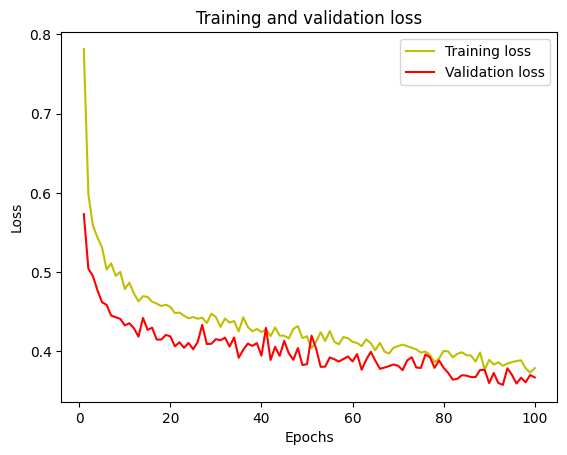

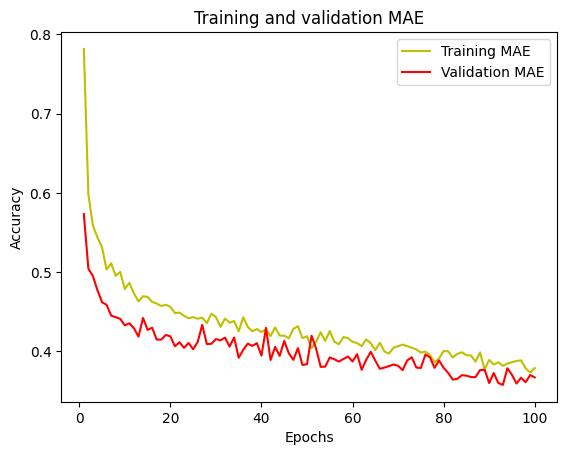

24/24 [==============================] - 0s 1ms/step
Predicted values are:  [[26.344728  18.411978  22.663      1.228784  66.11033  ]
 [13.570418  10.474974  33.203194   1.6733538 28.457508 ]
 [15.214071   9.438712  18.320854   1.1324052 83.13097  ]
 ...
 [15.685633  12.214523  35.950672   1.7974353 20.667645 ]
 [69.70337   48.532818  64.163635   2.7206922  4.991294 ]
 [37.208122  28.018936  77.05584    5.5179644 -2.5913668]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-04-01 02:00:00+02:00  22.0   15.0               18.0             1.0  \
2021-01-24 07:00:00+02:00  11.0    8.0               37.0             1.0   
2021-04-15 19:00:00+02:00   6.0    6.0               26.0             1.0   
2021-01-31 20:00:00+02:00  28.0   26.0               54.0             2.0   
2021-03-11 20:00:00+02:00  63.0   47.0               80.0             2.0   
...          

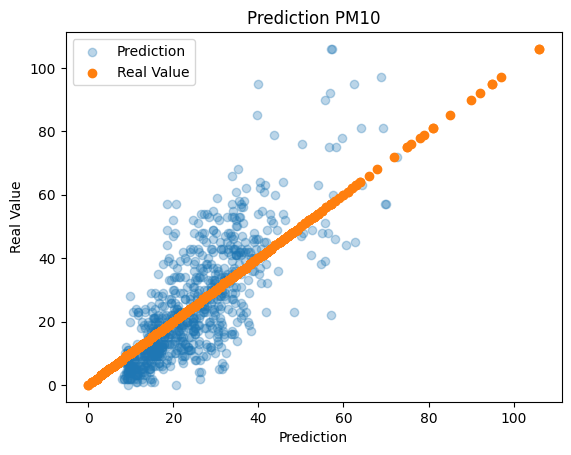

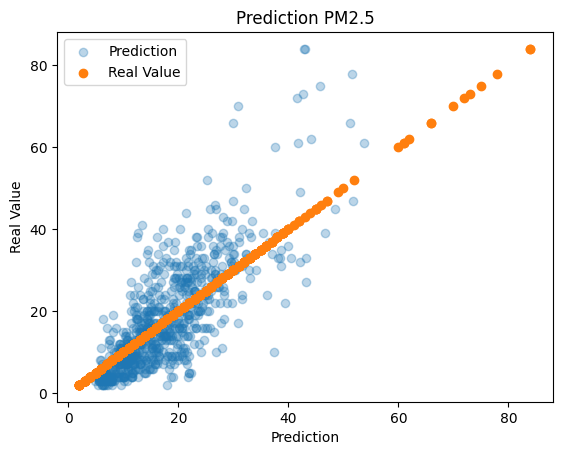

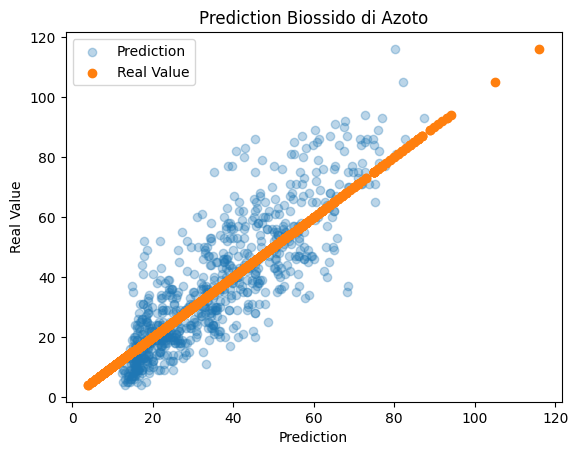

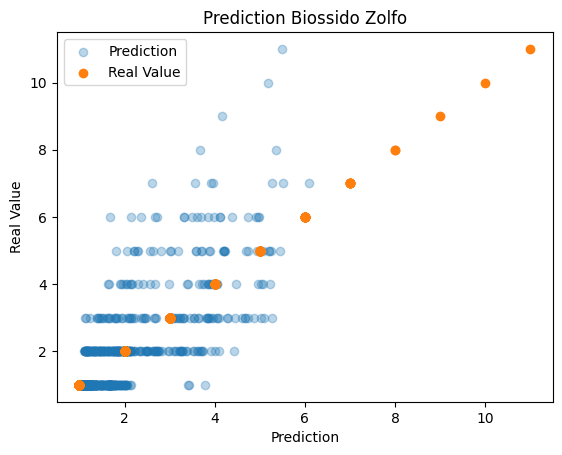

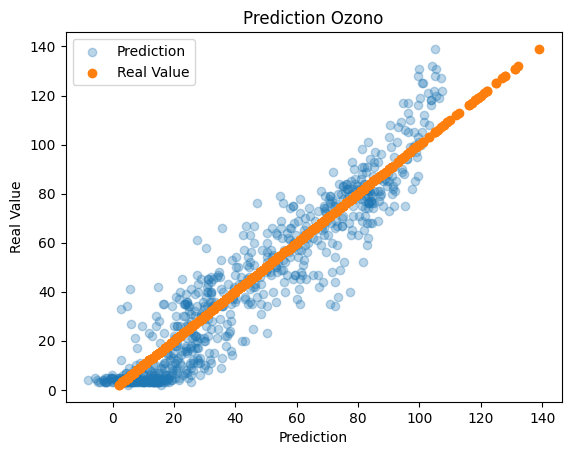

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                512       
                                                                 
 dropout_16 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 128)               8320      
                                                                 
 dropout_17 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 3s 8ms/step - loss: 0.7313 - mean_squared_error: 0.7313 - val_loss: 0.6742 - val_mean_squared_error: 0.6742
Epoch 2/100
255/271 [===========================>..] - ETA: 0s - loss: 0.6470 - mean_squared_error: 0.6470
Epoch 2: val_loss improved from 0.67422 to 0.65154, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 8ms/step - loss: 0.6482 - mean_squared_error: 0.6482 - val_loss: 0.6515 - val_mean_squared_error: 0.6515
Epoch 3/100
270/271 [============================>.] - ETA: 0s - loss: 0.6231 - mean_squared_error: 0.6231
Epoch 3: val_loss improved from 0.65154 to 0.60934, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 8ms/step - loss: 0.6228 - mean_squared_error: 0.6228 - val_loss: 0.6093 - val_mean_squared_error: 0.6093
Epoch 4/100
270/271 [============================>.] - ETA: 0s - loss: 0.6123 - mean_squared_error: 0.6123
Epoch 4: val_loss improved from 0.60934 to 0.59625, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 9ms/step - loss: 0.6121 - mean_squared_error: 0.6121 - val_loss: 0.5962 - val_mean_squared_error: 0.5962
Epoch 5/100
269/271 [============================>.] - ETA: 0s - loss: 0.6012 - mean_squared_error: 0.6012
Epoch 5: val_loss improved from 0.59625 to 0.58012, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.6010 - mean_squared_error: 0.6010 - val_loss: 0.5801 - val_mean_squared_error: 0.5801
Epoch 6/100
258/271 [===========================>..] - ETA: 0s - loss: 0.5942 - mean_squared_error: 0.5942
Epoch 6: val_loss improved from 0.58012 to 0.57324, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5957 - mean_squared_error: 0.5957 - val_loss: 0.5732 - val_mean_squared_error: 0.5732
Epoch 7/100
262/271 [============================>.] - ETA: 0s - loss: 0.5878 - mean_squared_error: 0.5878
Epoch 7: val_loss did not improve from 0.57324
271/271 [==============================] - 1s 3ms/step - loss: 0.5834 - mean_squared_error: 0.5834 - val_loss: 0.5756 - val_mean_squared_error: 0.5756
Epoch 8/100
268/271 [============================>.] - ETA: 0s - loss: 0.5768 - mean_squared_error: 0.5768
Epoch 8: val_loss improved from 0.57324 to 0.56027, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5768 - mean_squared_error: 0.5768 - val_loss: 0.5603 - val_mean_squared_error: 0.5603
Epoch 9/100
266/271 [============================>.] - ETA: 0s - loss: 0.5773 - mean_squared_error: 0.5773
Epoch 9: val_loss improved from 0.56027 to 0.55328, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5768 - mean_squared_error: 0.5768 - val_loss: 0.5533 - val_mean_squared_error: 0.5533
Epoch 10/100
262/271 [============================>.] - ETA: 0s - loss: 0.5702 - mean_squared_error: 0.5702
Epoch 10: val_loss improved from 0.55328 to 0.54046, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 3s 9ms/step - loss: 0.5682 - mean_squared_error: 0.5682 - val_loss: 0.5405 - val_mean_squared_error: 0.5405
Epoch 11/100
260/271 [===========================>..] - ETA: 0s - loss: 0.5660 - mean_squared_error: 0.5660
Epoch 11: val_loss improved from 0.54046 to 0.53815, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 8ms/step - loss: 0.5655 - mean_squared_error: 0.5655 - val_loss: 0.5382 - val_mean_squared_error: 0.5382
Epoch 12/100
251/271 [==========================>...] - ETA: 0s - loss: 0.5680 - mean_squared_error: 0.5680
Epoch 12: val_loss improved from 0.53815 to 0.53425, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 8ms/step - loss: 0.5620 - mean_squared_error: 0.5620 - val_loss: 0.5343 - val_mean_squared_error: 0.5343
Epoch 13/100
268/271 [============================>.] - ETA: 0s - loss: 0.5526 - mean_squared_error: 0.5526
Epoch 13: val_loss did not improve from 0.53425
271/271 [==============================] - 1s 3ms/step - loss: 0.5528 - mean_squared_error: 0.5528 - val_loss: 0.5449 - val_mean_squared_error: 0.5449
Epoch 14/100
260/271 [===========================>..] - ETA: 0s - loss: 0.5546 - mean_squared_error: 0.5546
Epoch 14: val_loss improved from 0.53425 to 0.52775, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5525 - mean_squared_error: 0.5525 - val_loss: 0.5278 - val_mean_squared_error: 0.5278
Epoch 15/100
253/271 [===========================>..] - ETA: 0s - loss: 0.5526 - mean_squared_error: 0.5526
Epoch 15: val_loss improved from 0.52775 to 0.52462, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5502 - mean_squared_error: 0.5502 - val_loss: 0.5246 - val_mean_squared_error: 0.5246
Epoch 16/100
266/271 [============================>.] - ETA: 0s - loss: 0.5514 - mean_squared_error: 0.5514
Epoch 16: val_loss improved from 0.52462 to 0.51654, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5493 - mean_squared_error: 0.5493 - val_loss: 0.5165 - val_mean_squared_error: 0.5165
Epoch 17/100
271/271 [==============================] - ETA: 0s - loss: 0.5416 - mean_squared_error: 0.5416
Epoch 17: val_loss improved from 0.51654 to 0.51393, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 3s 13ms/step - loss: 0.5416 - mean_squared_error: 0.5416 - val_loss: 0.5139 - val_mean_squared_error: 0.5139
Epoch 18/100
252/271 [==========================>...] - ETA: 0s - loss: 0.5372 - mean_squared_error: 0.5372
Epoch 18: val_loss did not improve from 0.51393
271/271 [==============================] - 1s 3ms/step - loss: 0.5386 - mean_squared_error: 0.5386 - val_loss: 0.5254 - val_mean_squared_error: 0.5254
Epoch 19/100
256/271 [===========================>..] - ETA: 0s - loss: 0.5445 - mean_squared_error: 0.5445
Epoch 19: val_loss improved from 0.51393 to 0.50274, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5431 - mean_squared_error: 0.5431 - val_loss: 0.5027 - val_mean_squared_error: 0.5027
Epoch 20/100
252/271 [==========================>...] - ETA: 0s - loss: 0.5398 - mean_squared_error: 0.5398
Epoch 20: val_loss did not improve from 0.50274
271/271 [==============================] - 1s 3ms/step - loss: 0.5402 - mean_squared_error: 0.5402 - val_loss: 0.5038 - val_mean_squared_error: 0.5038
Epoch 21/100
260/271 [===========================>..] - ETA: 0s - loss: 0.5357 - mean_squared_error: 0.5357
Epoch 21: val_loss improved from 0.50274 to 0.50099, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5365 - mean_squared_error: 0.5365 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 22/100
265/271 [============================>.] - ETA: 0s - loss: 0.5343 - mean_squared_error: 0.5343
Epoch 22: val_loss did not improve from 0.50099
271/271 [==============================] - 1s 3ms/step - loss: 0.5354 - mean_squared_error: 0.5354 - val_loss: 0.5031 - val_mean_squared_error: 0.5031
Epoch 23/100
256/271 [===========================>..] - ETA: 0s - loss: 0.5274 - mean_squared_error: 0.5274
Epoch 23: val_loss did not improve from 0.50099
271/271 [==============================] - 1s 2ms/step - loss: 0.5270 - mean_squared_error: 0.5270 - val_loss: 0.5115 - val_mean_squared_error: 0.5115
Epoch 24/100
258/271 [===========================>..] - ETA: 0s - loss: 0.5296 - mean_squared_error: 0.5296
Epoch 24: val_loss improved from 0.50099 to 0.49499, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5297 - mean_squared_error: 0.5297 - val_loss: 0.4950 - val_mean_squared_error: 0.4950
Epoch 25/100
261/271 [===========================>..] - ETA: 0s - loss: 0.5288 - mean_squared_error: 0.5288
Epoch 25: val_loss improved from 0.49499 to 0.48642, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5274 - mean_squared_error: 0.5274 - val_loss: 0.4864 - val_mean_squared_error: 0.4864
Epoch 26/100
253/271 [===========================>..] - ETA: 0s - loss: 0.5270 - mean_squared_error: 0.5270
Epoch 26: val_loss did not improve from 0.48642
271/271 [==============================] - 1s 2ms/step - loss: 0.5244 - mean_squared_error: 0.5244 - val_loss: 0.4866 - val_mean_squared_error: 0.4866
Epoch 27/100
262/271 [============================>.] - ETA: 0s - loss: 0.5226 - mean_squared_error: 0.5226
Epoch 27: val_loss did not improve from 0.48642
271/271 [==============================] - 1s 2ms/step - loss: 0.5254 - mean_squared_error: 0.5254 - val_loss: 0.4932 - val_mean_squared_error: 0.4932
Epoch 28/100
248/271 [==========================>...] - ETA: 0s - loss: 0.5231 - mean_squared_error: 0.5231
Epoch 28: val_loss did not improve from 0.48642
271/271 [==============================] - 1s 2ms/step - loss: 0.5221 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 6ms/step - loss: 0.5180 - mean_squared_error: 0.5180 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 35/100
251/271 [==========================>...] - ETA: 0s - loss: 0.5153 - mean_squared_error: 0.5153
Epoch 35: val_loss did not improve from 0.48264
271/271 [==============================] - 1s 2ms/step - loss: 0.5129 - mean_squared_error: 0.5129 - val_loss: 0.4840 - val_mean_squared_error: 0.4840
Epoch 36/100
267/271 [============================>.] - ETA: 0s - loss: 0.5125 - mean_squared_error: 0.5125
Epoch 36: val_loss improved from 0.48264 to 0.48185, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5133 - mean_squared_error: 0.5133 - val_loss: 0.4819 - val_mean_squared_error: 0.4819
Epoch 37/100
260/271 [===========================>..] - ETA: 0s - loss: 0.5119 - mean_squared_error: 0.5119
Epoch 37: val_loss improved from 0.48185 to 0.47444, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5111 - mean_squared_error: 0.5111 - val_loss: 0.4744 - val_mean_squared_error: 0.4744
Epoch 38/100
249/271 [==========================>...] - ETA: 0s - loss: 0.5083 - mean_squared_error: 0.5083
Epoch 38: val_loss did not improve from 0.47444
271/271 [==============================] - 1s 2ms/step - loss: 0.5095 - mean_squared_error: 0.5095 - val_loss: 0.4801 - val_mean_squared_error: 0.4801
Epoch 39/100
253/271 [===========================>..] - ETA: 0s - loss: 0.5162 - mean_squared_error: 0.5162
Epoch 39: val_loss did not improve from 0.47444
271/271 [==============================] - 1s 2ms/step - loss: 0.5173 - mean_squared_error: 0.5173 - val_loss: 0.4881 - val_mean_squared_error: 0.4881
Epoch 40/100
252/271 [==========================>...] - ETA: 0s - loss: 0.5101 - mean_squared_error: 0.5101
Epoch 40: val_loss did not improve from 0.47444
271/271 [==============================] - 1s 2ms/step - loss: 0.5112 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5121 - mean_squared_error: 0.5121 - val_loss: 0.4733 - val_mean_squared_error: 0.4733
Epoch 42/100
259/271 [===========================>..] - ETA: 0s - loss: 0.5120 - mean_squared_error: 0.5120
Epoch 42: val_loss improved from 0.47330 to 0.47015, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5111 - mean_squared_error: 0.5111 - val_loss: 0.4701 - val_mean_squared_error: 0.4701
Epoch 43/100
265/271 [============================>.] - ETA: 0s - loss: 0.5125 - mean_squared_error: 0.5125
Epoch 43: val_loss did not improve from 0.47015
271/271 [==============================] - 1s 2ms/step - loss: 0.5122 - mean_squared_error: 0.5122 - val_loss: 0.4745 - val_mean_squared_error: 0.4745
Epoch 44/100
252/271 [==========================>...] - ETA: 0s - loss: 0.5098 - mean_squared_error: 0.5098
Epoch 44: val_loss did not improve from 0.47015
271/271 [==============================] - 1s 2ms/step - loss: 0.5077 - mean_squared_error: 0.5077 - val_loss: 0.4741 - val_mean_squared_error: 0.4741
Epoch 45/100
248/271 [==========================>...] - ETA: 0s - loss: 0.5129 - mean_squared_error: 0.5129
Epoch 45: val_loss did not improve from 0.47015
271/271 [==============================] - 1s 2ms/step - loss: 0.5113 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.5017 - mean_squared_error: 0.5017 - val_loss: 0.4554 - val_mean_squared_error: 0.4554
Epoch 48/100
267/271 [============================>.] - ETA: 0s - loss: 0.5005 - mean_squared_error: 0.5005
Epoch 48: val_loss did not improve from 0.45543
271/271 [==============================] - 1s 3ms/step - loss: 0.5011 - mean_squared_error: 0.5011 - val_loss: 0.4614 - val_mean_squared_error: 0.4614
Epoch 49/100
250/271 [==========================>...] - ETA: 0s - loss: 0.5061 - mean_squared_error: 0.5061
Epoch 49: val_loss did not improve from 0.45543
271/271 [==============================] - 1s 2ms/step - loss: 0.5059 - mean_squared_error: 0.5059 - val_loss: 0.4716 - val_mean_squared_error: 0.4716
Epoch 50/100
263/271 [============================>.] - ETA: 0s - loss: 0.4989 - mean_squared_error: 0.4989
Epoch 50: val_loss did not improve from 0.45543
271/271 [==============================] - 1s 2ms/step - loss: 0.5013 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 6ms/step - loss: 0.4991 - mean_squared_error: 0.4991 - val_loss: 0.4531 - val_mean_squared_error: 0.4531
Epoch 58/100
257/271 [===========================>..] - ETA: 0s - loss: 0.4945 - mean_squared_error: 0.4945
Epoch 58: val_loss improved from 0.45314 to 0.44892, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.4934 - mean_squared_error: 0.4934 - val_loss: 0.4489 - val_mean_squared_error: 0.4489
Epoch 59/100
266/271 [============================>.] - ETA: 0s - loss: 0.4952 - mean_squared_error: 0.4952
Epoch 59: val_loss did not improve from 0.44892
271/271 [==============================] - 1s 3ms/step - loss: 0.4949 - mean_squared_error: 0.4949 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 60/100
263/271 [============================>.] - ETA: 0s - loss: 0.4920 - mean_squared_error: 0.4920
Epoch 60: val_loss did not improve from 0.44892
271/271 [==============================] - 1s 2ms/step - loss: 0.4912 - mean_squared_error: 0.4912 - val_loss: 0.4596 - val_mean_squared_error: 0.4596
Epoch 61/100
248/271 [==========================>...] - ETA: 0s - loss: 0.4967 - mean_squared_error: 0.4967
Epoch 61: val_loss did not improve from 0.44892
271/271 [==============================] - 1s 2ms/step - loss: 0.4966 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.4899 - mean_squared_error: 0.4899 - val_loss: 0.4478 - val_mean_squared_error: 0.4478
Epoch 68/100
265/271 [============================>.] - ETA: 0s - loss: 0.4915 - mean_squared_error: 0.4915
Epoch 68: val_loss improved from 0.44775 to 0.44716, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.4902 - mean_squared_error: 0.4902 - val_loss: 0.4472 - val_mean_squared_error: 0.4472
Epoch 69/100
247/271 [==========================>...] - ETA: 0s - loss: 0.4912 - mean_squared_error: 0.4912
Epoch 69: val_loss improved from 0.44716 to 0.44244, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.4898 - mean_squared_error: 0.4898 - val_loss: 0.4424 - val_mean_squared_error: 0.4424
Epoch 70/100
264/271 [============================>.] - ETA: 0s - loss: 0.4893 - mean_squared_error: 0.4893
Epoch 70: val_loss did not improve from 0.44244
271/271 [==============================] - 1s 2ms/step - loss: 0.4882 - mean_squared_error: 0.4882 - val_loss: 0.4503 - val_mean_squared_error: 0.4503
Epoch 71/100
249/271 [==========================>...] - ETA: 0s - loss: 0.4870 - mean_squared_error: 0.4870
Epoch 71: val_loss did not improve from 0.44244
271/271 [==============================] - 1s 3ms/step - loss: 0.4849 - mean_squared_error: 0.4849 - val_loss: 0.4502 - val_mean_squared_error: 0.4502
Epoch 72/100
259/271 [===========================>..] - ETA: 0s - loss: 0.4926 - mean_squared_error: 0.4926
Epoch 72: val_loss improved from 0.44244 to 0.43872, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 6ms/step - loss: 0.4914 - mean_squared_error: 0.4914 - val_loss: 0.4387 - val_mean_squared_error: 0.4387
Epoch 73/100
267/271 [============================>.] - ETA: 0s - loss: 0.4864 - mean_squared_error: 0.4864
Epoch 73: val_loss did not improve from 0.43872
271/271 [==============================] - 1s 2ms/step - loss: 0.4863 - mean_squared_error: 0.4863 - val_loss: 0.4419 - val_mean_squared_error: 0.4419
Epoch 74/100
263/271 [============================>.] - ETA: 0s - loss: 0.4832 - mean_squared_error: 0.4832
Epoch 74: val_loss did not improve from 0.43872
271/271 [==============================] - 1s 2ms/step - loss: 0.4809 - mean_squared_error: 0.4809 - val_loss: 0.4414 - val_mean_squared_error: 0.4414
Epoch 75/100
252/271 [==========================>...] - ETA: 0s - loss: 0.4856 - mean_squared_error: 0.4856
Epoch 75: val_loss did not improve from 0.43872
271/271 [==============================] - 1s 2ms/step - loss: 0.4874 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 6ms/step - loss: 0.4832 - mean_squared_error: 0.4832 - val_loss: 0.4387 - val_mean_squared_error: 0.4387
Epoch 84/100
251/271 [==========================>...] - ETA: 0s - loss: 0.4867 - mean_squared_error: 0.4867
Epoch 84: val_loss improved from 0.43866 to 0.43256, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.4843 - mean_squared_error: 0.4843 - val_loss: 0.4326 - val_mean_squared_error: 0.4326
Epoch 85/100
255/271 [===========================>..] - ETA: 0s - loss: 0.4800 - mean_squared_error: 0.4800
Epoch 85: val_loss did not improve from 0.43256
271/271 [==============================] - 1s 3ms/step - loss: 0.4791 - mean_squared_error: 0.4791 - val_loss: 0.4388 - val_mean_squared_error: 0.4388
Epoch 86/100
259/271 [===========================>..] - ETA: 0s - loss: 0.4724 - mean_squared_error: 0.4724
Epoch 86: val_loss did not improve from 0.43256
271/271 [==============================] - 1s 3ms/step - loss: 0.4758 - mean_squared_error: 0.4758 - val_loss: 0.4358 - val_mean_squared_error: 0.4358
Epoch 87/100
264/271 [============================>.] - ETA: 0s - loss: 0.4831 - mean_squared_error: 0.4831
Epoch 87: val_loss did not improve from 0.43256
271/271 [==============================] - 1s 3ms/step - loss: 0.4823 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 2s 7ms/step - loss: 0.4739 - mean_squared_error: 0.4739 - val_loss: 0.4325 - val_mean_squared_error: 0.4325
Epoch 91/100
268/271 [============================>.] - ETA: 0s - loss: 0.4775 - mean_squared_error: 0.4775
Epoch 91: val_loss did not improve from 0.43249
271/271 [==============================] - 1s 2ms/step - loss: 0.4774 - mean_squared_error: 0.4774 - val_loss: 0.4336 - val_mean_squared_error: 0.4336
Epoch 92/100
255/271 [===========================>..] - ETA: 0s - loss: 0.4797 - mean_squared_error: 0.4797
Epoch 92: val_loss did not improve from 0.43249
271/271 [==============================] - 0s 2ms/step - loss: 0.4777 - mean_squared_error: 0.4777 - val_loss: 0.4425 - val_mean_squared_error: 0.4425
Epoch 93/100
260/271 [===========================>..] - ETA: 0s - loss: 0.4814 - mean_squared_error: 0.4814
Epoch 93: val_loss did not improve from 0.43249
271/271 [==============================] - 1s 2ms/step - loss: 0.4812 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 1s 5ms/step - loss: 0.4804 - mean_squared_error: 0.4804 - val_loss: 0.4290 - val_mean_squared_error: 0.4290
Epoch 95/100
250/271 [==========================>...] - ETA: 0s - loss: 0.4750 - mean_squared_error: 0.4750
Epoch 95: val_loss did not improve from 0.42896
271/271 [==============================] - 1s 2ms/step - loss: 0.4741 - mean_squared_error: 0.4741 - val_loss: 0.4347 - val_mean_squared_error: 0.4347
Epoch 96/100
257/271 [===========================>..] - ETA: 0s - loss: 0.4722 - mean_squared_error: 0.4722
Epoch 96: val_loss did not improve from 0.42896
271/271 [==============================] - 1s 2ms/step - loss: 0.4702 - mean_squared_error: 0.4702 - val_loss: 0.4351 - val_mean_squared_error: 0.4351
Epoch 97/100
257/271 [===========================>..] - ETA: 0s - loss: 0.4705 - mean_squared_error: 0.4705
Epoch 97: val_loss improved from 0.42896 to 0.42720, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


271/271 [==============================] - 1s 5ms/step - loss: 0.4704 - mean_squared_error: 0.4704 - val_loss: 0.4272 - val_mean_squared_error: 0.4272
Epoch 98/100
240/271 [=========================>....] - ETA: 0s - loss: 0.4754 - mean_squared_error: 0.4754
Epoch 98: val_loss did not improve from 0.42720
271/271 [==============================] - 0s 2ms/step - loss: 0.4770 - mean_squared_error: 0.4770 - val_loss: 0.4387 - val_mean_squared_error: 0.4387
Epoch 99/100
263/271 [============================>.] - ETA: 0s - loss: 0.4801 - mean_squared_error: 0.4801
Epoch 99: val_loss did not improve from 0.42720
271/271 [==============================] - 0s 2ms/step - loss: 0.4791 - mean_squared_error: 0.4791 - val_loss: 0.4319 - val_mean_squared_error: 0.4319
Epoch 100/100
261/271 [===========================>..] - ETA: 0s - loss: 0.4692 - mean_squared_error: 0.4692
Epoch 100: val_loss did not improve from 0.42720
271/271 [==============================] - 0s 2ms/step - loss: 0.4737 - mean_

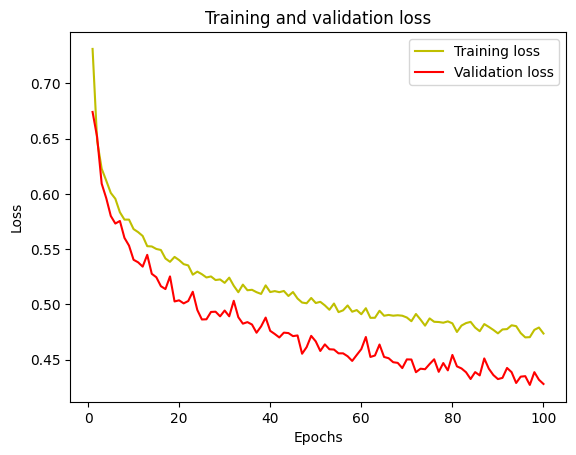

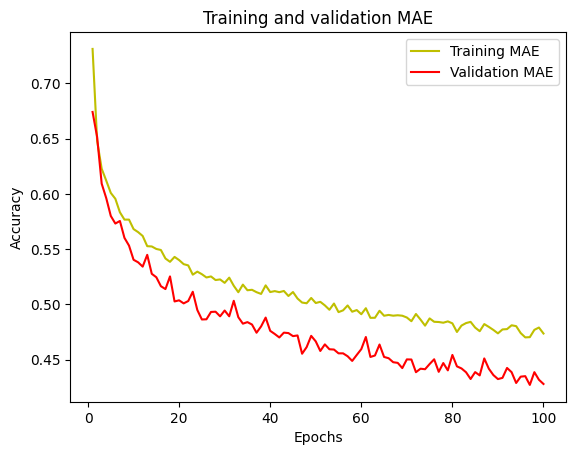

145/145 [==============================] - 0s 900us/step
Predicted values are:  [[ 14.917833   10.4312     12.51198     1.5518931  92.20093  ]
 [ 19.593775   14.590926   36.920254    3.3674958  10.51497  ]
 [ 18.748302   12.966899   18.245342    1.4137226  61.705906 ]
 ...
 [ 24.774591   17.973553   27.600494    2.0127196  28.834806 ]
 [ 21.408796   15.263281   13.239593    2.72119   107.91536  ]
 [ 14.59477    10.037299   14.597607    1.8095036  84.48674  ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-07-06 12:00:00+02:00  10.0    5.0               14.0             2.0  \
2022-12-02 17:00:00+02:00  28.0   21.0               43.0             5.0   
2021-09-19 10:00:00+02:00  13.0   10.0               15.0             1.0   
2022-09-01 09:00:00+02:00   9.0    3.0               18.0             2.0   
2022-09-12 19:00:00+02:00  15.0    9.0               28.

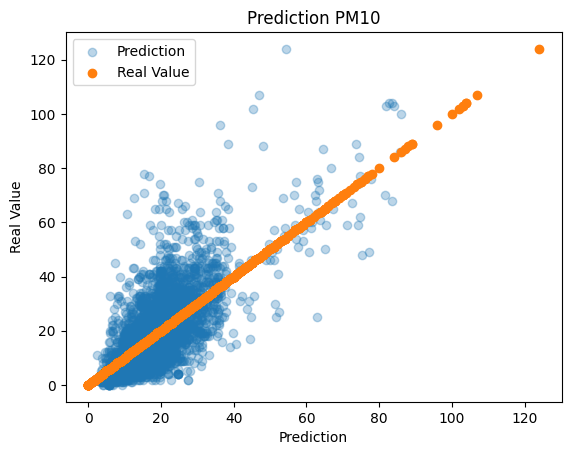

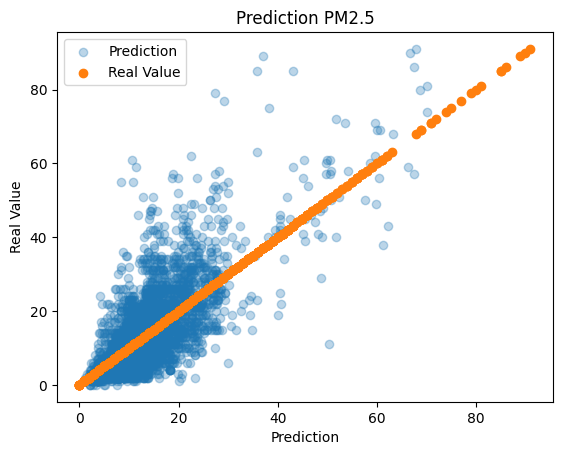

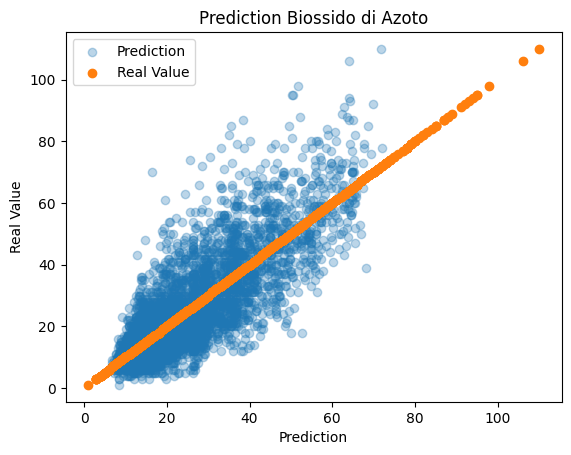

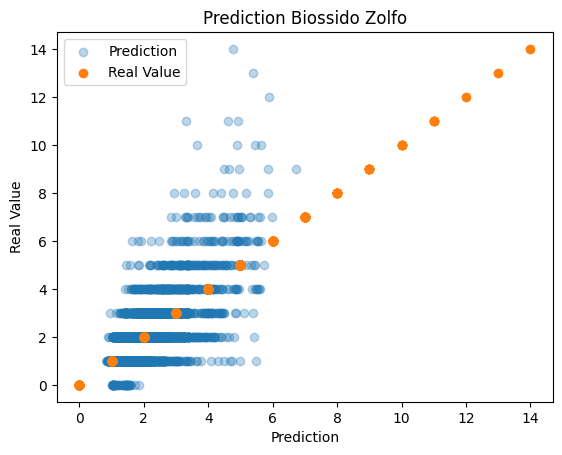

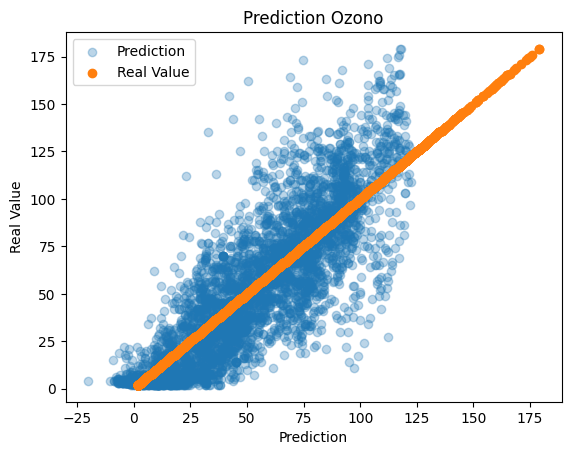

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                512       
                                                                 
 dropout_20 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 128)               8320      
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 4s 14ms/step - loss: 0.7738 - mean_squared_error: 0.7738 - val_loss: 0.6838 - val_mean_squared_error: 0.6838
Epoch 2/100
171/193 [=========================>....] - ETA: 0s - loss: 0.7066 - mean_squared_error: 0.7066
Epoch 2: val_loss improved from 0.68377 to 0.65131, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.7068 - mean_squared_error: 0.7068 - val_loss: 0.6513 - val_mean_squared_error: 0.6513
Epoch 3/100
162/193 [========================>.....] - ETA: 0s - loss: 0.6780 - mean_squared_error: 0.6780
Epoch 3: val_loss improved from 0.65131 to 0.62738, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.6832 - mean_squared_error: 0.6832 - val_loss: 0.6274 - val_mean_squared_error: 0.6274
Epoch 4/100
172/193 [=========================>....] - ETA: 0s - loss: 0.6699 - mean_squared_error: 0.6699
Epoch 4: val_loss did not improve from 0.62738
193/193 [==============================] - 0s 2ms/step - loss: 0.6614 - mean_squared_error: 0.6614 - val_loss: 0.6280 - val_mean_squared_error: 0.6280
Epoch 5/100
182/193 [===========================>..] - ETA: 0s - loss: 0.6488 - mean_squared_error: 0.6488
Epoch 5: val_loss improved from 0.62738 to 0.59998, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.6492 - mean_squared_error: 0.6492 - val_loss: 0.6000 - val_mean_squared_error: 0.6000
Epoch 6/100
193/193 [==============================] - ETA: 0s - loss: 0.6329 - mean_squared_error: 0.6329
Epoch 6: val_loss improved from 0.59998 to 0.57959, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.6329 - mean_squared_error: 0.6329 - val_loss: 0.5796 - val_mean_squared_error: 0.5796
Epoch 7/100
179/193 [==========================>...] - ETA: 0s - loss: 0.6263 - mean_squared_error: 0.6263
Epoch 7: val_loss improved from 0.57959 to 0.56796, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.6266 - mean_squared_error: 0.6266 - val_loss: 0.5680 - val_mean_squared_error: 0.5680
Epoch 8/100
163/193 [========================>.....] - ETA: 0s - loss: 0.6109 - mean_squared_error: 0.6109
Epoch 8: val_loss improved from 0.56796 to 0.54231, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.6140 - mean_squared_error: 0.6140 - val_loss: 0.5423 - val_mean_squared_error: 0.5423
Epoch 9/100
192/193 [============================>.] - ETA: 0s - loss: 0.6022 - mean_squared_error: 0.6022
Epoch 9: val_loss improved from 0.54231 to 0.53525, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.6030 - mean_squared_error: 0.6030 - val_loss: 0.5352 - val_mean_squared_error: 0.5352
Epoch 10/100
166/193 [========================>.....] - ETA: 0s - loss: 0.5961 - mean_squared_error: 0.5961
Epoch 10: val_loss improved from 0.53525 to 0.53165, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.6028 - mean_squared_error: 0.6028 - val_loss: 0.5316 - val_mean_squared_error: 0.5316
Epoch 11/100
182/193 [===========================>..] - ETA: 0s - loss: 0.5937 - mean_squared_error: 0.5937
Epoch 11: val_loss improved from 0.53165 to 0.53098, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5932 - mean_squared_error: 0.5932 - val_loss: 0.5310 - val_mean_squared_error: 0.5310
Epoch 12/100
175/193 [==========================>...] - ETA: 0s - loss: 0.5877 - mean_squared_error: 0.5877
Epoch 12: val_loss improved from 0.53098 to 0.50970, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5847 - mean_squared_error: 0.5847 - val_loss: 0.5097 - val_mean_squared_error: 0.5097
Epoch 13/100
192/193 [============================>.] - ETA: 0s - loss: 0.5733 - mean_squared_error: 0.5733
Epoch 13: val_loss improved from 0.50970 to 0.50260, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.5727 - mean_squared_error: 0.5727 - val_loss: 0.5026 - val_mean_squared_error: 0.5026
Epoch 14/100
176/193 [==========================>...] - ETA: 0s - loss: 0.5739 - mean_squared_error: 0.5739
Epoch 14: val_loss did not improve from 0.50260
193/193 [==============================] - 0s 2ms/step - loss: 0.5682 - mean_squared_error: 0.5682 - val_loss: 0.5026 - val_mean_squared_error: 0.5026
Epoch 15/100
167/193 [========================>.....] - ETA: 0s - loss: 0.5730 - mean_squared_error: 0.5730
Epoch 15: val_loss improved from 0.50260 to 0.49921, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5673 - mean_squared_error: 0.5673 - val_loss: 0.4992 - val_mean_squared_error: 0.4992
Epoch 16/100
158/193 [=======================>......] - ETA: 0s - loss: 0.5632 - mean_squared_error: 0.5632
Epoch 16: val_loss improved from 0.49921 to 0.49120, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5637 - mean_squared_error: 0.5637 - val_loss: 0.4912 - val_mean_squared_error: 0.4912
Epoch 17/100
173/193 [=========================>....] - ETA: 0s - loss: 0.5569 - mean_squared_error: 0.5569
Epoch 17: val_loss improved from 0.49120 to 0.49055, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5537 - mean_squared_error: 0.5537 - val_loss: 0.4906 - val_mean_squared_error: 0.4906
Epoch 18/100
183/193 [===========================>..] - ETA: 0s - loss: 0.5602 - mean_squared_error: 0.5602
Epoch 18: val_loss improved from 0.49055 to 0.47894, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.5558 - mean_squared_error: 0.5558 - val_loss: 0.4789 - val_mean_squared_error: 0.4789
Epoch 19/100
180/193 [==========================>...] - ETA: 0s - loss: 0.5486 - mean_squared_error: 0.5486
Epoch 19: val_loss did not improve from 0.47894
193/193 [==============================] - 0s 2ms/step - loss: 0.5510 - mean_squared_error: 0.5510 - val_loss: 0.4889 - val_mean_squared_error: 0.4889
Epoch 20/100
174/193 [==========================>...] - ETA: 0s - loss: 0.5404 - mean_squared_error: 0.5404
Epoch 20: val_loss improved from 0.47894 to 0.46675, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5430 - mean_squared_error: 0.5430 - val_loss: 0.4668 - val_mean_squared_error: 0.4668
Epoch 21/100
193/193 [==============================] - ETA: 0s - loss: 0.5469 - mean_squared_error: 0.5469
Epoch 21: val_loss did not improve from 0.46675
193/193 [==============================] - 0s 2ms/step - loss: 0.5469 - mean_squared_error: 0.5469 - val_loss: 0.4808 - val_mean_squared_error: 0.4808
Epoch 22/100
190/193 [============================>.] - ETA: 0s - loss: 0.5356 - mean_squared_error: 0.5356
Epoch 22: val_loss improved from 0.46675 to 0.46449, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5356 - mean_squared_error: 0.5356 - val_loss: 0.4645 - val_mean_squared_error: 0.4645
Epoch 23/100
189/193 [============================>.] - ETA: 0s - loss: 0.5395 - mean_squared_error: 0.5395
Epoch 23: val_loss improved from 0.46449 to 0.46383, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.5417 - mean_squared_error: 0.5417 - val_loss: 0.4638 - val_mean_squared_error: 0.4638
Epoch 24/100
167/193 [========================>.....] - ETA: 0s - loss: 0.5264 - mean_squared_error: 0.5264
Epoch 24: val_loss did not improve from 0.46383
193/193 [==============================] - 0s 2ms/step - loss: 0.5292 - mean_squared_error: 0.5292 - val_loss: 0.4807 - val_mean_squared_error: 0.4807
Epoch 25/100
174/193 [==========================>...] - ETA: 0s - loss: 0.5413 - mean_squared_error: 0.5413
Epoch 25: val_loss did not improve from 0.46383
193/193 [==============================] - 0s 2ms/step - loss: 0.5397 - mean_squared_error: 0.5397 - val_loss: 0.4744 - val_mean_squared_error: 0.4744
Epoch 26/100
183/193 [===========================>..] - ETA: 0s - loss: 0.5283 - mean_squared_error: 0.5283
Epoch 26: val_loss improved from 0.46383 to 0.45662, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5289 - mean_squared_error: 0.5289 - val_loss: 0.4566 - val_mean_squared_error: 0.4566
Epoch 27/100
189/193 [============================>.] - ETA: 0s - loss: 0.5254 - mean_squared_error: 0.5254
Epoch 27: val_loss improved from 0.45662 to 0.44888, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5267 - mean_squared_error: 0.5267 - val_loss: 0.4489 - val_mean_squared_error: 0.4489
Epoch 28/100
169/193 [=========================>....] - ETA: 0s - loss: 0.5251 - mean_squared_error: 0.5251
Epoch 28: val_loss did not improve from 0.44888
193/193 [==============================] - 0s 2ms/step - loss: 0.5261 - mean_squared_error: 0.5261 - val_loss: 0.4588 - val_mean_squared_error: 0.4588
Epoch 29/100
164/193 [========================>.....] - ETA: 0s - loss: 0.5219 - mean_squared_error: 0.5219
Epoch 29: val_loss improved from 0.44888 to 0.44713, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 6ms/step - loss: 0.5274 - mean_squared_error: 0.5274 - val_loss: 0.4471 - val_mean_squared_error: 0.4471
Epoch 30/100
190/193 [============================>.] - ETA: 0s - loss: 0.5197 - mean_squared_error: 0.5197
Epoch 30: val_loss improved from 0.44713 to 0.44490, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 1s 7ms/step - loss: 0.5225 - mean_squared_error: 0.5225 - val_loss: 0.4449 - val_mean_squared_error: 0.4449
Epoch 31/100
191/193 [============================>.] - ETA: 0s - loss: 0.5093 - mean_squared_error: 0.5093
Epoch 31: val_loss did not improve from 0.44490
193/193 [==============================] - 0s 2ms/step - loss: 0.5086 - mean_squared_error: 0.5086 - val_loss: 0.4467 - val_mean_squared_error: 0.4467
Epoch 32/100
177/193 [==========================>...] - ETA: 0s - loss: 0.5022 - mean_squared_error: 0.5022
Epoch 32: val_loss did not improve from 0.44490
193/193 [==============================] - 1s 3ms/step - loss: 0.5073 - mean_squared_error: 0.5073 - val_loss: 0.4478 - val_mean_squared_error: 0.4478
Epoch 33/100
168/193 [=========================>....] - ETA: 0s - loss: 0.5131 - mean_squared_error: 0.5131
Epoch 33: val_loss did not improve from 0.44490
193/193 [==============================] - 1s 3ms/step - loss: 0.5111 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 10ms/step - loss: 0.5103 - mean_squared_error: 0.5103 - val_loss: 0.4421 - val_mean_squared_error: 0.4421
Epoch 35/100
189/193 [============================>.] - ETA: 0s - loss: 0.5151 - mean_squared_error: 0.5151
Epoch 35: val_loss improved from 0.44209 to 0.43642, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.5137 - mean_squared_error: 0.5137 - val_loss: 0.4364 - val_mean_squared_error: 0.4364
Epoch 36/100
176/193 [==========================>...] - ETA: 0s - loss: 0.5082 - mean_squared_error: 0.5082
Epoch 36: val_loss improved from 0.43642 to 0.43165, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.5081 - mean_squared_error: 0.5081 - val_loss: 0.4317 - val_mean_squared_error: 0.4317
Epoch 37/100
180/193 [==========================>...] - ETA: 0s - loss: 0.5123 - mean_squared_error: 0.5123
Epoch 37: val_loss did not improve from 0.43165
193/193 [==============================] - 1s 3ms/step - loss: 0.5099 - mean_squared_error: 0.5099 - val_loss: 0.4482 - val_mean_squared_error: 0.4482
Epoch 38/100
184/193 [===========================>..] - ETA: 0s - loss: 0.5059 - mean_squared_error: 0.5059
Epoch 38: val_loss did not improve from 0.43165
193/193 [==============================] - 0s 2ms/step - loss: 0.5045 - mean_squared_error: 0.5045 - val_loss: 0.4524 - val_mean_squared_error: 0.4524
Epoch 39/100
185/193 [===========================>..] - ETA: 0s - loss: 0.5093 - mean_squared_error: 0.5093
Epoch 39: val_loss did not improve from 0.43165
193/193 [==============================] - 0s 2ms/step - loss: 0.5077 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.5016 - mean_squared_error: 0.5016 - val_loss: 0.4272 - val_mean_squared_error: 0.4272
Epoch 41/100
172/193 [=========================>....] - ETA: 0s - loss: 0.4957 - mean_squared_error: 0.4957
Epoch 41: val_loss did not improve from 0.42723
193/193 [==============================] - 0s 3ms/step - loss: 0.4972 - mean_squared_error: 0.4972 - val_loss: 0.4307 - val_mean_squared_error: 0.4307
Epoch 42/100
171/193 [=========================>....] - ETA: 0s - loss: 0.4939 - mean_squared_error: 0.4939
Epoch 42: val_loss improved from 0.42723 to 0.42716, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.4992 - mean_squared_error: 0.4992 - val_loss: 0.4272 - val_mean_squared_error: 0.4272
Epoch 43/100
182/193 [===========================>..] - ETA: 0s - loss: 0.4949 - mean_squared_error: 0.4949
Epoch 43: val_loss did not improve from 0.42716
193/193 [==============================] - 0s 2ms/step - loss: 0.4950 - mean_squared_error: 0.4950 - val_loss: 0.4382 - val_mean_squared_error: 0.4382
Epoch 44/100
191/193 [============================>.] - ETA: 0s - loss: 0.4918 - mean_squared_error: 0.4918
Epoch 44: val_loss did not improve from 0.42716
193/193 [==============================] - 0s 2ms/step - loss: 0.4951 - mean_squared_error: 0.4951 - val_loss: 0.4385 - val_mean_squared_error: 0.4385
Epoch 45/100
183/193 [===========================>..] - ETA: 0s - loss: 0.5003 - mean_squared_error: 0.5003
Epoch 45: val_loss did not improve from 0.42716
193/193 [==============================] - 0s 2ms/step - loss: 0.4975 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.4860 - mean_squared_error: 0.4860 - val_loss: 0.4230 - val_mean_squared_error: 0.4230
Epoch 50/100
169/193 [=========================>....] - ETA: 0s - loss: 0.4864 - mean_squared_error: 0.4864
Epoch 50: val_loss did not improve from 0.42296
193/193 [==============================] - 0s 3ms/step - loss: 0.4898 - mean_squared_error: 0.4898 - val_loss: 0.4308 - val_mean_squared_error: 0.4308
Epoch 51/100
192/193 [============================>.] - ETA: 0s - loss: 0.4955 - mean_squared_error: 0.4955
Epoch 51: val_loss did not improve from 0.42296
193/193 [==============================] - 1s 3ms/step - loss: 0.4955 - mean_squared_error: 0.4955 - val_loss: 0.4315 - val_mean_squared_error: 0.4315
Epoch 52/100
170/193 [=========================>....] - ETA: 0s - loss: 0.4961 - mean_squared_error: 0.4961
Epoch 52: val_loss did not improve from 0.42296
193/193 [==============================] - 0s 3ms/step - loss: 0.4954 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4934 - mean_squared_error: 0.4934 - val_loss: 0.4183 - val_mean_squared_error: 0.4183
Epoch 55/100
167/193 [========================>.....] - ETA: 0s - loss: 0.4843 - mean_squared_error: 0.4843
Epoch 55: val_loss did not improve from 0.41832
193/193 [==============================] - 0s 3ms/step - loss: 0.4895 - mean_squared_error: 0.4895 - val_loss: 0.4188 - val_mean_squared_error: 0.4188
Epoch 56/100
177/193 [==========================>...] - ETA: 0s - loss: 0.4776 - mean_squared_error: 0.4776
Epoch 56: val_loss improved from 0.41832 to 0.41680, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 4s 19ms/step - loss: 0.4781 - mean_squared_error: 0.4781 - val_loss: 0.4168 - val_mean_squared_error: 0.4168
Epoch 57/100
190/193 [============================>.] - ETA: 0s - loss: 0.4848 - mean_squared_error: 0.4848
Epoch 57: val_loss did not improve from 0.41680
193/193 [==============================] - 0s 2ms/step - loss: 0.4840 - mean_squared_error: 0.4840 - val_loss: 0.4177 - val_mean_squared_error: 0.4177
Epoch 58/100
172/193 [=========================>....] - ETA: 0s - loss: 0.4786 - mean_squared_error: 0.4786
Epoch 58: val_loss did not improve from 0.41680
193/193 [==============================] - 1s 3ms/step - loss: 0.4790 - mean_squared_error: 0.4790 - val_loss: 0.4204 - val_mean_squared_error: 0.4204
Epoch 59/100
186/193 [===========================>..] - ETA: 0s - loss: 0.4797 - mean_squared_error: 0.4797
Epoch 59: val_loss improved from 0.41680 to 0.41592, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4778 - mean_squared_error: 0.4778 - val_loss: 0.4159 - val_mean_squared_error: 0.4159
Epoch 60/100
193/193 [==============================] - ETA: 0s - loss: 0.4739 - mean_squared_error: 0.4739
Epoch 60: val_loss did not improve from 0.41592
193/193 [==============================] - 0s 2ms/step - loss: 0.4739 - mean_squared_error: 0.4739 - val_loss: 0.4184 - val_mean_squared_error: 0.4184
Epoch 61/100
176/193 [==========================>...] - ETA: 0s - loss: 0.4832 - mean_squared_error: 0.4832
Epoch 61: val_loss did not improve from 0.41592
193/193 [==============================] - 1s 3ms/step - loss: 0.4816 - mean_squared_error: 0.4816 - val_loss: 0.4203 - val_mean_squared_error: 0.4203
Epoch 62/100
177/193 [==========================>...] - ETA: 0s - loss: 0.4889 - mean_squared_error: 0.4889
Epoch 62: val_loss did not improve from 0.41592
193/193 [==============================] - 0s 2ms/step - loss: 0.4860 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4813 - mean_squared_error: 0.4813 - val_loss: 0.4128 - val_mean_squared_error: 0.4128
Epoch 66/100
179/193 [==========================>...] - ETA: 0s - loss: 0.4816 - mean_squared_error: 0.4816
Epoch 66: val_loss did not improve from 0.41280
193/193 [==============================] - 0s 2ms/step - loss: 0.4823 - mean_squared_error: 0.4823 - val_loss: 0.4222 - val_mean_squared_error: 0.4222
Epoch 67/100
187/193 [============================>.] - ETA: 0s - loss: 0.4753 - mean_squared_error: 0.4753
Epoch 67: val_loss did not improve from 0.41280
193/193 [==============================] - 1s 3ms/step - loss: 0.4767 - mean_squared_error: 0.4767 - val_loss: 0.4145 - val_mean_squared_error: 0.4145
Epoch 68/100
173/193 [=========================>....] - ETA: 0s - loss: 0.4814 - mean_squared_error: 0.4814
Epoch 68: val_loss did not improve from 0.41280
193/193 [==============================] - 0s 2ms/step - loss: 0.4861 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4798 - mean_squared_error: 0.4798 - val_loss: 0.4084 - val_mean_squared_error: 0.4084
Epoch 74/100
166/193 [========================>.....] - ETA: 0s - loss: 0.4759 - mean_squared_error: 0.4759
Epoch 74: val_loss did not improve from 0.40839
193/193 [==============================] - 0s 3ms/step - loss: 0.4761 - mean_squared_error: 0.4761 - val_loss: 0.4190 - val_mean_squared_error: 0.4190
Epoch 75/100
189/193 [============================>.] - ETA: 0s - loss: 0.4789 - mean_squared_error: 0.4789
Epoch 75: val_loss did not improve from 0.40839
193/193 [==============================] - 1s 3ms/step - loss: 0.4771 - mean_squared_error: 0.4771 - val_loss: 0.4130 - val_mean_squared_error: 0.4130
Epoch 76/100
167/193 [========================>.....] - ETA: 0s - loss: 0.4760 - mean_squared_error: 0.4760
Epoch 76: val_loss improved from 0.40839 to 0.40221, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4751 - mean_squared_error: 0.4751 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 77/100
190/193 [============================>.] - ETA: 0s - loss: 0.4733 - mean_squared_error: 0.4733
Epoch 77: val_loss did not improve from 0.40221
193/193 [==============================] - 1s 3ms/step - loss: 0.4731 - mean_squared_error: 0.4731 - val_loss: 0.4103 - val_mean_squared_error: 0.4103
Epoch 78/100
193/193 [==============================] - ETA: 0s - loss: 0.4727 - mean_squared_error: 0.4727
Epoch 78: val_loss did not improve from 0.40221
193/193 [==============================] - 1s 3ms/step - loss: 0.4727 - mean_squared_error: 0.4727 - val_loss: 0.4041 - val_mean_squared_error: 0.4041
Epoch 79/100
188/193 [============================>.] - ETA: 0s - loss: 0.4730 - mean_squared_error: 0.4730
Epoch 79: val_loss did not improve from 0.40221
193/193 [==============================] - 0s 2ms/step - loss: 0.4733 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4705 - mean_squared_error: 0.4705 - val_loss: 0.3962 - val_mean_squared_error: 0.3962
Epoch 83/100
177/193 [==========================>...] - ETA: 0s - loss: 0.4766 - mean_squared_error: 0.4766
Epoch 83: val_loss did not improve from 0.39621
193/193 [==============================] - 1s 3ms/step - loss: 0.4723 - mean_squared_error: 0.4723 - val_loss: 0.4135 - val_mean_squared_error: 0.4135
Epoch 84/100
173/193 [=========================>....] - ETA: 0s - loss: 0.4676 - mean_squared_error: 0.4676
Epoch 84: val_loss did not improve from 0.39621
193/193 [==============================] - 0s 2ms/step - loss: 0.4707 - mean_squared_error: 0.4707 - val_loss: 0.4267 - val_mean_squared_error: 0.4267
Epoch 85/100
176/193 [==========================>...] - ETA: 0s - loss: 0.4782 - mean_squared_error: 0.4782
Epoch 85: val_loss did not improve from 0.39621
193/193 [==============================] - 0s 2ms/step - loss: 0.4750 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 8ms/step - loss: 0.4613 - mean_squared_error: 0.4613 - val_loss: 0.3959 - val_mean_squared_error: 0.3959
Epoch 90/100
177/193 [==========================>...] - ETA: 0s - loss: 0.4756 - mean_squared_error: 0.4756
Epoch 90: val_loss did not improve from 0.39586
193/193 [==============================] - 1s 3ms/step - loss: 0.4726 - mean_squared_error: 0.4726 - val_loss: 0.4013 - val_mean_squared_error: 0.4013
Epoch 91/100
169/193 [=========================>....] - ETA: 0s - loss: 0.4668 - mean_squared_error: 0.4668
Epoch 91: val_loss did not improve from 0.39586
193/193 [==============================] - 0s 2ms/step - loss: 0.4637 - mean_squared_error: 0.4637 - val_loss: 0.4029 - val_mean_squared_error: 0.4029
Epoch 92/100
192/193 [============================>.] - ETA: 0s - loss: 0.4629 - mean_squared_error: 0.4629
Epoch 92: val_loss did not improve from 0.39586
193/193 [==============================] - 0s 2ms/step - loss: 0.4626 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.4608 - mean_squared_error: 0.4608 - val_loss: 0.3950 - val_mean_squared_error: 0.3950
Epoch 96/100
173/193 [=========================>....] - ETA: 0s - loss: 0.4713 - mean_squared_error: 0.4713
Epoch 96: val_loss improved from 0.39503 to 0.39487, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.3949 - val_mean_squared_error: 0.3949
Epoch 97/100
184/193 [===========================>..] - ETA: 0s - loss: 0.4674 - mean_squared_error: 0.4674
Epoch 97: val_loss improved from 0.39487 to 0.39450, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


193/193 [==============================] - 2s 9ms/step - loss: 0.4658 - mean_squared_error: 0.4658 - val_loss: 0.3945 - val_mean_squared_error: 0.3945
Epoch 98/100
191/193 [============================>.] - ETA: 0s - loss: 0.4647 - mean_squared_error: 0.4647
Epoch 98: val_loss did not improve from 0.39450
193/193 [==============================] - 1s 3ms/step - loss: 0.4652 - mean_squared_error: 0.4652 - val_loss: 0.4049 - val_mean_squared_error: 0.4049
Epoch 99/100
187/193 [============================>.] - ETA: 0s - loss: 0.4659 - mean_squared_error: 0.4659
Epoch 99: val_loss did not improve from 0.39450
193/193 [==============================] - 1s 3ms/step - loss: 0.4648 - mean_squared_error: 0.4648 - val_loss: 0.4079 - val_mean_squared_error: 0.4079
Epoch 100/100
188/193 [============================>.] - ETA: 0s - loss: 0.4676 - mean_squared_error: 0.4676
Epoch 100: val_loss did not improve from 0.39450
193/193 [==============================] - 1s 3ms/step - loss: 0.4674 - mean_

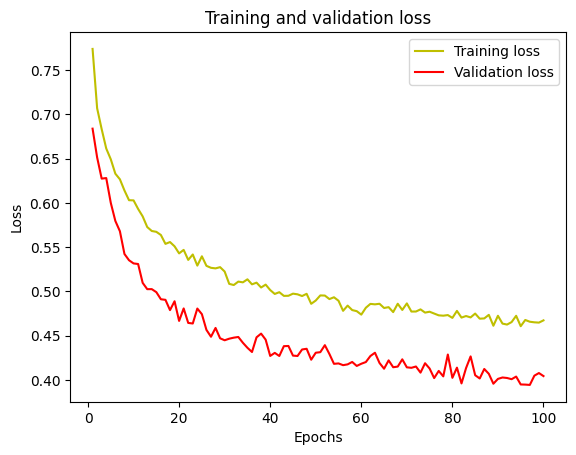

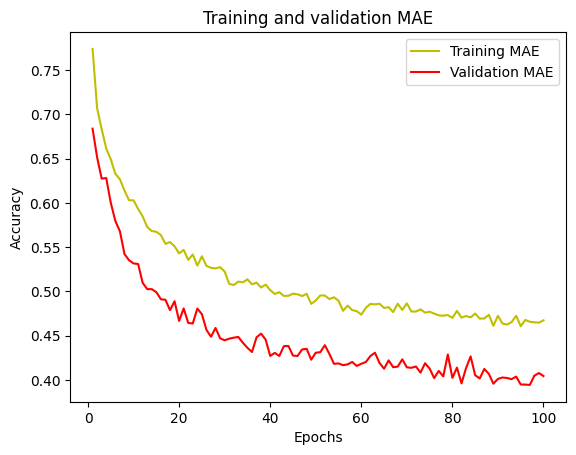

104/104 [==============================] - 0s 1ms/step
Predicted values are:  [[21.11955   14.471013  17.581543   2.2294953 75.744965 ]
 [22.977434  14.710637  20.48149    1.421738  38.254738 ]
 [23.001469  15.093378  16.518549   1.634321  68.74358  ]
 ...
 [16.584328  11.42447   16.657198   2.0500717 69.01288  ]
 [24.435564  15.759495  25.26252    2.20659   23.302753 ]
 [21.181948  15.233627  39.5379     4.0577683  4.6857753]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2022-07-16 03:00:00+02:00  32.0   21.0                8.0             2.0  \
2022-09-09 09:00:00+02:00  17.0    8.0               21.0             2.0   
2022-07-01 09:00:00+02:00  24.0   15.0               16.0             4.0   
2022-10-13 12:00:00+02:00  21.0   10.0               15.0             3.0   
2023-06-24 23:00:00+02:00  29.0   10.0               14.0             1.0   
...        

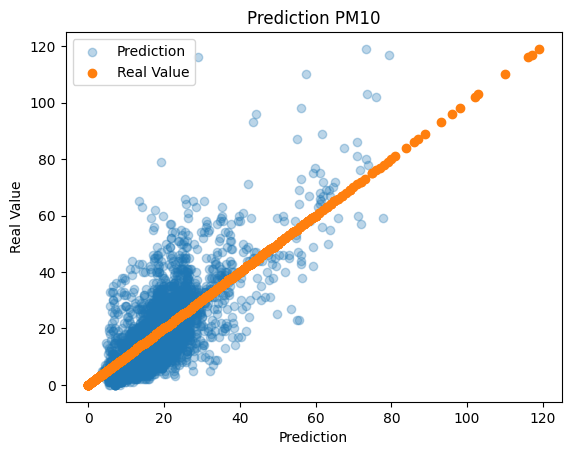

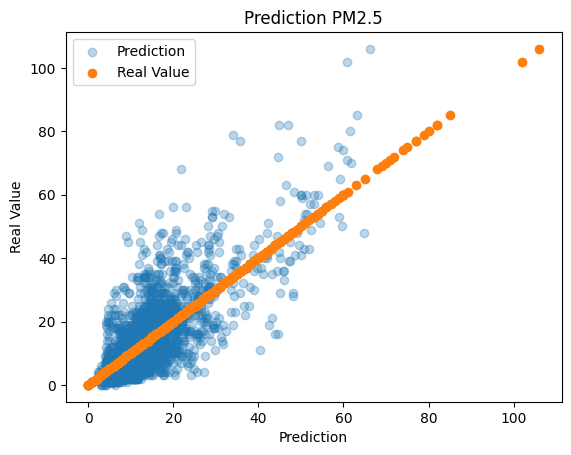

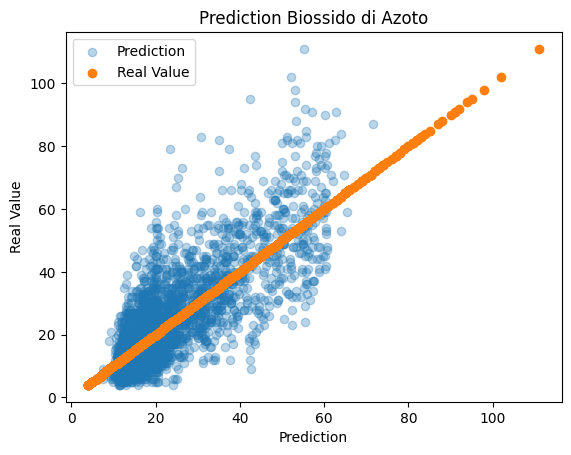

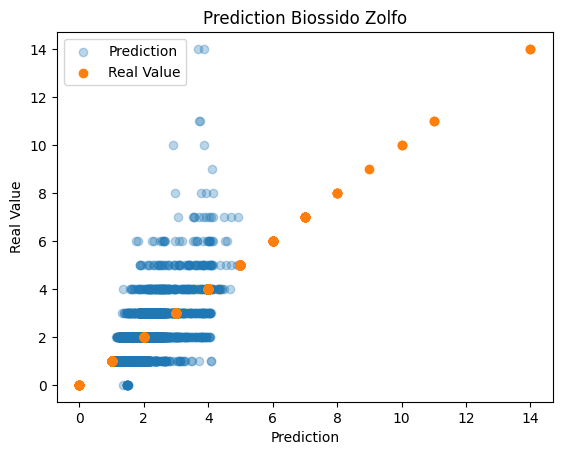

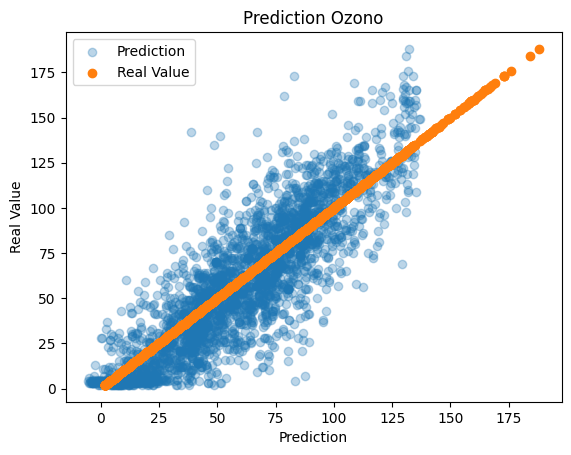

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                512       
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                8256      
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 6ms/step - loss: 0.7843 - mean_squared_error: 0.7843 - val_loss: 0.7219 - val_mean_squared_error: 0.7219
Epoch 2/100
353/354 [============================>.] - ETA: 0s - loss: 0.7323 - mean_squared_error: 0.7323
Epoch 2: val_loss improved from 0.72187 to 0.69563, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.7323 - mean_squared_error: 0.7323 - val_loss: 0.6956 - val_mean_squared_error: 0.6956
Epoch 3/100
342/354 [===========================>..] - ETA: 0s - loss: 0.7219 - mean_squared_error: 0.7219
Epoch 3: val_loss improved from 0.69563 to 0.68228, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.7175 - mean_squared_error: 0.7175 - val_loss: 0.6823 - val_mean_squared_error: 0.6823
Epoch 4/100
346/354 [============================>.] - ETA: 0s - loss: 0.7050 - mean_squared_error: 0.7050
Epoch 4: val_loss did not improve from 0.68228
354/354 [==============================] - 1s 3ms/step - loss: 0.7067 - mean_squared_error: 0.7067 - val_loss: 0.7000 - val_mean_squared_error: 0.7000
Epoch 5/100
349/354 [============================>.] - ETA: 0s - loss: 0.6934 - mean_squared_error: 0.6934
Epoch 5: val_loss improved from 0.68228 to 0.64990, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.6943 - mean_squared_error: 0.6943 - val_loss: 0.6499 - val_mean_squared_error: 0.6499
Epoch 6/100
354/354 [==============================] - ETA: 0s - loss: 0.6873 - mean_squared_error: 0.6873
Epoch 6: val_loss improved from 0.64990 to 0.63968, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6873 - mean_squared_error: 0.6873 - val_loss: 0.6397 - val_mean_squared_error: 0.6397
Epoch 7/100
341/354 [===========================>..] - ETA: 0s - loss: 0.6759 - mean_squared_error: 0.6759
Epoch 7: val_loss improved from 0.63968 to 0.62859, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6767 - mean_squared_error: 0.6767 - val_loss: 0.6286 - val_mean_squared_error: 0.6286
Epoch 8/100
331/354 [===========================>..] - ETA: 0s - loss: 0.6708 - mean_squared_error: 0.6708
Epoch 8: val_loss did not improve from 0.62859
354/354 [==============================] - 1s 3ms/step - loss: 0.6695 - mean_squared_error: 0.6695 - val_loss: 0.6455 - val_mean_squared_error: 0.6455
Epoch 9/100
350/354 [============================>.] - ETA: 0s - loss: 0.6673 - mean_squared_error: 0.6673
Epoch 9: val_loss did not improve from 0.62859
354/354 [==============================] - 1s 2ms/step - loss: 0.6662 - mean_squared_error: 0.6662 - val_loss: 0.6414 - val_mean_squared_error: 0.6414
Epoch 10/100
351/354 [============================>.] - ETA: 0s - loss: 0.6547 - mean_squared_error: 0.6547
Epoch 10: val_loss improved from 0.62859 to 0.60871, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6543 - mean_squared_error: 0.6543 - val_loss: 0.6087 - val_mean_squared_error: 0.6087
Epoch 11/100
339/354 [===========================>..] - ETA: 0s - loss: 0.6490 - mean_squared_error: 0.6490
Epoch 11: val_loss improved from 0.60871 to 0.60008, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6494 - mean_squared_error: 0.6494 - val_loss: 0.6001 - val_mean_squared_error: 0.6001
Epoch 12/100
336/354 [===========================>..] - ETA: 0s - loss: 0.6480 - mean_squared_error: 0.6480
Epoch 12: val_loss improved from 0.60008 to 0.59577, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6472 - mean_squared_error: 0.6472 - val_loss: 0.5958 - val_mean_squared_error: 0.5958
Epoch 13/100
347/354 [============================>.] - ETA: 0s - loss: 0.6405 - mean_squared_error: 0.6405
Epoch 13: val_loss improved from 0.59577 to 0.58811, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6413 - mean_squared_error: 0.6413 - val_loss: 0.5881 - val_mean_squared_error: 0.5881
Epoch 14/100
329/354 [==========================>...] - ETA: 0s - loss: 0.6313 - mean_squared_error: 0.6313
Epoch 14: val_loss improved from 0.58811 to 0.58755, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6341 - mean_squared_error: 0.6341 - val_loss: 0.5875 - val_mean_squared_error: 0.5875
Epoch 15/100
346/354 [============================>.] - ETA: 0s - loss: 0.6322 - mean_squared_error: 0.6322
Epoch 15: val_loss improved from 0.58755 to 0.57401, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6309 - mean_squared_error: 0.6309 - val_loss: 0.5740 - val_mean_squared_error: 0.5740
Epoch 16/100
344/354 [============================>.] - ETA: 0s - loss: 0.6304 - mean_squared_error: 0.6304
Epoch 16: val_loss did not improve from 0.57401
354/354 [==============================] - 1s 3ms/step - loss: 0.6307 - mean_squared_error: 0.6307 - val_loss: 0.6030 - val_mean_squared_error: 0.6030
Epoch 17/100
338/354 [===========================>..] - ETA: 0s - loss: 0.6195 - mean_squared_error: 0.6195
Epoch 17: val_loss did not improve from 0.57401
354/354 [==============================] - 1s 3ms/step - loss: 0.6224 - mean_squared_error: 0.6224 - val_loss: 0.5797 - val_mean_squared_error: 0.5797
Epoch 18/100
348/354 [============================>.] - ETA: 0s - loss: 0.6245 - mean_squared_error: 0.6245
Epoch 18: val_loss did not improve from 0.57401
354/354 [==============================] - 1s 2ms/step - loss: 0.6247 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6198 - mean_squared_error: 0.6198 - val_loss: 0.5687 - val_mean_squared_error: 0.5687
Epoch 20/100
353/354 [============================>.] - ETA: 0s - loss: 0.6121 - mean_squared_error: 0.6121
Epoch 20: val_loss improved from 0.56867 to 0.56161, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6119 - mean_squared_error: 0.6119 - val_loss: 0.5616 - val_mean_squared_error: 0.5616
Epoch 21/100
336/354 [===========================>..] - ETA: 0s - loss: 0.6142 - mean_squared_error: 0.6142
Epoch 21: val_loss improved from 0.56161 to 0.55935, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 7ms/step - loss: 0.6136 - mean_squared_error: 0.6136 - val_loss: 0.5593 - val_mean_squared_error: 0.5593
Epoch 22/100
335/354 [===========================>..] - ETA: 0s - loss: 0.6117 - mean_squared_error: 0.6117
Epoch 22: val_loss did not improve from 0.55935
354/354 [==============================] - 1s 3ms/step - loss: 0.6099 - mean_squared_error: 0.6099 - val_loss: 0.5664 - val_mean_squared_error: 0.5664
Epoch 23/100
343/354 [============================>.] - ETA: 0s - loss: 0.6039 - mean_squared_error: 0.6039
Epoch 23: val_loss improved from 0.55935 to 0.55829, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.6063 - mean_squared_error: 0.6063 - val_loss: 0.5583 - val_mean_squared_error: 0.5583
Epoch 24/100
342/354 [===========================>..] - ETA: 0s - loss: 0.6080 - mean_squared_error: 0.6080
Epoch 24: val_loss improved from 0.55829 to 0.55352, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.6054 - mean_squared_error: 0.6054 - val_loss: 0.5535 - val_mean_squared_error: 0.5535
Epoch 25/100
354/354 [==============================] - ETA: 0s - loss: 0.5992 - mean_squared_error: 0.5992
Epoch 25: val_loss improved from 0.55352 to 0.54996, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5992 - mean_squared_error: 0.5992 - val_loss: 0.5500 - val_mean_squared_error: 0.5500
Epoch 26/100
338/354 [===========================>..] - ETA: 0s - loss: 0.5958 - mean_squared_error: 0.5958
Epoch 26: val_loss improved from 0.54996 to 0.53888, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5978 - mean_squared_error: 0.5978 - val_loss: 0.5389 - val_mean_squared_error: 0.5389
Epoch 27/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5959 - mean_squared_error: 0.5959
Epoch 27: val_loss did not improve from 0.53888
354/354 [==============================] - 1s 2ms/step - loss: 0.5949 - mean_squared_error: 0.5949 - val_loss: 0.5484 - val_mean_squared_error: 0.5484
Epoch 28/100
338/354 [===========================>..] - ETA: 0s - loss: 0.5958 - mean_squared_error: 0.5958
Epoch 28: val_loss improved from 0.53888 to 0.53533, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5934 - mean_squared_error: 0.5934 - val_loss: 0.5353 - val_mean_squared_error: 0.5353
Epoch 29/100
346/354 [============================>.] - ETA: 0s - loss: 0.5898 - mean_squared_error: 0.5898
Epoch 29: val_loss did not improve from 0.53533
354/354 [==============================] - 1s 3ms/step - loss: 0.5891 - mean_squared_error: 0.5891 - val_loss: 0.5401 - val_mean_squared_error: 0.5401
Epoch 30/100
328/354 [==========================>...] - ETA: 0s - loss: 0.5912 - mean_squared_error: 0.5912
Epoch 30: val_loss improved from 0.53533 to 0.52743, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 10ms/step - loss: 0.5908 - mean_squared_error: 0.5908 - val_loss: 0.5274 - val_mean_squared_error: 0.5274
Epoch 31/100
346/354 [============================>.] - ETA: 0s - loss: 0.5784 - mean_squared_error: 0.5784
Epoch 31: val_loss improved from 0.52743 to 0.52414, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5800 - mean_squared_error: 0.5800 - val_loss: 0.5241 - val_mean_squared_error: 0.5241
Epoch 32/100
352/354 [============================>.] - ETA: 0s - loss: 0.5855 - mean_squared_error: 0.5855
Epoch 32: val_loss did not improve from 0.52414
354/354 [==============================] - 1s 3ms/step - loss: 0.5852 - mean_squared_error: 0.5852 - val_loss: 0.5253 - val_mean_squared_error: 0.5253
Epoch 33/100
333/354 [===========================>..] - ETA: 0s - loss: 0.5893 - mean_squared_error: 0.5893
Epoch 33: val_loss did not improve from 0.52414
354/354 [==============================] - 1s 2ms/step - loss: 0.5900 - mean_squared_error: 0.5900 - val_loss: 0.5246 - val_mean_squared_error: 0.5246
Epoch 34/100
347/354 [============================>.] - ETA: 0s - loss: 0.5758 - mean_squared_error: 0.5758
Epoch 34: val_loss improved from 0.52414 to 0.51744, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5771 - mean_squared_error: 0.5771 - val_loss: 0.5174 - val_mean_squared_error: 0.5174
Epoch 35/100
331/354 [===========================>..] - ETA: 0s - loss: 0.5765 - mean_squared_error: 0.5765
Epoch 35: val_loss did not improve from 0.51744
354/354 [==============================] - 1s 3ms/step - loss: 0.5780 - mean_squared_error: 0.5780 - val_loss: 0.5199 - val_mean_squared_error: 0.5199
Epoch 36/100
349/354 [============================>.] - ETA: 0s - loss: 0.5791 - mean_squared_error: 0.5791
Epoch 36: val_loss improved from 0.51744 to 0.51535, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5807 - mean_squared_error: 0.5807 - val_loss: 0.5153 - val_mean_squared_error: 0.5153
Epoch 37/100
329/354 [==========================>...] - ETA: 0s - loss: 0.5744 - mean_squared_error: 0.5744
Epoch 37: val_loss did not improve from 0.51535
354/354 [==============================] - 1s 2ms/step - loss: 0.5739 - mean_squared_error: 0.5739 - val_loss: 0.5191 - val_mean_squared_error: 0.5191
Epoch 38/100
343/354 [============================>.] - ETA: 0s - loss: 0.5744 - mean_squared_error: 0.5744
Epoch 38: val_loss improved from 0.51535 to 0.51283, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5747 - mean_squared_error: 0.5747 - val_loss: 0.5128 - val_mean_squared_error: 0.5128
Epoch 39/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5726 - mean_squared_error: 0.5726
Epoch 39: val_loss did not improve from 0.51283
354/354 [==============================] - 1s 2ms/step - loss: 0.5710 - mean_squared_error: 0.5710 - val_loss: 0.5131 - val_mean_squared_error: 0.5131
Epoch 40/100
349/354 [============================>.] - ETA: 0s - loss: 0.5670 - mean_squared_error: 0.5670
Epoch 40: val_loss improved from 0.51283 to 0.51018, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.5666 - mean_squared_error: 0.5666 - val_loss: 0.5102 - val_mean_squared_error: 0.5102
Epoch 41/100
332/354 [===========================>..] - ETA: 0s - loss: 0.5711 - mean_squared_error: 0.5711
Epoch 41: val_loss did not improve from 0.51018
354/354 [==============================] - 1s 2ms/step - loss: 0.5729 - mean_squared_error: 0.5729 - val_loss: 0.5162 - val_mean_squared_error: 0.5162
Epoch 42/100
347/354 [============================>.] - ETA: 0s - loss: 0.5672 - mean_squared_error: 0.5672
Epoch 42: val_loss improved from 0.51018 to 0.50629, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 1s 4ms/step - loss: 0.5677 - mean_squared_error: 0.5677 - val_loss: 0.5063 - val_mean_squared_error: 0.5063
Epoch 43/100
341/354 [===========================>..] - ETA: 0s - loss: 0.5679 - mean_squared_error: 0.5679
Epoch 43: val_loss did not improve from 0.50629
354/354 [==============================] - 1s 2ms/step - loss: 0.5661 - mean_squared_error: 0.5661 - val_loss: 0.5074 - val_mean_squared_error: 0.5074
Epoch 44/100
331/354 [===========================>..] - ETA: 0s - loss: 0.5611 - mean_squared_error: 0.5611
Epoch 44: val_loss improved from 0.50629 to 0.50401, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5608 - mean_squared_error: 0.5608 - val_loss: 0.5040 - val_mean_squared_error: 0.5040
Epoch 45/100
332/354 [===========================>..] - ETA: 0s - loss: 0.5691 - mean_squared_error: 0.5691
Epoch 45: val_loss improved from 0.50401 to 0.49993, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5676 - mean_squared_error: 0.5676 - val_loss: 0.4999 - val_mean_squared_error: 0.4999
Epoch 46/100
344/354 [============================>.] - ETA: 0s - loss: 0.5610 - mean_squared_error: 0.5610
Epoch 46: val_loss improved from 0.49993 to 0.49809, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5609 - mean_squared_error: 0.5609 - val_loss: 0.4981 - val_mean_squared_error: 0.4981
Epoch 47/100
327/354 [==========================>...] - ETA: 0s - loss: 0.5603 - mean_squared_error: 0.5603
Epoch 47: val_loss did not improve from 0.49809
354/354 [==============================] - 1s 2ms/step - loss: 0.5578 - mean_squared_error: 0.5578 - val_loss: 0.5035 - val_mean_squared_error: 0.5035
Epoch 48/100
352/354 [============================>.] - ETA: 0s - loss: 0.5613 - mean_squared_error: 0.5613
Epoch 48: val_loss improved from 0.49809 to 0.49604, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5616 - mean_squared_error: 0.5616 - val_loss: 0.4960 - val_mean_squared_error: 0.4960
Epoch 49/100
346/354 [============================>.] - ETA: 0s - loss: 0.5604 - mean_squared_error: 0.5604
Epoch 49: val_loss did not improve from 0.49604
354/354 [==============================] - 1s 2ms/step - loss: 0.5607 - mean_squared_error: 0.5607 - val_loss: 0.5011 - val_mean_squared_error: 0.5011
Epoch 50/100
329/354 [==========================>...] - ETA: 0s - loss: 0.5646 - mean_squared_error: 0.5646
Epoch 50: val_loss improved from 0.49604 to 0.49499, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5664 - mean_squared_error: 0.5664 - val_loss: 0.4950 - val_mean_squared_error: 0.4950
Epoch 51/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5602 - mean_squared_error: 0.5602
Epoch 51: val_loss improved from 0.49499 to 0.48331, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5576 - mean_squared_error: 0.5576 - val_loss: 0.4833 - val_mean_squared_error: 0.4833
Epoch 52/100
354/354 [==============================] - ETA: 0s - loss: 0.5582 - mean_squared_error: 0.5582
Epoch 52: val_loss did not improve from 0.48331
354/354 [==============================] - 1s 2ms/step - loss: 0.5582 - mean_squared_error: 0.5582 - val_loss: 0.4950 - val_mean_squared_error: 0.4950
Epoch 53/100
343/354 [============================>.] - ETA: 0s - loss: 0.5511 - mean_squared_error: 0.5511
Epoch 53: val_loss did not improve from 0.48331
354/354 [==============================] - 1s 2ms/step - loss: 0.5513 - mean_squared_error: 0.5513 - val_loss: 0.4960 - val_mean_squared_error: 0.4960
Epoch 54/100
344/354 [============================>.] - ETA: 0s - loss: 0.5529 - mean_squared_error: 0.5529
Epoch 54: val_loss improved from 0.48331 to 0.48180, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5532 - mean_squared_error: 0.5532 - val_loss: 0.4818 - val_mean_squared_error: 0.4818
Epoch 55/100
346/354 [============================>.] - ETA: 0s - loss: 0.5518 - mean_squared_error: 0.5518
Epoch 55: val_loss did not improve from 0.48180
354/354 [==============================] - 1s 3ms/step - loss: 0.5500 - mean_squared_error: 0.5500 - val_loss: 0.4902 - val_mean_squared_error: 0.4902
Epoch 56/100
347/354 [============================>.] - ETA: 0s - loss: 0.5536 - mean_squared_error: 0.5536
Epoch 56: val_loss improved from 0.48180 to 0.48164, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5543 - mean_squared_error: 0.5543 - val_loss: 0.4816 - val_mean_squared_error: 0.4816
Epoch 57/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5505 - mean_squared_error: 0.5505
Epoch 57: val_loss did not improve from 0.48164
354/354 [==============================] - 1s 4ms/step - loss: 0.5529 - mean_squared_error: 0.5529 - val_loss: 0.4835 - val_mean_squared_error: 0.4835
Epoch 58/100
343/354 [============================>.] - ETA: 0s - loss: 0.5466 - mean_squared_error: 0.5466
Epoch 58: val_loss improved from 0.48164 to 0.48037, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5502 - mean_squared_error: 0.5502 - val_loss: 0.4804 - val_mean_squared_error: 0.4804
Epoch 59/100
347/354 [============================>.] - ETA: 0s - loss: 0.5482 - mean_squared_error: 0.5482
Epoch 59: val_loss improved from 0.48037 to 0.47613, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5497 - mean_squared_error: 0.5497 - val_loss: 0.4761 - val_mean_squared_error: 0.4761
Epoch 60/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5425 - mean_squared_error: 0.5425
Epoch 60: val_loss did not improve from 0.47613
354/354 [==============================] - 1s 3ms/step - loss: 0.5421 - mean_squared_error: 0.5421 - val_loss: 0.4821 - val_mean_squared_error: 0.4821
Epoch 61/100
330/354 [==========================>...] - ETA: 0s - loss: 0.5480 - mean_squared_error: 0.5480
Epoch 61: val_loss did not improve from 0.47613
354/354 [==============================] - 1s 2ms/step - loss: 0.5485 - mean_squared_error: 0.5485 - val_loss: 0.4811 - val_mean_squared_error: 0.4811
Epoch 62/100
336/354 [===========================>..] - ETA: 0s - loss: 0.5462 - mean_squared_error: 0.5462
Epoch 62: val_loss did not improve from 0.47613
354/354 [==============================] - 1s 3ms/step - loss: 0.5469 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5409 - mean_squared_error: 0.5409 - val_loss: 0.4735 - val_mean_squared_error: 0.4735
Epoch 67/100
344/354 [============================>.] - ETA: 0s - loss: 0.5469 - mean_squared_error: 0.5469
Epoch 67: val_loss did not improve from 0.47353
354/354 [==============================] - 1s 3ms/step - loss: 0.5469 - mean_squared_error: 0.5469 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 68/100
343/354 [============================>.] - ETA: 0s - loss: 0.5420 - mean_squared_error: 0.5420
Epoch 68: val_loss improved from 0.47353 to 0.47149, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5424 - mean_squared_error: 0.5424 - val_loss: 0.4715 - val_mean_squared_error: 0.4715
Epoch 69/100
335/354 [===========================>..] - ETA: 0s - loss: 0.5419 - mean_squared_error: 0.5419
Epoch 69: val_loss did not improve from 0.47149
354/354 [==============================] - 1s 3ms/step - loss: 0.5393 - mean_squared_error: 0.5393 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 70/100
348/354 [============================>.] - ETA: 0s - loss: 0.5468 - mean_squared_error: 0.5468
Epoch 70: val_loss did not improve from 0.47149
354/354 [==============================] - 1s 3ms/step - loss: 0.5486 - mean_squared_error: 0.5486 - val_loss: 0.4738 - val_mean_squared_error: 0.4738
Epoch 71/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5406 - mean_squared_error: 0.5406
Epoch 71: val_loss improved from 0.47149 to 0.47042, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 9ms/step - loss: 0.5398 - mean_squared_error: 0.5398 - val_loss: 0.4704 - val_mean_squared_error: 0.4704
Epoch 72/100
347/354 [============================>.] - ETA: 0s - loss: 0.5434 - mean_squared_error: 0.5434
Epoch 72: val_loss did not improve from 0.47042
354/354 [==============================] - 1s 3ms/step - loss: 0.5416 - mean_squared_error: 0.5416 - val_loss: 0.4781 - val_mean_squared_error: 0.4781
Epoch 73/100
343/354 [============================>.] - ETA: 0s - loss: 0.5441 - mean_squared_error: 0.5441
Epoch 73: val_loss did not improve from 0.47042
354/354 [==============================] - 1s 3ms/step - loss: 0.5425 - mean_squared_error: 0.5425 - val_loss: 0.4750 - val_mean_squared_error: 0.4750
Epoch 74/100
354/354 [==============================] - ETA: 0s - loss: 0.5393 - mean_squared_error: 0.5393
Epoch 74: val_loss did not improve from 0.47042
354/354 [==============================] - 1s 3ms/step - loss: 0.5393 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5264 - mean_squared_error: 0.5264 - val_loss: 0.4596 - val_mean_squared_error: 0.4596
Epoch 81/100
354/354 [==============================] - ETA: 0s - loss: 0.5338 - mean_squared_error: 0.5338
Epoch 81: val_loss did not improve from 0.45959
354/354 [==============================] - 1s 3ms/step - loss: 0.5338 - mean_squared_error: 0.5338 - val_loss: 0.4729 - val_mean_squared_error: 0.4729
Epoch 82/100
353/354 [============================>.] - ETA: 0s - loss: 0.5337 - mean_squared_error: 0.5337
Epoch 82: val_loss did not improve from 0.45959
354/354 [==============================] - 1s 4ms/step - loss: 0.5335 - mean_squared_error: 0.5335 - val_loss: 0.4728 - val_mean_squared_error: 0.4728
Epoch 83/100
351/354 [============================>.] - ETA: 0s - loss: 0.5384 - mean_squared_error: 0.5384
Epoch 83: val_loss did not improve from 0.45959
354/354 [==============================] - 1s 4ms/step - loss: 0.5388 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 7ms/step - loss: 0.5329 - mean_squared_error: 0.5329 - val_loss: 0.4553 - val_mean_squared_error: 0.4553
Epoch 87/100
330/354 [==========================>...] - ETA: 0s - loss: 0.5314 - mean_squared_error: 0.5314
Epoch 87: val_loss did not improve from 0.45532
354/354 [==============================] - 1s 3ms/step - loss: 0.5294 - mean_squared_error: 0.5294 - val_loss: 0.4688 - val_mean_squared_error: 0.4688
Epoch 88/100
347/354 [============================>.] - ETA: 0s - loss: 0.5314 - mean_squared_error: 0.5314
Epoch 88: val_loss did not improve from 0.45532
354/354 [==============================] - 1s 3ms/step - loss: 0.5301 - mean_squared_error: 0.5301 - val_loss: 0.4619 - val_mean_squared_error: 0.4619
Epoch 89/100
348/354 [============================>.] - ETA: 0s - loss: 0.5311 - mean_squared_error: 0.5311
Epoch 89: val_loss did not improve from 0.45532
354/354 [==============================] - 1s 2ms/step - loss: 0.5319 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5333 - mean_squared_error: 0.5333 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 94/100
348/354 [============================>.] - ETA: 0s - loss: 0.5286 - mean_squared_error: 0.5286
Epoch 94: val_loss did not improve from 0.45427
354/354 [==============================] - 1s 3ms/step - loss: 0.5281 - mean_squared_error: 0.5281 - val_loss: 0.4630 - val_mean_squared_error: 0.4630
Epoch 95/100
346/354 [============================>.] - ETA: 0s - loss: 0.5335 - mean_squared_error: 0.5335
Epoch 95: val_loss did not improve from 0.45427
354/354 [==============================] - 1s 3ms/step - loss: 0.5307 - mean_squared_error: 0.5307 - val_loss: 0.4646 - val_mean_squared_error: 0.4646
Epoch 96/100
337/354 [===========================>..] - ETA: 0s - loss: 0.5273 - mean_squared_error: 0.5273
Epoch 96: val_loss did not improve from 0.45427
354/354 [==============================] - 1s 3ms/step - loss: 0.5277 - mean_sq

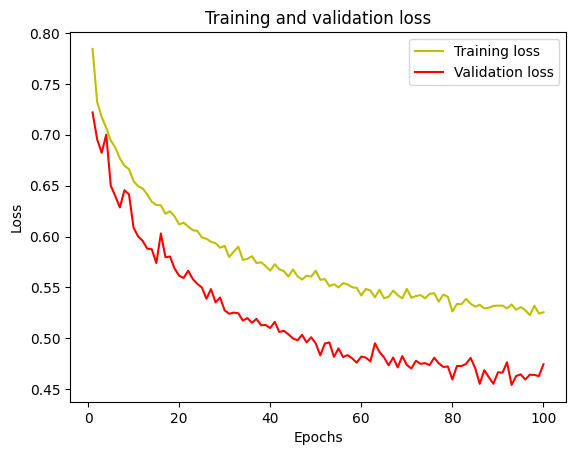

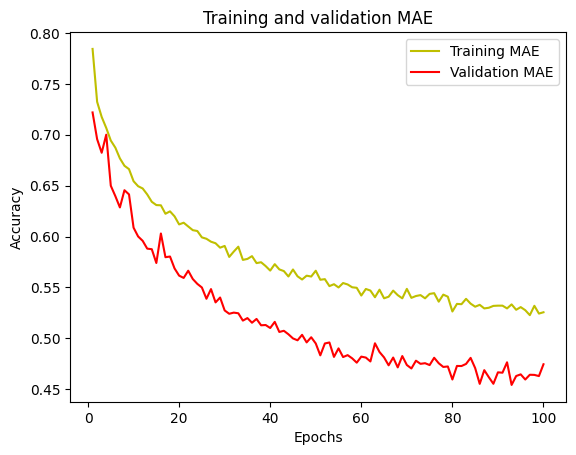

190/190 [==============================] - 0s 1ms/step
Predicted values are:  [[15.820782  10.5555    19.436247   1.5366611 59.393337 ]
 [17.436941  11.275302  17.248287   1.6005353 63.371204 ]
 [27.062523  21.457245  47.55105    2.9289446 14.252013 ]
 ...
 [22.875786  16.999796  38.799297   3.1324322 10.261806 ]
 [20.599287  14.366123  17.211607   2.4138956 84.66273  ]
 [16.375742  11.137433  18.334127   1.7536082 59.892548 ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-07-05 23:00:00+02:00  15.0    9.0               16.0             1.0  \
2023-06-26 01:00:00+02:00  24.0   12.0               13.0             1.0   
2022-03-04 10:00:00+02:00  59.0   48.0               56.0             4.0   
2022-01-29 15:00:00+02:00   9.0    4.0               27.0             1.0   
2023-02-19 09:00:00+02:00  65.0   58.0               40.0             2.0   
...        

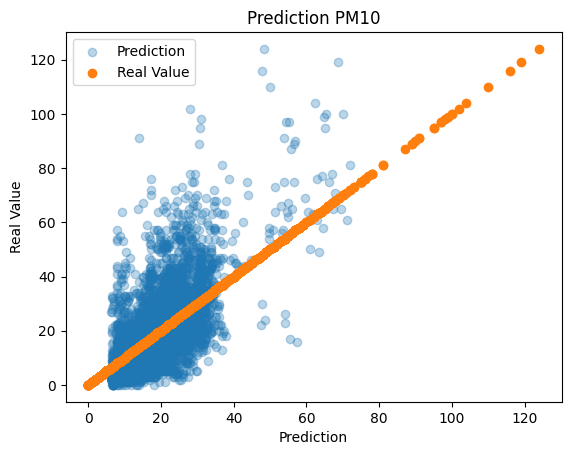

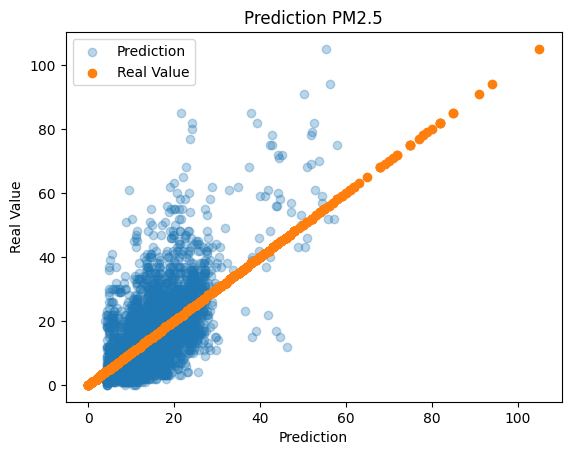

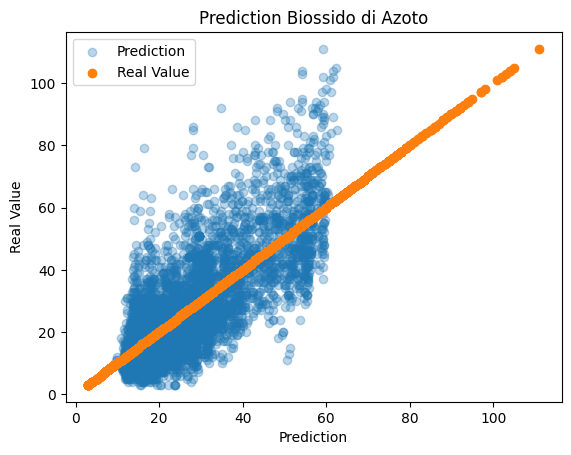

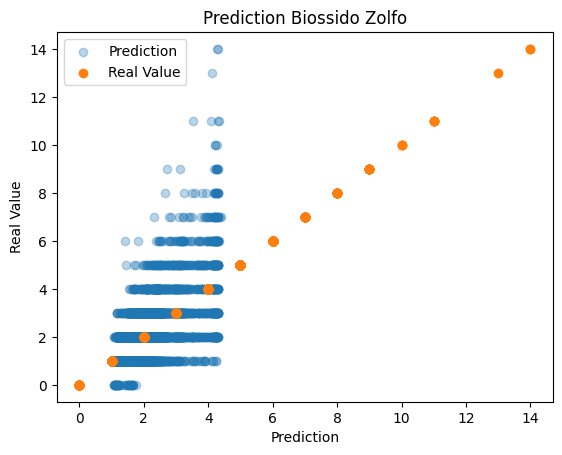

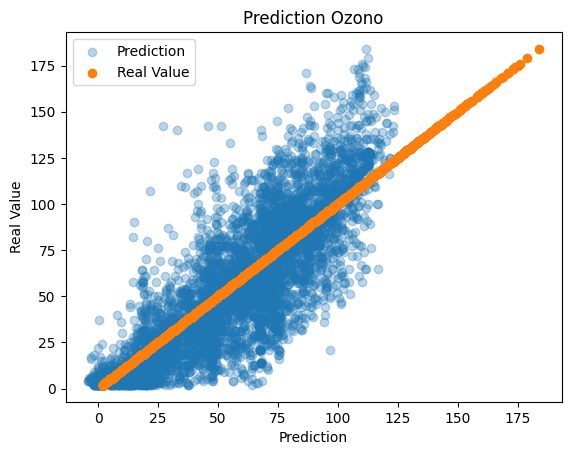

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                512       
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 128)               8320      
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 4s 30ms/step - loss: 0.8038 - mean_squared_error: 0.8038 - val_loss: 0.6281 - val_mean_squared_error: 0.6281
Epoch 2/100
60/60 [==============================] - ETA: 0s - loss: 0.6808 - mean_squared_error: 0.6808
Epoch 2: val_loss improved from 0.62813 to 0.59641, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 31ms/step - loss: 0.6808 - mean_squared_error: 0.6808 - val_loss: 0.5964 - val_mean_squared_error: 0.5964
Epoch 3/100
58/60 [============================>.] - ETA: 0s - loss: 0.6444 - mean_squared_error: 0.6444
Epoch 3: val_loss improved from 0.59641 to 0.59633, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 40ms/step - loss: 0.6552 - mean_squared_error: 0.6552 - val_loss: 0.5963 - val_mean_squared_error: 0.5963
Epoch 4/100
55/60 [==========================>...] - ETA: 0s - loss: 0.6601 - mean_squared_error: 0.6601
Epoch 4: val_loss improved from 0.59633 to 0.58103, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 39ms/step - loss: 0.6574 - mean_squared_error: 0.6574 - val_loss: 0.5810 - val_mean_squared_error: 0.5810
Epoch 5/100
47/60 [======================>.......] - ETA: 0s - loss: 0.6600 - mean_squared_error: 0.6600
Epoch 5: val_loss improved from 0.58103 to 0.57392, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 28ms/step - loss: 0.6481 - mean_squared_error: 0.6481 - val_loss: 0.5739 - val_mean_squared_error: 0.5739
Epoch 6/100
53/60 [=========================>....] - ETA: 0s - loss: 0.6452 - mean_squared_error: 0.6452
Epoch 6: val_loss did not improve from 0.57392
60/60 [==============================] - 0s 4ms/step - loss: 0.6413 - mean_squared_error: 0.6413 - val_loss: 0.5810 - val_mean_squared_error: 0.5810
Epoch 7/100
48/60 [=======================>......] - ETA: 0s - loss: 0.6277 - mean_squared_error: 0.6277
Epoch 7: val_loss improved from 0.57392 to 0.56210, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 32ms/step - loss: 0.6286 - mean_squared_error: 0.6286 - val_loss: 0.5621 - val_mean_squared_error: 0.5621
Epoch 8/100
59/60 [============================>.] - ETA: 0s - loss: 0.6416 - mean_squared_error: 0.6416
Epoch 8: val_loss did not improve from 0.56210
60/60 [==============================] - 0s 3ms/step - loss: 0.6380 - mean_squared_error: 0.6380 - val_loss: 0.5660 - val_mean_squared_error: 0.5660
Epoch 9/100
32/60 [===============>..............] - ETA: 0s - loss: 0.6344 - mean_squared_error: 0.6344
Epoch 9: val_loss did not improve from 0.56210
60/60 [==============================] - 0s 2ms/step - loss: 0.6319 - mean_squared_error: 0.6319 - val_loss: 0.5753 - val_mean_squared_error: 0.5753
Epoch 10/100
33/60 [===============>..............] - ETA: 0s - loss: 0.6502 - mean_squared_error: 0.6502
Epoch 10: val_loss improved from 0.56210 to 0.55815, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.6274 - mean_squared_error: 0.6274 - val_loss: 0.5581 - val_mean_squared_error: 0.5581
Epoch 11/100
41/60 [===================>..........] - ETA: 0s - loss: 0.6216 - mean_squared_error: 0.6216
Epoch 11: val_loss improved from 0.55815 to 0.54468, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 32ms/step - loss: 0.6232 - mean_squared_error: 0.6232 - val_loss: 0.5447 - val_mean_squared_error: 0.5447
Epoch 12/100
51/60 [========================>.....] - ETA: 0s - loss: 0.6216 - mean_squared_error: 0.6216
Epoch 12: val_loss improved from 0.54468 to 0.54196, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 28ms/step - loss: 0.6187 - mean_squared_error: 0.6187 - val_loss: 0.5420 - val_mean_squared_error: 0.5420
Epoch 13/100
52/60 [=========================>....] - ETA: 0s - loss: 0.6161 - mean_squared_error: 0.6161
Epoch 13: val_loss did not improve from 0.54196
60/60 [==============================] - 0s 4ms/step - loss: 0.6190 - mean_squared_error: 0.6190 - val_loss: 0.5699 - val_mean_squared_error: 0.5699
Epoch 14/100
46/60 [======================>.......] - ETA: 0s - loss: 0.6146 - mean_squared_error: 0.6146
Epoch 14: val_loss improved from 0.54196 to 0.53553, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 27ms/step - loss: 0.6161 - mean_squared_error: 0.6161 - val_loss: 0.5355 - val_mean_squared_error: 0.5355
Epoch 15/100
54/60 [==========================>...] - ETA: 0s - loss: 0.5971 - mean_squared_error: 0.5971
Epoch 15: val_loss improved from 0.53553 to 0.52600, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 40ms/step - loss: 0.6089 - mean_squared_error: 0.6089 - val_loss: 0.5260 - val_mean_squared_error: 0.5260
Epoch 16/100
58/60 [============================>.] - ETA: 0s - loss: 0.6071 - mean_squared_error: 0.6071
Epoch 16: val_loss did not improve from 0.52600
60/60 [==============================] - 0s 6ms/step - loss: 0.6014 - mean_squared_error: 0.6014 - val_loss: 0.5268 - val_mean_squared_error: 0.5268
Epoch 17/100
57/60 [===========================>..] - ETA: 0s - loss: 0.5849 - mean_squared_error: 0.5849
Epoch 17: val_loss improved from 0.52600 to 0.52018, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 41ms/step - loss: 0.5944 - mean_squared_error: 0.5944 - val_loss: 0.5202 - val_mean_squared_error: 0.5202
Epoch 18/100
37/60 [=================>............] - ETA: 0s - loss: 0.5943 - mean_squared_error: 0.5943
Epoch 18: val_loss did not improve from 0.52018
60/60 [==============================] - 0s 3ms/step - loss: 0.5956 - mean_squared_error: 0.5956 - val_loss: 0.5212 - val_mean_squared_error: 0.5212
Epoch 19/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5872 - mean_squared_error: 0.5872
Epoch 19: val_loss improved from 0.52018 to 0.50511, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 25ms/step - loss: 0.5870 - mean_squared_error: 0.5870 - val_loss: 0.5051 - val_mean_squared_error: 0.5051
Epoch 20/100
60/60 [==============================] - ETA: 0s - loss: 0.5820 - mean_squared_error: 0.5820
Epoch 20: val_loss improved from 0.50511 to 0.50280, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 26ms/step - loss: 0.5820 - mean_squared_error: 0.5820 - val_loss: 0.5028 - val_mean_squared_error: 0.5028
Epoch 21/100
53/60 [=========================>....] - ETA: 0s - loss: 0.5889 - mean_squared_error: 0.5889
Epoch 21: val_loss improved from 0.50280 to 0.49426, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 4s 63ms/step - loss: 0.5827 - mean_squared_error: 0.5827 - val_loss: 0.4943 - val_mean_squared_error: 0.4943
Epoch 22/100
60/60 [==============================] - ETA: 0s - loss: 0.5777 - mean_squared_error: 0.5777
Epoch 22: val_loss did not improve from 0.49426
60/60 [==============================] - 0s 3ms/step - loss: 0.5777 - mean_squared_error: 0.5777 - val_loss: 0.5070 - val_mean_squared_error: 0.5070
Epoch 23/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5771 - mean_squared_error: 0.5771
Epoch 23: val_loss did not improve from 0.49426
60/60 [==============================] - 0s 3ms/step - loss: 0.5800 - mean_squared_error: 0.5800 - val_loss: 0.5085 - val_mean_squared_error: 0.5085
Epoch 24/100
53/60 [=========================>....] - ETA: 0s - loss: 0.5750 - mean_squared_error: 0.5750
Epoch 24: val_loss improved from 0.49426 to 0.49170, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.5714 - mean_squared_error: 0.5714 - val_loss: 0.4917 - val_mean_squared_error: 0.4917
Epoch 25/100
54/60 [==========================>...] - ETA: 0s - loss: 0.5699 - mean_squared_error: 0.5699
Epoch 25: val_loss did not improve from 0.49170
60/60 [==============================] - 0s 4ms/step - loss: 0.5716 - mean_squared_error: 0.5716 - val_loss: 0.5268 - val_mean_squared_error: 0.5268
Epoch 26/100
59/60 [============================>.] - ETA: 0s - loss: 0.5745 - mean_squared_error: 0.5745
Epoch 26: val_loss improved from 0.49170 to 0.47500, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 31ms/step - loss: 0.5733 - mean_squared_error: 0.5733 - val_loss: 0.4750 - val_mean_squared_error: 0.4750
Epoch 27/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5771 - mean_squared_error: 0.5771
Epoch 27: val_loss did not improve from 0.47500
60/60 [==============================] - 0s 3ms/step - loss: 0.5705 - mean_squared_error: 0.5705 - val_loss: 0.4804 - val_mean_squared_error: 0.4804
Epoch 28/100
46/60 [======================>.......] - ETA: 0s - loss: 0.5610 - mean_squared_error: 0.5610
Epoch 28: val_loss did not improve from 0.47500
60/60 [==============================] - 0s 3ms/step - loss: 0.5648 - mean_squared_error: 0.5648 - val_loss: 0.4818 - val_mean_squared_error: 0.4818
Epoch 29/100
56/60 [===========================>..] - ETA: 0s - loss: 0.5626 - mean_squared_error: 0.5626
Epoch 29: val_loss improved from 0.47500 to 0.47397, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.5702 - mean_squared_error: 0.5702 - val_loss: 0.4740 - val_mean_squared_error: 0.4740
Epoch 30/100
40/60 [===================>..........] - ETA: 0s - loss: 0.5488 - mean_squared_error: 0.5488
Epoch 30: val_loss did not improve from 0.47397
60/60 [==============================] - 0s 3ms/step - loss: 0.5557 - mean_squared_error: 0.5557 - val_loss: 0.4768 - val_mean_squared_error: 0.4768
Epoch 31/100
56/60 [===========================>..] - ETA: 0s - loss: 0.5563 - mean_squared_error: 0.5563
Epoch 31: val_loss improved from 0.47397 to 0.46415, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 25ms/step - loss: 0.5571 - mean_squared_error: 0.5571 - val_loss: 0.4641 - val_mean_squared_error: 0.4641
Epoch 32/100
37/60 [=================>............] - ETA: 0s - loss: 0.5654 - mean_squared_error: 0.5654
Epoch 32: val_loss did not improve from 0.46415
60/60 [==============================] - 0s 3ms/step - loss: 0.5604 - mean_squared_error: 0.5604 - val_loss: 0.4711 - val_mean_squared_error: 0.4711
Epoch 33/100
46/60 [======================>.......] - ETA: 0s - loss: 0.5450 - mean_squared_error: 0.5450
Epoch 33: val_loss did not improve from 0.46415
60/60 [==============================] - 0s 3ms/step - loss: 0.5488 - mean_squared_error: 0.5488 - val_loss: 0.4655 - val_mean_squared_error: 0.4655
Epoch 34/100
44/60 [=====================>........] - ETA: 0s - loss: 0.5587 - mean_squared_error: 0.5587
Epoch 34: val_loss improved from 0.46415 to 0.46393, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.5563 - mean_squared_error: 0.5563 - val_loss: 0.4639 - val_mean_squared_error: 0.4639
Epoch 35/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5418 - mean_squared_error: 0.5418
Epoch 35: val_loss did not improve from 0.46393
60/60 [==============================] - 0s 4ms/step - loss: 0.5498 - mean_squared_error: 0.5498 - val_loss: 0.4777 - val_mean_squared_error: 0.4777
Epoch 36/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5447 - mean_squared_error: 0.5447
Epoch 36: val_loss improved from 0.46393 to 0.45578, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.5490 - mean_squared_error: 0.5490 - val_loss: 0.4558 - val_mean_squared_error: 0.4558
Epoch 37/100
52/60 [=========================>....] - ETA: 0s - loss: 0.5406 - mean_squared_error: 0.5406
Epoch 37: val_loss did not improve from 0.45578
60/60 [==============================] - 0s 3ms/step - loss: 0.5415 - mean_squared_error: 0.5415 - val_loss: 0.4580 - val_mean_squared_error: 0.4580
Epoch 38/100
45/60 [=====================>........] - ETA: 0s - loss: 0.5481 - mean_squared_error: 0.5481
Epoch 38: val_loss did not improve from 0.45578
60/60 [==============================] - 0s 3ms/step - loss: 0.5475 - mean_squared_error: 0.5475 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 39/100
49/60 [=======================>......] - ETA: 0s - loss: 0.5325 - mean_squared_error: 0.5325
Epoch 39: val_loss did not improve from 0.45578
60/60 [==============================] - 0s 3ms/step - loss: 0.5437 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.5392 - mean_squared_error: 0.5392 - val_loss: 0.4482 - val_mean_squared_error: 0.4482
Epoch 41/100
41/60 [===================>..........] - ETA: 0s - loss: 0.5466 - mean_squared_error: 0.5466
Epoch 41: val_loss improved from 0.44824 to 0.44551, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.5364 - mean_squared_error: 0.5364 - val_loss: 0.4455 - val_mean_squared_error: 0.4455
Epoch 42/100
60/60 [==============================] - ETA: 0s - loss: 0.5406 - mean_squared_error: 0.5406
Epoch 42: val_loss did not improve from 0.44551
60/60 [==============================] - 0s 4ms/step - loss: 0.5406 - mean_squared_error: 0.5406 - val_loss: 0.4512 - val_mean_squared_error: 0.4512
Epoch 43/100
50/60 [========================>.....] - ETA: 0s - loss: 0.5129 - mean_squared_error: 0.5129
Epoch 43: val_loss did not improve from 0.44551
60/60 [==============================] - 0s 3ms/step - loss: 0.5293 - mean_squared_error: 0.5293 - val_loss: 0.4585 - val_mean_squared_error: 0.4585
Epoch 44/100
43/60 [====================>.........] - ETA: 0s - loss: 0.5212 - mean_squared_error: 0.5212
Epoch 44: val_loss improved from 0.44551 to 0.44422, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.5369 - mean_squared_error: 0.5369 - val_loss: 0.4442 - val_mean_squared_error: 0.4442
Epoch 45/100
43/60 [====================>.........] - ETA: 0s - loss: 0.5271 - mean_squared_error: 0.5271
Epoch 45: val_loss improved from 0.44422 to 0.43757, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 25ms/step - loss: 0.5284 - mean_squared_error: 0.5284 - val_loss: 0.4376 - val_mean_squared_error: 0.4376
Epoch 46/100
46/60 [======================>.......] - ETA: 0s - loss: 0.5173 - mean_squared_error: 0.5173
Epoch 46: val_loss did not improve from 0.43757
60/60 [==============================] - 0s 3ms/step - loss: 0.5197 - mean_squared_error: 0.5197 - val_loss: 0.4477 - val_mean_squared_error: 0.4477
Epoch 47/100
41/60 [===================>..........] - ETA: 0s - loss: 0.5235 - mean_squared_error: 0.5235
Epoch 47: val_loss did not improve from 0.43757
60/60 [==============================] - 0s 3ms/step - loss: 0.5406 - mean_squared_error: 0.5406 - val_loss: 0.4510 - val_mean_squared_error: 0.4510
Epoch 48/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5310 - mean_squared_error: 0.5310
Epoch 48: val_loss did not improve from 0.43757
60/60 [==============================] - 0s 3ms/step - loss: 0.5304 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.5257 - mean_squared_error: 0.5257 - val_loss: 0.4273 - val_mean_squared_error: 0.4273
Epoch 53/100
52/60 [=========================>....] - ETA: 0s - loss: 0.5185 - mean_squared_error: 0.5185
Epoch 53: val_loss did not improve from 0.42733
60/60 [==============================] - 0s 3ms/step - loss: 0.5089 - mean_squared_error: 0.5089 - val_loss: 0.4395 - val_mean_squared_error: 0.4395
Epoch 54/100
42/60 [====================>.........] - ETA: 0s - loss: 0.5429 - mean_squared_error: 0.5429
Epoch 54: val_loss did not improve from 0.42733
60/60 [==============================] - 0s 3ms/step - loss: 0.5225 - mean_squared_error: 0.5225 - val_loss: 0.4418 - val_mean_squared_error: 0.4418
Epoch 55/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5173 - mean_squared_error: 0.5173
Epoch 55: val_loss did not improve from 0.42733
60/60 [==============================] - 0s 3ms/step - loss: 0.5258 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.5228 - mean_squared_error: 0.5228 - val_loss: 0.4272 - val_mean_squared_error: 0.4272
Epoch 57/100
48/60 [=======================>......] - ETA: 0s - loss: 0.5224 - mean_squared_error: 0.5224
Epoch 57: val_loss did not improve from 0.42721
60/60 [==============================] - 0s 3ms/step - loss: 0.5294 - mean_squared_error: 0.5294 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 58/100
52/60 [=========================>....] - ETA: 0s - loss: 0.5361 - mean_squared_error: 0.5361
Epoch 58: val_loss did not improve from 0.42721
60/60 [==============================] - 0s 3ms/step - loss: 0.5278 - mean_squared_error: 0.5278 - val_loss: 0.4300 - val_mean_squared_error: 0.4300
Epoch 59/100
51/60 [========================>.....] - ETA: 0s - loss: 0.5014 - mean_squared_error: 0.5014
Epoch 59: val_loss did not improve from 0.42721
60/60 [==============================] - 0s 3ms/step - loss: 0.5137 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 22ms/step - loss: 0.5100 - mean_squared_error: 0.5100 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 68/100
47/60 [======================>.......] - ETA: 0s - loss: 0.5197 - mean_squared_error: 0.5197
Epoch 68: val_loss did not improve from 0.42614
60/60 [==============================] - 0s 4ms/step - loss: 0.5087 - mean_squared_error: 0.5087 - val_loss: 0.4284 - val_mean_squared_error: 0.4284
Epoch 69/100
46/60 [======================>.......] - ETA: 0s - loss: 0.5092 - mean_squared_error: 0.5092
Epoch 69: val_loss improved from 0.42614 to 0.42458, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.5106 - mean_squared_error: 0.5106 - val_loss: 0.4246 - val_mean_squared_error: 0.4246
Epoch 70/100
60/60 [==============================] - ETA: 0s - loss: 0.5077 - mean_squared_error: 0.5077
Epoch 70: val_loss did not improve from 0.42458
60/60 [==============================] - 0s 3ms/step - loss: 0.5077 - mean_squared_error: 0.5077 - val_loss: 0.4362 - val_mean_squared_error: 0.4362
Epoch 71/100
42/60 [====================>.........] - ETA: 0s - loss: 0.4944 - mean_squared_error: 0.4944
Epoch 71: val_loss improved from 0.42458 to 0.42194, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 25ms/step - loss: 0.5032 - mean_squared_error: 0.5032 - val_loss: 0.4219 - val_mean_squared_error: 0.4219
Epoch 72/100
48/60 [=======================>......] - ETA: 0s - loss: 0.5174 - mean_squared_error: 0.5174
Epoch 72: val_loss improved from 0.42194 to 0.41984, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 25ms/step - loss: 0.5104 - mean_squared_error: 0.5104 - val_loss: 0.4198 - val_mean_squared_error: 0.4198
Epoch 73/100
48/60 [=======================>......] - ETA: 0s - loss: 0.5090 - mean_squared_error: 0.5090
Epoch 73: val_loss did not improve from 0.41984
60/60 [==============================] - 0s 3ms/step - loss: 0.5034 - mean_squared_error: 0.5034 - val_loss: 0.4202 - val_mean_squared_error: 0.4202
Epoch 74/100
45/60 [=====================>........] - ETA: 0s - loss: 0.5019 - mean_squared_error: 0.5019
Epoch 74: val_loss did not improve from 0.41984
60/60 [==============================] - 0s 3ms/step - loss: 0.4975 - mean_squared_error: 0.4975 - val_loss: 0.4398 - val_mean_squared_error: 0.4398
Epoch 75/100
46/60 [======================>.......] - ETA: 0s - loss: 0.5094 - mean_squared_error: 0.5094
Epoch 75: val_loss improved from 0.41984 to 0.41646, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 2s 26ms/step - loss: 0.5082 - mean_squared_error: 0.5082 - val_loss: 0.4165 - val_mean_squared_error: 0.4165
Epoch 76/100
46/60 [======================>.......] - ETA: 0s - loss: 0.5001 - mean_squared_error: 0.5001
Epoch 76: val_loss did not improve from 0.41646
60/60 [==============================] - 0s 3ms/step - loss: 0.4970 - mean_squared_error: 0.4970 - val_loss: 0.4227 - val_mean_squared_error: 0.4227
Epoch 77/100
52/60 [=========================>....] - ETA: 0s - loss: 0.4913 - mean_squared_error: 0.4913
Epoch 77: val_loss did not improve from 0.41646
60/60 [==============================] - 0s 3ms/step - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4209 - val_mean_squared_error: 0.4209
Epoch 78/100
59/60 [============================>.] - ETA: 0s - loss: 0.5044 - mean_squared_error: 0.5044
Epoch 78: val_loss did not improve from 0.41646
60/60 [==============================] - 0s 4ms/step - loss: 0.5037 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 25ms/step - loss: 0.4973 - mean_squared_error: 0.4973 - val_loss: 0.4136 - val_mean_squared_error: 0.4136
Epoch 83/100
54/60 [==========================>...] - ETA: 0s - loss: 0.4864 - mean_squared_error: 0.4864
Epoch 83: val_loss did not improve from 0.41363
60/60 [==============================] - 0s 4ms/step - loss: 0.4940 - mean_squared_error: 0.4940 - val_loss: 0.4327 - val_mean_squared_error: 0.4327
Epoch 84/100
44/60 [=====================>........] - ETA: 0s - loss: 0.4939 - mean_squared_error: 0.4939
Epoch 84: val_loss did not improve from 0.41363
60/60 [==============================] - 0s 3ms/step - loss: 0.5010 - mean_squared_error: 0.5010 - val_loss: 0.4169 - val_mean_squared_error: 0.4169
Epoch 85/100
49/60 [=======================>......] - ETA: 0s - loss: 0.4877 - mean_squared_error: 0.4877
Epoch 85: val_loss did not improve from 0.41363
60/60 [==============================] - 0s 3ms/step - loss: 0.4982 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 23ms/step - loss: 0.5064 - mean_squared_error: 0.5064 - val_loss: 0.4130 - val_mean_squared_error: 0.4130
Epoch 88/100
44/60 [=====================>........] - ETA: 0s - loss: 0.5169 - mean_squared_error: 0.5169
Epoch 88: val_loss did not improve from 0.41295
60/60 [==============================] - 0s 3ms/step - loss: 0.5004 - mean_squared_error: 0.5004 - val_loss: 0.4226 - val_mean_squared_error: 0.4226
Epoch 89/100
50/60 [========================>.....] - ETA: 0s - loss: 0.5028 - mean_squared_error: 0.5028
Epoch 89: val_loss did not improve from 0.41295
60/60 [==============================] - 0s 3ms/step - loss: 0.4963 - mean_squared_error: 0.4963 - val_loss: 0.4187 - val_mean_squared_error: 0.4187
Epoch 90/100
47/60 [======================>.......] - ETA: 0s - loss: 0.5075 - mean_squared_error: 0.5075
Epoch 90: val_loss did not improve from 0.41295
60/60 [==============================] - 0s 3ms/step - loss: 0.4947 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


60/60 [==============================] - 1s 24ms/step - loss: 0.4976 - mean_squared_error: 0.4976 - val_loss: 0.4096 - val_mean_squared_error: 0.4096
Epoch 93/100
39/60 [==================>...........] - ETA: 0s - loss: 0.5182 - mean_squared_error: 0.5182
Epoch 93: val_loss did not improve from 0.40957
60/60 [==============================] - 0s 3ms/step - loss: 0.4954 - mean_squared_error: 0.4954 - val_loss: 0.4146 - val_mean_squared_error: 0.4146
Epoch 94/100
47/60 [======================>.......] - ETA: 0s - loss: 0.4966 - mean_squared_error: 0.4966
Epoch 94: val_loss did not improve from 0.40957
60/60 [==============================] - 0s 3ms/step - loss: 0.4928 - mean_squared_error: 0.4928 - val_loss: 0.4140 - val_mean_squared_error: 0.4140
Epoch 95/100
54/60 [==========================>...] - ETA: 0s - loss: 0.4925 - mean_squared_error: 0.4925
Epoch 95: val_loss did not improve from 0.40957
60/60 [==============================] - 0s 3ms/step - loss: 0.4913 - mean_squared_error: 

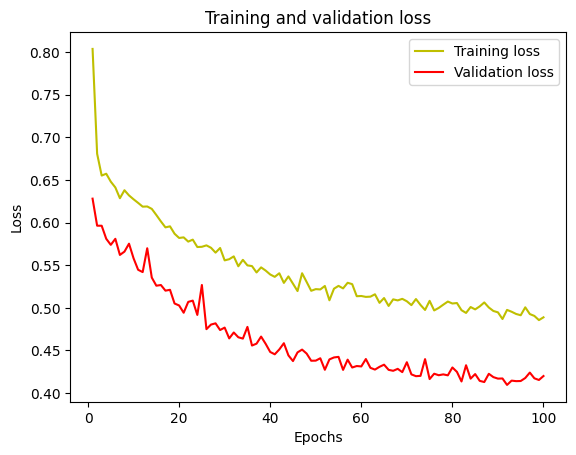

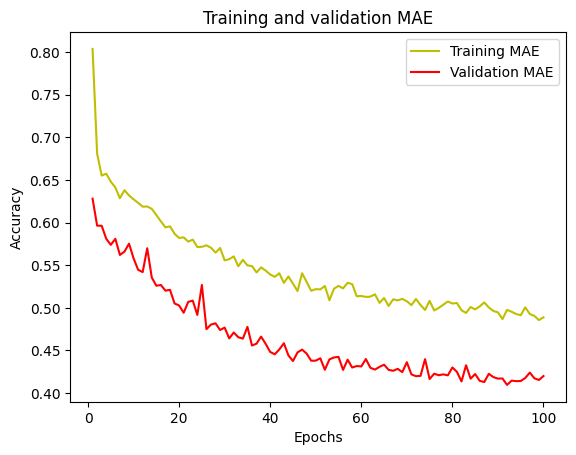

33/33 [==============================] - 0s 1ms/step
Predicted values are:  [[11.172975   7.3283477 18.224388   1.7639037 41.22966  ]
 [12.7369795  9.247003  28.26585    2.6668596 20.526375 ]
 [17.107948  11.532305  12.175484   2.2058353 97.644226 ]
 ...
 [18.049398  12.636602  22.20606    2.5981808 30.713242 ]
 [19.232197  14.503891  32.236633   3.2868054  6.362872 ]
 [21.006208  15.509113  41.683765   3.8839896  2.0522604]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2022-09-26 18:00:00+02:00   7.0    6.0               43.0             2.0  \
2022-11-19 22:00:00+02:00  13.0   11.0               39.0             2.0   
2022-07-07 04:00:00+02:00  15.0   10.0               15.0             2.0   
2022-12-02 14:00:00+02:00  23.0   19.0               38.0             4.0   
2022-08-20 12:00:00+02:00   6.0    3.0               14.0             3.0   
...          

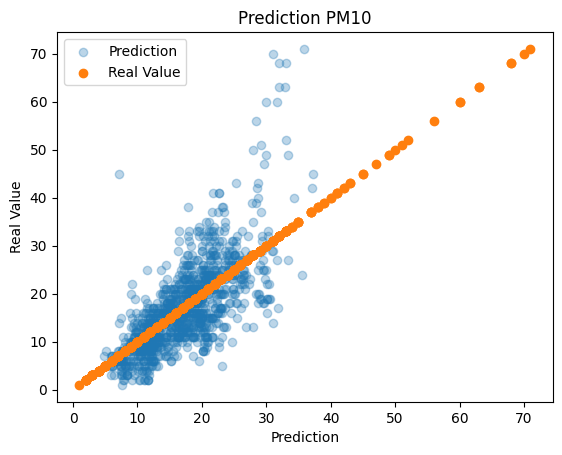

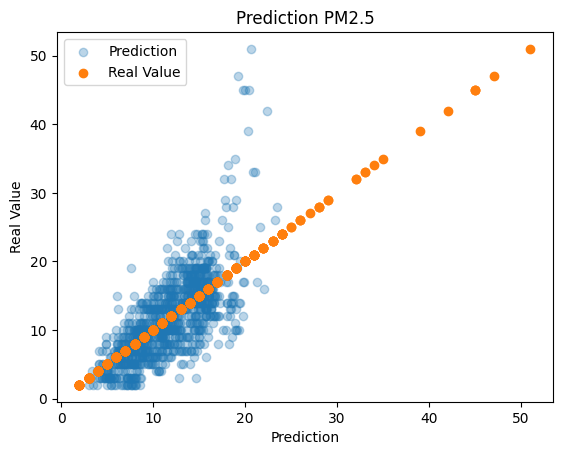

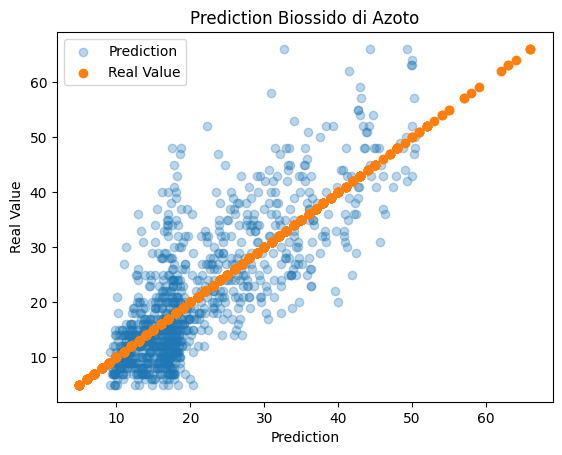

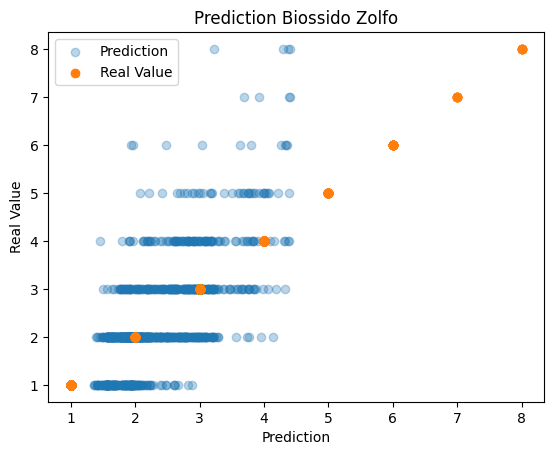

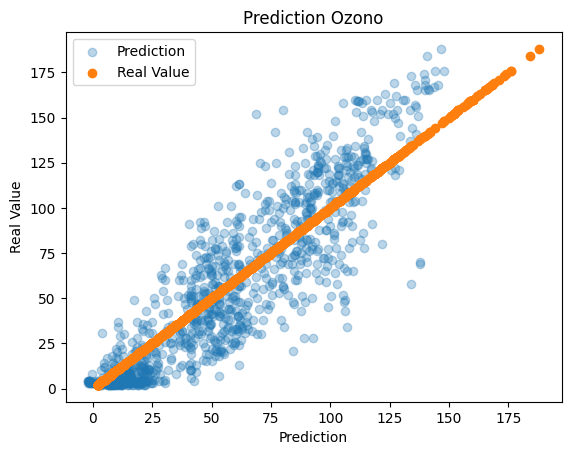

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                512       
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_41 (Dense)            (None, 128)               8320      
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                8256      
                                                                 
 dropout_34 (Dropout)        (None, 64)                0         
                                                                 
 dense_43 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 7ms/step - loss: 0.7586 - mean_squared_error: 0.7586 - val_loss: 0.6543 - val_mean_squared_error: 0.6543
Epoch 2/100
151/176 [========================>.....] - ETA: 0s - loss: 0.6932 - mean_squared_error: 0.6932
Epoch 2: val_loss improved from 0.65432 to 0.61303, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.6870 - mean_squared_error: 0.6870 - val_loss: 0.6130 - val_mean_squared_error: 0.6130
Epoch 3/100
165/176 [===========================>..] - ETA: 0s - loss: 0.6746 - mean_squared_error: 0.6746
Epoch 3: val_loss improved from 0.61303 to 0.58943, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.6697 - mean_squared_error: 0.6697 - val_loss: 0.5894 - val_mean_squared_error: 0.5894
Epoch 4/100
174/176 [============================>.] - ETA: 0s - loss: 0.6512 - mean_squared_error: 0.6512
Epoch 4: val_loss improved from 0.58943 to 0.57332, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.6526 - mean_squared_error: 0.6526 - val_loss: 0.5733 - val_mean_squared_error: 0.5733
Epoch 5/100
145/176 [=======================>......] - ETA: 0s - loss: 0.6359 - mean_squared_error: 0.6359
Epoch 5: val_loss improved from 0.57332 to 0.55310, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 8ms/step - loss: 0.6316 - mean_squared_error: 0.6316 - val_loss: 0.5531 - val_mean_squared_error: 0.5531
Epoch 6/100
173/176 [============================>.] - ETA: 0s - loss: 0.6223 - mean_squared_error: 0.6223
Epoch 6: val_loss improved from 0.55310 to 0.53933, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 8ms/step - loss: 0.6228 - mean_squared_error: 0.6228 - val_loss: 0.5393 - val_mean_squared_error: 0.5393
Epoch 7/100
158/176 [=========================>....] - ETA: 0s - loss: 0.6097 - mean_squared_error: 0.6097
Epoch 7: val_loss improved from 0.53933 to 0.53020, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.6146 - mean_squared_error: 0.6146 - val_loss: 0.5302 - val_mean_squared_error: 0.5302
Epoch 8/100
156/176 [=========================>....] - ETA: 0s - loss: 0.5953 - mean_squared_error: 0.5953
Epoch 8: val_loss improved from 0.53020 to 0.51363, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5980 - mean_squared_error: 0.5980 - val_loss: 0.5136 - val_mean_squared_error: 0.5136
Epoch 9/100
154/176 [=========================>....] - ETA: 0s - loss: 0.5912 - mean_squared_error: 0.5912
Epoch 9: val_loss improved from 0.51363 to 0.50761, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5874 - mean_squared_error: 0.5874 - val_loss: 0.5076 - val_mean_squared_error: 0.5076
Epoch 10/100
174/176 [============================>.] - ETA: 0s - loss: 0.5822 - mean_squared_error: 0.5822
Epoch 10: val_loss did not improve from 0.50761
176/176 [==============================] - 0s 2ms/step - loss: 0.5820 - mean_squared_error: 0.5820 - val_loss: 0.5125 - val_mean_squared_error: 0.5125
Epoch 11/100
151/176 [========================>.....] - ETA: 0s - loss: 0.5710 - mean_squared_error: 0.5710
Epoch 11: val_loss improved from 0.50761 to 0.49214, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5735 - mean_squared_error: 0.5735 - val_loss: 0.4921 - val_mean_squared_error: 0.4921
Epoch 12/100
156/176 [=========================>....] - ETA: 0s - loss: 0.5677 - mean_squared_error: 0.5677
Epoch 12: val_loss improved from 0.49214 to 0.48256, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5634 - mean_squared_error: 0.5634 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 13/100
174/176 [============================>.] - ETA: 0s - loss: 0.5649 - mean_squared_error: 0.5649
Epoch 13: val_loss did not improve from 0.48256
176/176 [==============================] - 0s 2ms/step - loss: 0.5698 - mean_squared_error: 0.5698 - val_loss: 0.4958 - val_mean_squared_error: 0.4958
Epoch 14/100
153/176 [=========================>....] - ETA: 0s - loss: 0.5616 - mean_squared_error: 0.5616
Epoch 14: val_loss improved from 0.48256 to 0.47845, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5552 - mean_squared_error: 0.5552 - val_loss: 0.4785 - val_mean_squared_error: 0.4785
Epoch 15/100
147/176 [========================>.....] - ETA: 0s - loss: 0.5452 - mean_squared_error: 0.5452
Epoch 15: val_loss did not improve from 0.47845
176/176 [==============================] - 0s 2ms/step - loss: 0.5515 - mean_squared_error: 0.5515 - val_loss: 0.4832 - val_mean_squared_error: 0.4832
Epoch 16/100
152/176 [========================>.....] - ETA: 0s - loss: 0.5467 - mean_squared_error: 0.5467
Epoch 16: val_loss improved from 0.47845 to 0.47838, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5475 - mean_squared_error: 0.5475 - val_loss: 0.4784 - val_mean_squared_error: 0.4784
Epoch 17/100
156/176 [=========================>....] - ETA: 0s - loss: 0.5442 - mean_squared_error: 0.5442
Epoch 17: val_loss did not improve from 0.47838
176/176 [==============================] - 0s 2ms/step - loss: 0.5371 - mean_squared_error: 0.5371 - val_loss: 0.4794 - val_mean_squared_error: 0.4794
Epoch 18/100
158/176 [=========================>....] - ETA: 0s - loss: 0.5283 - mean_squared_error: 0.5283
Epoch 18: val_loss improved from 0.47838 to 0.47077, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5344 - mean_squared_error: 0.5344 - val_loss: 0.4708 - val_mean_squared_error: 0.4708
Epoch 19/100
173/176 [============================>.] - ETA: 0s - loss: 0.5405 - mean_squared_error: 0.5405
Epoch 19: val_loss improved from 0.47077 to 0.46552, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5396 - mean_squared_error: 0.5396 - val_loss: 0.4655 - val_mean_squared_error: 0.4655
Epoch 20/100
166/176 [===========================>..] - ETA: 0s - loss: 0.5324 - mean_squared_error: 0.5324
Epoch 20: val_loss improved from 0.46552 to 0.45809, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5298 - mean_squared_error: 0.5298 - val_loss: 0.4581 - val_mean_squared_error: 0.4581
Epoch 21/100
169/176 [===========================>..] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 21: val_loss improved from 0.45809 to 0.45776, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5282 - mean_squared_error: 0.5282 - val_loss: 0.4578 - val_mean_squared_error: 0.4578
Epoch 22/100
174/176 [============================>.] - ETA: 0s - loss: 0.5331 - mean_squared_error: 0.5331
Epoch 22: val_loss did not improve from 0.45776
176/176 [==============================] - 0s 2ms/step - loss: 0.5326 - mean_squared_error: 0.5326 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 23/100
157/176 [=========================>....] - ETA: 0s - loss: 0.5248 - mean_squared_error: 0.5248
Epoch 23: val_loss improved from 0.45776 to 0.45762, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5266 - mean_squared_error: 0.5266 - val_loss: 0.4576 - val_mean_squared_error: 0.4576
Epoch 24/100
175/176 [============================>.] - ETA: 0s - loss: 0.5165 - mean_squared_error: 0.5165
Epoch 24: val_loss improved from 0.45762 to 0.45443, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5165 - mean_squared_error: 0.5165 - val_loss: 0.4544 - val_mean_squared_error: 0.4544
Epoch 25/100
155/176 [=========================>....] - ETA: 0s - loss: 0.5213 - mean_squared_error: 0.5213
Epoch 25: val_loss improved from 0.45443 to 0.45198, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 8ms/step - loss: 0.5204 - mean_squared_error: 0.5204 - val_loss: 0.4520 - val_mean_squared_error: 0.4520
Epoch 26/100
145/176 [=======================>......] - ETA: 0s - loss: 0.5170 - mean_squared_error: 0.5170
Epoch 26: val_loss did not improve from 0.45198
176/176 [==============================] - 0s 2ms/step - loss: 0.5207 - mean_squared_error: 0.5207 - val_loss: 0.4572 - val_mean_squared_error: 0.4572
Epoch 27/100
153/176 [=========================>....] - ETA: 0s - loss: 0.5212 - mean_squared_error: 0.5212
Epoch 27: val_loss did not improve from 0.45198
176/176 [==============================] - 0s 2ms/step - loss: 0.5236 - mean_squared_error: 0.5236 - val_loss: 0.4672 - val_mean_squared_error: 0.4672
Epoch 28/100
176/176 [==============================] - ETA: 0s - loss: 0.5126 - mean_squared_error: 0.5126
Epoch 28: val_loss did not improve from 0.45198
176/176 [==============================] - 0s 2ms/step - loss: 0.5126 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5123 - mean_squared_error: 0.5123 - val_loss: 0.4501 - val_mean_squared_error: 0.4501
Epoch 30/100
144/176 [=======================>......] - ETA: 0s - loss: 0.5060 - mean_squared_error: 0.5060
Epoch 30: val_loss did not improve from 0.45010
176/176 [==============================] - 0s 2ms/step - loss: 0.5114 - mean_squared_error: 0.5114 - val_loss: 0.4569 - val_mean_squared_error: 0.4569
Epoch 31/100
164/176 [==========================>...] - ETA: 0s - loss: 0.5109 - mean_squared_error: 0.5109
Epoch 31: val_loss improved from 0.45010 to 0.44417, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5098 - mean_squared_error: 0.5098 - val_loss: 0.4442 - val_mean_squared_error: 0.4442
Epoch 32/100
164/176 [==========================>...] - ETA: 0s - loss: 0.5023 - mean_squared_error: 0.5023
Epoch 32: val_loss did not improve from 0.44417
176/176 [==============================] - 0s 2ms/step - loss: 0.5011 - mean_squared_error: 0.5011 - val_loss: 0.4497 - val_mean_squared_error: 0.4497
Epoch 33/100
165/176 [===========================>..] - ETA: 0s - loss: 0.5116 - mean_squared_error: 0.5116
Epoch 33: val_loss did not improve from 0.44417
176/176 [==============================] - 0s 2ms/step - loss: 0.5083 - mean_squared_error: 0.5083 - val_loss: 0.4490 - val_mean_squared_error: 0.4490
Epoch 34/100
172/176 [============================>.] - ETA: 0s - loss: 0.5040 - mean_squared_error: 0.5040
Epoch 34: val_loss improved from 0.44417 to 0.43577, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 4s 22ms/step - loss: 0.5039 - mean_squared_error: 0.5039 - val_loss: 0.4358 - val_mean_squared_error: 0.4358
Epoch 35/100
157/176 [=========================>....] - ETA: 0s - loss: 0.5026 - mean_squared_error: 0.5026
Epoch 35: val_loss did not improve from 0.43577
176/176 [==============================] - 0s 2ms/step - loss: 0.5049 - mean_squared_error: 0.5049 - val_loss: 0.4513 - val_mean_squared_error: 0.4513
Epoch 36/100
151/176 [========================>.....] - ETA: 0s - loss: 0.5086 - mean_squared_error: 0.5086
Epoch 36: val_loss did not improve from 0.43577
176/176 [==============================] - 0s 2ms/step - loss: 0.5049 - mean_squared_error: 0.5049 - val_loss: 0.4364 - val_mean_squared_error: 0.4364
Epoch 37/100
169/176 [===========================>..] - ETA: 0s - loss: 0.5042 - mean_squared_error: 0.5042
Epoch 37: val_loss did not improve from 0.43577
176/176 [==============================] - 0s 2ms/step - loss: 0.5057 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 1s 7ms/step - loss: 0.5025 - mean_squared_error: 0.5025 - val_loss: 0.4352 - val_mean_squared_error: 0.4352
Epoch 43/100
168/176 [===========================>..] - ETA: 0s - loss: 0.5000 - mean_squared_error: 0.5000
Epoch 43: val_loss improved from 0.43518 to 0.43042, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.5005 - mean_squared_error: 0.5005 - val_loss: 0.4304 - val_mean_squared_error: 0.4304
Epoch 44/100
164/176 [==========================>...] - ETA: 0s - loss: 0.5016 - mean_squared_error: 0.5016
Epoch 44: val_loss did not improve from 0.43042
176/176 [==============================] - 0s 3ms/step - loss: 0.5016 - mean_squared_error: 0.5016 - val_loss: 0.4458 - val_mean_squared_error: 0.4458
Epoch 45/100
161/176 [==========================>...] - ETA: 0s - loss: 0.4937 - mean_squared_error: 0.4937
Epoch 45: val_loss did not improve from 0.43042
176/176 [==============================] - 0s 3ms/step - loss: 0.4946 - mean_squared_error: 0.4946 - val_loss: 0.4401 - val_mean_squared_error: 0.4401
Epoch 46/100
164/176 [==========================>...] - ETA: 0s - loss: 0.4912 - mean_squared_error: 0.4912
Epoch 46: val_loss did not improve from 0.43042
176/176 [==============================] - 1s 3ms/step - loss: 0.4923 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.4922 - mean_squared_error: 0.4922 - val_loss: 0.4251 - val_mean_squared_error: 0.4251
Epoch 49/100
173/176 [============================>.] - ETA: 0s - loss: 0.4906 - mean_squared_error: 0.4906
Epoch 49: val_loss did not improve from 0.42508
176/176 [==============================] - 0s 3ms/step - loss: 0.4898 - mean_squared_error: 0.4898 - val_loss: 0.4359 - val_mean_squared_error: 0.4359
Epoch 50/100
164/176 [==========================>...] - ETA: 0s - loss: 0.4852 - mean_squared_error: 0.4852
Epoch 50: val_loss improved from 0.42508 to 0.42361, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4893 - mean_squared_error: 0.4893 - val_loss: 0.4236 - val_mean_squared_error: 0.4236
Epoch 51/100
155/176 [=========================>....] - ETA: 0s - loss: 0.4935 - mean_squared_error: 0.4935
Epoch 51: val_loss did not improve from 0.42361
176/176 [==============================] - 1s 3ms/step - loss: 0.4951 - mean_squared_error: 0.4951 - val_loss: 0.4298 - val_mean_squared_error: 0.4298
Epoch 52/100
155/176 [=========================>....] - ETA: 0s - loss: 0.4904 - mean_squared_error: 0.4904
Epoch 52: val_loss did not improve from 0.42361
176/176 [==============================] - 0s 3ms/step - loss: 0.4947 - mean_squared_error: 0.4947 - val_loss: 0.4271 - val_mean_squared_error: 0.4271
Epoch 53/100
159/176 [==========================>...] - ETA: 0s - loss: 0.4812 - mean_squared_error: 0.4812
Epoch 53: val_loss did not improve from 0.42361
176/176 [==============================] - 0s 3ms/step - loss: 0.4876 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4972 - mean_squared_error: 0.4972 - val_loss: 0.4206 - val_mean_squared_error: 0.4206
Epoch 59/100
153/176 [=========================>....] - ETA: 0s - loss: 0.4840 - mean_squared_error: 0.4840
Epoch 59: val_loss did not improve from 0.42064
176/176 [==============================] - 0s 3ms/step - loss: 0.4832 - mean_squared_error: 0.4832 - val_loss: 0.4216 - val_mean_squared_error: 0.4216
Epoch 60/100
175/176 [============================>.] - ETA: 0s - loss: 0.4889 - mean_squared_error: 0.4889
Epoch 60: val_loss improved from 0.42064 to 0.41647, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4898 - mean_squared_error: 0.4898 - val_loss: 0.4165 - val_mean_squared_error: 0.4165
Epoch 61/100
159/176 [==========================>...] - ETA: 0s - loss: 0.4773 - mean_squared_error: 0.4773
Epoch 61: val_loss did not improve from 0.41647
176/176 [==============================] - 0s 3ms/step - loss: 0.4852 - mean_squared_error: 0.4852 - val_loss: 0.4327 - val_mean_squared_error: 0.4327
Epoch 62/100
157/176 [=========================>....] - ETA: 0s - loss: 0.4875 - mean_squared_error: 0.4875
Epoch 62: val_loss did not improve from 0.41647
176/176 [==============================] - 0s 3ms/step - loss: 0.4832 - mean_squared_error: 0.4832 - val_loss: 0.4336 - val_mean_squared_error: 0.4336
Epoch 63/100
160/176 [==========================>...] - ETA: 0s - loss: 0.4766 - mean_squared_error: 0.4766
Epoch 63: val_loss did not improve from 0.41647
176/176 [==============================] - 0s 3ms/step - loss: 0.4778 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4733 - mean_squared_error: 0.4733 - val_loss: 0.4116 - val_mean_squared_error: 0.4116
Epoch 76/100
154/176 [=========================>....] - ETA: 0s - loss: 0.4712 - mean_squared_error: 0.4712
Epoch 76: val_loss did not improve from 0.41155
176/176 [==============================] - 0s 3ms/step - loss: 0.4663 - mean_squared_error: 0.4663 - val_loss: 0.4329 - val_mean_squared_error: 0.4329
Epoch 77/100
174/176 [============================>.] - ETA: 0s - loss: 0.4809 - mean_squared_error: 0.4809
Epoch 77: val_loss improved from 0.41155 to 0.40514, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4811 - mean_squared_error: 0.4811 - val_loss: 0.4051 - val_mean_squared_error: 0.4051
Epoch 78/100
175/176 [============================>.] - ETA: 0s - loss: 0.4705 - mean_squared_error: 0.4705
Epoch 78: val_loss did not improve from 0.40514
176/176 [==============================] - 1s 3ms/step - loss: 0.4701 - mean_squared_error: 0.4701 - val_loss: 0.4114 - val_mean_squared_error: 0.4114
Epoch 79/100
158/176 [=========================>....] - ETA: 0s - loss: 0.4664 - mean_squared_error: 0.4664
Epoch 79: val_loss did not improve from 0.40514
176/176 [==============================] - 0s 3ms/step - loss: 0.4711 - mean_squared_error: 0.4711 - val_loss: 0.4112 - val_mean_squared_error: 0.4112
Epoch 80/100
165/176 [===========================>..] - ETA: 0s - loss: 0.4615 - mean_squared_error: 0.4615
Epoch 80: val_loss improved from 0.40514 to 0.40479, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.4660 - mean_squared_error: 0.4660 - val_loss: 0.4048 - val_mean_squared_error: 0.4048
Epoch 81/100
155/176 [=========================>....] - ETA: 0s - loss: 0.4810 - mean_squared_error: 0.4810
Epoch 81: val_loss did not improve from 0.40479
176/176 [==============================] - 0s 3ms/step - loss: 0.4789 - mean_squared_error: 0.4789 - val_loss: 0.4144 - val_mean_squared_error: 0.4144
Epoch 82/100
176/176 [==============================] - ETA: 0s - loss: 0.4753 - mean_squared_error: 0.4753
Epoch 82: val_loss did not improve from 0.40479
176/176 [==============================] - 0s 3ms/step - loss: 0.4753 - mean_squared_error: 0.4753 - val_loss: 0.4156 - val_mean_squared_error: 0.4156
Epoch 83/100
152/176 [========================>.....] - ETA: 0s - loss: 0.4622 - mean_squared_error: 0.4622
Epoch 83: val_loss did not improve from 0.40479
176/176 [==============================] - 0s 2ms/step - loss: 0.4671 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.4678 - mean_squared_error: 0.4678 - val_loss: 0.4030 - val_mean_squared_error: 0.4030
Epoch 90/100
165/176 [===========================>..] - ETA: 0s - loss: 0.4724 - mean_squared_error: 0.4724
Epoch 90: val_loss did not improve from 0.40300
176/176 [==============================] - 1s 3ms/step - loss: 0.4706 - mean_squared_error: 0.4706 - val_loss: 0.4052 - val_mean_squared_error: 0.4052
Epoch 91/100
161/176 [==========================>...] - ETA: 0s - loss: 0.4700 - mean_squared_error: 0.4700
Epoch 91: val_loss did not improve from 0.40300
176/176 [==============================] - 0s 3ms/step - loss: 0.4665 - mean_squared_error: 0.4665 - val_loss: 0.4041 - val_mean_squared_error: 0.4041
Epoch 92/100
173/176 [============================>.] - ETA: 0s - loss: 0.4697 - mean_squared_error: 0.4697
Epoch 92: val_loss did not improve from 0.40300
176/176 [==============================] - 0s 3ms/step - loss: 0.4683 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.4708 - mean_squared_error: 0.4708 - val_loss: 0.4026 - val_mean_squared_error: 0.4026
Epoch 94/100
170/176 [===========================>..] - ETA: 0s - loss: 0.4688 - mean_squared_error: 0.4688
Epoch 94: val_loss improved from 0.40261 to 0.40216, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4680 - mean_squared_error: 0.4680 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 95/100
169/176 [===========================>..] - ETA: 0s - loss: 0.4770 - mean_squared_error: 0.4770
Epoch 95: val_loss improved from 0.40216 to 0.39926, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 10ms/step - loss: 0.4745 - mean_squared_error: 0.4745 - val_loss: 0.3993 - val_mean_squared_error: 0.3993
Epoch 96/100
171/176 [============================>.] - ETA: 0s - loss: 0.4729 - mean_squared_error: 0.4729
Epoch 96: val_loss did not improve from 0.39926
176/176 [==============================] - 1s 3ms/step - loss: 0.4719 - mean_squared_error: 0.4719 - val_loss: 0.4127 - val_mean_squared_error: 0.4127
Epoch 97/100
171/176 [============================>.] - ETA: 0s - loss: 0.4678 - mean_squared_error: 0.4678
Epoch 97: val_loss did not improve from 0.39926
176/176 [==============================] - 0s 3ms/step - loss: 0.4669 - mean_squared_error: 0.4669 - val_loss: 0.4140 - val_mean_squared_error: 0.4140
Epoch 98/100
166/176 [===========================>..] - ETA: 0s - loss: 0.4891 - mean_squared_error: 0.4891
Epoch 98: val_loss did not improve from 0.39926
176/176 [==============================] - 0s 3ms/step - loss: 0.4823 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.4671 - mean_squared_error: 0.4671 - val_loss: 0.3969 - val_mean_squared_error: 0.3969


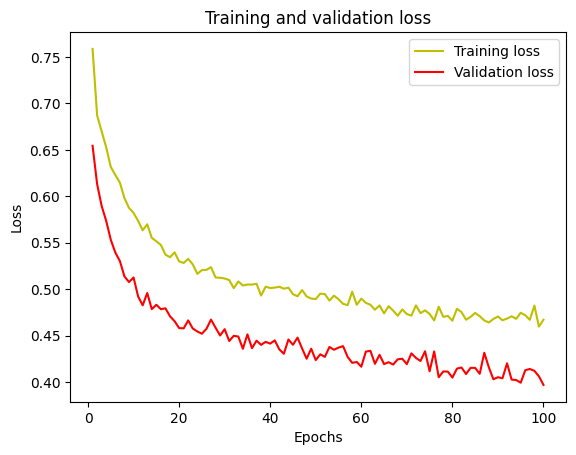

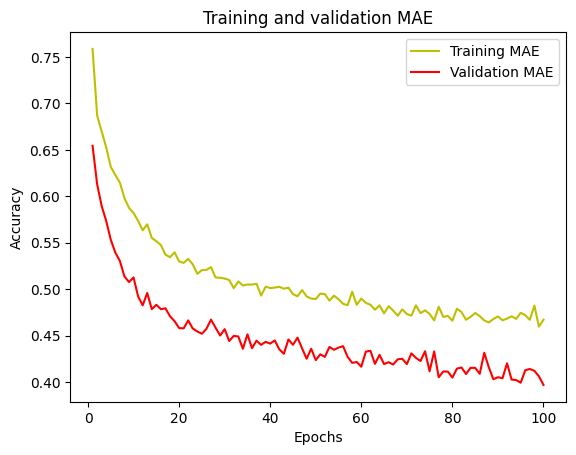

95/95 [==============================] - 0s 1ms/step
Predicted values are:  [[16.184155  11.057355  13.046705   1.5979407 91.328    ]
 [10.819404   7.0271707 13.882258   1.2181432 72.463196 ]
 [22.615612  16.839407  37.737934   2.3602083 27.423409 ]
 ...
 [17.136335  11.620557  12.567784   1.4966611 93.4041   ]
 [21.448898  15.997286  25.71875    1.3922719 52.39584  ]
 [11.71581    8.17309   21.87895    1.5055939 46.51339  ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2022-07-26 23:00:00+02:00  21.0   11.0               11.0             2.0  \
2023-05-02 00:00:00+02:00  15.0    9.0               11.0             1.0   
2023-02-09 18:00:00+02:00  26.0   20.0               56.0             2.0   
2022-04-27 03:00:00+02:00   6.0    3.0               12.0             1.0   
2023-04-01 01:00:00+02:00  18.0   13.0               21.0             1.0   
...          

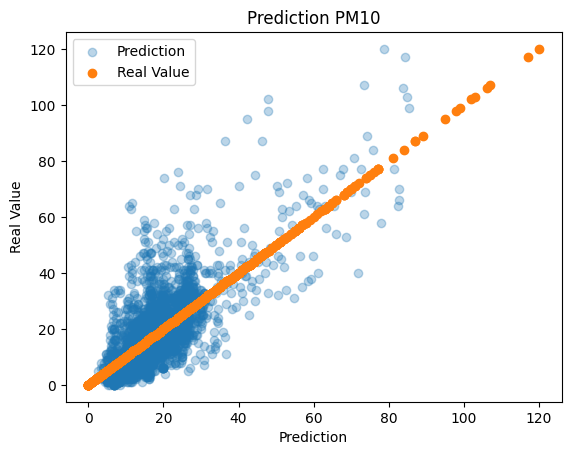

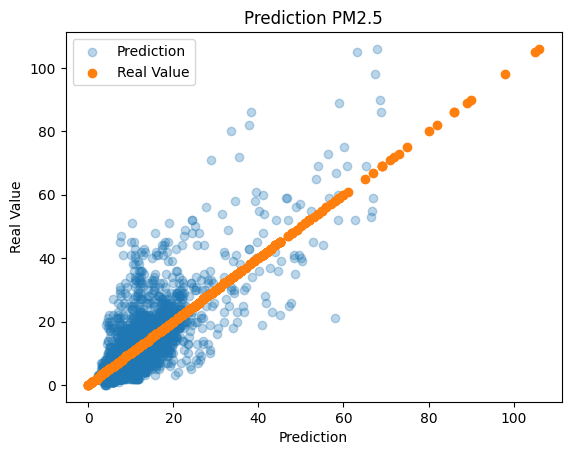

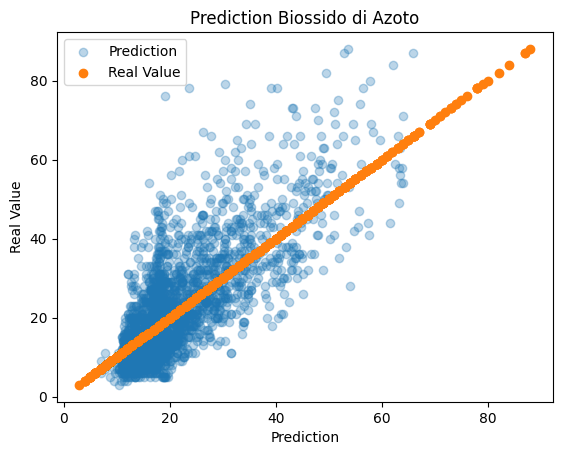

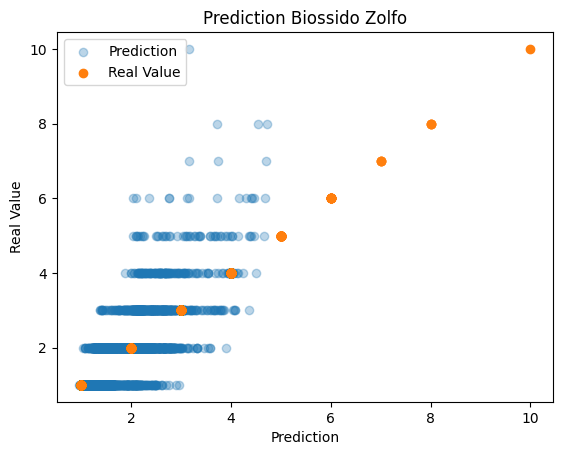

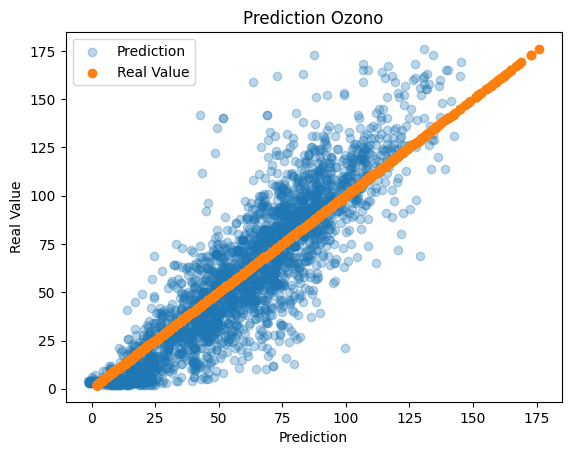

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                512       
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 128)               8320      
                                                                 
 dropout_37 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 64)                8256      
                                                                 
 dropout_38 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 3s 24ms/step - loss: 0.8255 - mean_squared_error: 0.8255 - val_loss: 0.6573 - val_mean_squared_error: 0.6573
Epoch 2/100
61/69 [=========================>....] - ETA: 0s - loss: 0.6278 - mean_squared_error: 0.6278
Epoch 2: val_loss improved from 0.65732 to 0.55202, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 24ms/step - loss: 0.6269 - mean_squared_error: 0.6269 - val_loss: 0.5520 - val_mean_squared_error: 0.5520
Epoch 3/100
50/69 [====================>.........] - ETA: 0s - loss: 0.5722 - mean_squared_error: 0.5722
Epoch 3: val_loss improved from 0.55202 to 0.54382, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.5881 - mean_squared_error: 0.5881 - val_loss: 0.5438 - val_mean_squared_error: 0.5438
Epoch 4/100
44/69 [==================>...........] - ETA: 0s - loss: 0.5513 - mean_squared_error: 0.5513
Epoch 4: val_loss improved from 0.54382 to 0.52684, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 20ms/step - loss: 0.5679 - mean_squared_error: 0.5679 - val_loss: 0.5268 - val_mean_squared_error: 0.5268
Epoch 5/100
59/69 [========================>.....] - ETA: 0s - loss: 0.5655 - mean_squared_error: 0.5655
Epoch 5: val_loss improved from 0.52684 to 0.50890, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.5626 - mean_squared_error: 0.5626 - val_loss: 0.5089 - val_mean_squared_error: 0.5089
Epoch 6/100
65/69 [===========================>..] - ETA: 0s - loss: 0.5497 - mean_squared_error: 0.5497
Epoch 6: val_loss improved from 0.50890 to 0.50156, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 22ms/step - loss: 0.5517 - mean_squared_error: 0.5517 - val_loss: 0.5016 - val_mean_squared_error: 0.5016
Epoch 7/100
62/69 [=========================>....] - ETA: 0s - loss: 0.5326 - mean_squared_error: 0.5326
Epoch 7: val_loss improved from 0.50156 to 0.49349, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 22ms/step - loss: 0.5356 - mean_squared_error: 0.5356 - val_loss: 0.4935 - val_mean_squared_error: 0.4935
Epoch 8/100
55/69 [======================>.......] - ETA: 0s - loss: 0.5330 - mean_squared_error: 0.5330
Epoch 8: val_loss improved from 0.49349 to 0.47156, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 26ms/step - loss: 0.5252 - mean_squared_error: 0.5252 - val_loss: 0.4716 - val_mean_squared_error: 0.4716
Epoch 9/100
65/69 [===========================>..] - ETA: 0s - loss: 0.5181 - mean_squared_error: 0.5181
Epoch 9: val_loss improved from 0.47156 to 0.45752, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.5222 - mean_squared_error: 0.5222 - val_loss: 0.4575 - val_mean_squared_error: 0.4575
Epoch 10/100
60/69 [=========================>....] - ETA: 0s - loss: 0.5196 - mean_squared_error: 0.5196
Epoch 10: val_loss improved from 0.45752 to 0.45560, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 25ms/step - loss: 0.5231 - mean_squared_error: 0.5231 - val_loss: 0.4556 - val_mean_squared_error: 0.4556
Epoch 11/100
53/69 [======================>.......] - ETA: 0s - loss: 0.5077 - mean_squared_error: 0.5077
Epoch 11: val_loss did not improve from 0.45560
69/69 [==============================] - 0s 4ms/step - loss: 0.5174 - mean_squared_error: 0.5174 - val_loss: 0.4578 - val_mean_squared_error: 0.4578
Epoch 12/100
50/69 [====================>.........] - ETA: 0s - loss: 0.5058 - mean_squared_error: 0.5058
Epoch 12: val_loss improved from 0.45560 to 0.44940, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 26ms/step - loss: 0.5134 - mean_squared_error: 0.5134 - val_loss: 0.4494 - val_mean_squared_error: 0.4494
Epoch 13/100
54/69 [======================>.......] - ETA: 0s - loss: 0.5149 - mean_squared_error: 0.5149
Epoch 13: val_loss improved from 0.44940 to 0.44794, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 26ms/step - loss: 0.5150 - mean_squared_error: 0.5150 - val_loss: 0.4479 - val_mean_squared_error: 0.4479
Epoch 14/100
63/69 [==========================>...] - ETA: 0s - loss: 0.4910 - mean_squared_error: 0.4910
Epoch 14: val_loss improved from 0.44794 to 0.43208, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 22ms/step - loss: 0.5004 - mean_squared_error: 0.5004 - val_loss: 0.4321 - val_mean_squared_error: 0.4321
Epoch 15/100
67/69 [============================>.] - ETA: 0s - loss: 0.4922 - mean_squared_error: 0.4922
Epoch 15: val_loss did not improve from 0.43208
69/69 [==============================] - 0s 3ms/step - loss: 0.4947 - mean_squared_error: 0.4947 - val_loss: 0.4335 - val_mean_squared_error: 0.4335
Epoch 16/100
50/69 [====================>.........] - ETA: 0s - loss: 0.4881 - mean_squared_error: 0.4881
Epoch 16: val_loss did not improve from 0.43208
69/69 [==============================] - 0s 3ms/step - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4458 - val_mean_squared_error: 0.4458
Epoch 17/100
47/69 [===================>..........] - ETA: 0s - loss: 0.4953 - mean_squared_error: 0.4953
Epoch 17: val_loss did not improve from 0.43208
69/69 [==============================] - 0s 3ms/step - loss: 0.4965 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 22ms/step - loss: 0.4914 - mean_squared_error: 0.4914 - val_loss: 0.4225 - val_mean_squared_error: 0.4225
Epoch 19/100
52/69 [=====================>........] - ETA: 0s - loss: 0.4829 - mean_squared_error: 0.4829
Epoch 19: val_loss did not improve from 0.42252
69/69 [==============================] - 0s 4ms/step - loss: 0.4894 - mean_squared_error: 0.4894 - val_loss: 0.4416 - val_mean_squared_error: 0.4416
Epoch 20/100
49/69 [====================>.........] - ETA: 0s - loss: 0.4829 - mean_squared_error: 0.4829
Epoch 20: val_loss did not improve from 0.42252
69/69 [==============================] - 0s 4ms/step - loss: 0.4968 - mean_squared_error: 0.4968 - val_loss: 0.4283 - val_mean_squared_error: 0.4283
Epoch 21/100
62/69 [=========================>....] - ETA: 0s - loss: 0.4833 - mean_squared_error: 0.4833
Epoch 21: val_loss did not improve from 0.42252
69/69 [==============================] - 0s 4ms/step - loss: 0.4904 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.4828 - mean_squared_error: 0.4828 - val_loss: 0.4168 - val_mean_squared_error: 0.4168
Epoch 24/100
62/69 [=========================>....] - ETA: 0s - loss: 0.4911 - mean_squared_error: 0.4911
Epoch 24: val_loss did not improve from 0.41685
69/69 [==============================] - 0s 3ms/step - loss: 0.4931 - mean_squared_error: 0.4931 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 25/100
52/69 [=====================>........] - ETA: 0s - loss: 0.4932 - mean_squared_error: 0.4932
Epoch 25: val_loss did not improve from 0.41685
69/69 [==============================] - 0s 3ms/step - loss: 0.4854 - mean_squared_error: 0.4854 - val_loss: 0.4265 - val_mean_squared_error: 0.4265
Epoch 26/100
53/69 [======================>.......] - ETA: 0s - loss: 0.4902 - mean_squared_error: 0.4902
Epoch 26: val_loss did not improve from 0.41685
69/69 [==============================] - 0s 3ms/step - loss: 0.4889 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.4717 - mean_squared_error: 0.4717 - val_loss: 0.4158 - val_mean_squared_error: 0.4158
Epoch 29/100
52/69 [=====================>........] - ETA: 0s - loss: 0.4865 - mean_squared_error: 0.4865
Epoch 29: val_loss improved from 0.41576 to 0.41129, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 22ms/step - loss: 0.4876 - mean_squared_error: 0.4876 - val_loss: 0.4113 - val_mean_squared_error: 0.4113
Epoch 30/100
52/69 [=====================>........] - ETA: 0s - loss: 0.4974 - mean_squared_error: 0.4974
Epoch 30: val_loss did not improve from 0.41129
69/69 [==============================] - 0s 4ms/step - loss: 0.4805 - mean_squared_error: 0.4805 - val_loss: 0.4190 - val_mean_squared_error: 0.4190
Epoch 31/100
61/69 [=========================>....] - ETA: 0s - loss: 0.4761 - mean_squared_error: 0.4761
Epoch 31: val_loss improved from 0.41129 to 0.40610, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 22ms/step - loss: 0.4747 - mean_squared_error: 0.4747 - val_loss: 0.4061 - val_mean_squared_error: 0.4061
Epoch 32/100
49/69 [====================>.........] - ETA: 0s - loss: 0.4664 - mean_squared_error: 0.4664
Epoch 32: val_loss did not improve from 0.40610
69/69 [==============================] - 0s 4ms/step - loss: 0.4757 - mean_squared_error: 0.4757 - val_loss: 0.4112 - val_mean_squared_error: 0.4112
Epoch 33/100
46/69 [===================>..........] - ETA: 0s - loss: 0.4403 - mean_squared_error: 0.4403
Epoch 33: val_loss improved from 0.40610 to 0.39439, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 24ms/step - loss: 0.4674 - mean_squared_error: 0.4674 - val_loss: 0.3944 - val_mean_squared_error: 0.3944
Epoch 34/100
68/69 [============================>.] - ETA: 0s - loss: 0.4679 - mean_squared_error: 0.4679
Epoch 34: val_loss did not improve from 0.39439
69/69 [==============================] - 0s 4ms/step - loss: 0.4677 - mean_squared_error: 0.4677 - val_loss: 0.4083 - val_mean_squared_error: 0.4083
Epoch 35/100
69/69 [==============================] - ETA: 0s - loss: 0.4705 - mean_squared_error: 0.4705
Epoch 35: val_loss did not improve from 0.39439
69/69 [==============================] - 0s 3ms/step - loss: 0.4705 - mean_squared_error: 0.4705 - val_loss: 0.4243 - val_mean_squared_error: 0.4243
Epoch 36/100
59/69 [========================>.....] - ETA: 0s - loss: 0.4492 - mean_squared_error: 0.4492
Epoch 36: val_loss did not improve from 0.39439
69/69 [==============================] - 0s 4ms/step - loss: 0.4704 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.4672 - mean_squared_error: 0.4672 - val_loss: 0.3931 - val_mean_squared_error: 0.3931
Epoch 42/100
60/69 [=========================>....] - ETA: 0s - loss: 0.4613 - mean_squared_error: 0.4613
Epoch 42: val_loss did not improve from 0.39308
69/69 [==============================] - 0s 3ms/step - loss: 0.4580 - mean_squared_error: 0.4580 - val_loss: 0.4017 - val_mean_squared_error: 0.4017
Epoch 43/100
54/69 [======================>.......] - ETA: 0s - loss: 0.4691 - mean_squared_error: 0.4691
Epoch 43: val_loss improved from 0.39308 to 0.38696, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 20ms/step - loss: 0.4608 - mean_squared_error: 0.4608 - val_loss: 0.3870 - val_mean_squared_error: 0.3870
Epoch 44/100
58/69 [========================>.....] - ETA: 0s - loss: 0.4619 - mean_squared_error: 0.4619
Epoch 44: val_loss did not improve from 0.38696
69/69 [==============================] - 0s 4ms/step - loss: 0.4565 - mean_squared_error: 0.4565 - val_loss: 0.3933 - val_mean_squared_error: 0.3933
Epoch 45/100
64/69 [==========================>...] - ETA: 0s - loss: 0.4643 - mean_squared_error: 0.4643
Epoch 45: val_loss did not improve from 0.38696
69/69 [==============================] - 0s 3ms/step - loss: 0.4619 - mean_squared_error: 0.4619 - val_loss: 0.3941 - val_mean_squared_error: 0.3941
Epoch 46/100
69/69 [==============================] - ETA: 0s - loss: 0.4602 - mean_squared_error: 0.4602
Epoch 46: val_loss did not improve from 0.38696
69/69 [==============================] - 0s 3ms/step - loss: 0.4602 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 20ms/step - loss: 0.4455 - mean_squared_error: 0.4455 - val_loss: 0.3829 - val_mean_squared_error: 0.3829
Epoch 48/100
66/69 [===========================>..] - ETA: 0s - loss: 0.4454 - mean_squared_error: 0.4454
Epoch 48: val_loss did not improve from 0.38291
69/69 [==============================] - 0s 3ms/step - loss: 0.4504 - mean_squared_error: 0.4504 - val_loss: 0.3854 - val_mean_squared_error: 0.3854
Epoch 49/100
66/69 [===========================>..] - ETA: 0s - loss: 0.4528 - mean_squared_error: 0.4528
Epoch 49: val_loss did not improve from 0.38291
69/69 [==============================] - 0s 3ms/step - loss: 0.4512 - mean_squared_error: 0.4512 - val_loss: 0.4044 - val_mean_squared_error: 0.4044
Epoch 50/100
68/69 [============================>.] - ETA: 0s - loss: 0.4568 - mean_squared_error: 0.4568
Epoch 50: val_loss did not improve from 0.38291
69/69 [==============================] - 0s 3ms/step - loss: 0.4567 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 22ms/step - loss: 0.4373 - mean_squared_error: 0.4373 - val_loss: 0.3751 - val_mean_squared_error: 0.3751
Epoch 53/100
55/69 [======================>.......] - ETA: 0s - loss: 0.4594 - mean_squared_error: 0.4594
Epoch 53: val_loss did not improve from 0.37512
69/69 [==============================] - 0s 4ms/step - loss: 0.4547 - mean_squared_error: 0.4547 - val_loss: 0.3928 - val_mean_squared_error: 0.3928
Epoch 54/100
66/69 [===========================>..] - ETA: 0s - loss: 0.4605 - mean_squared_error: 0.4605
Epoch 54: val_loss did not improve from 0.37512
69/69 [==============================] - 0s 3ms/step - loss: 0.4580 - mean_squared_error: 0.4580 - val_loss: 0.3996 - val_mean_squared_error: 0.3996
Epoch 55/100
67/69 [============================>.] - ETA: 0s - loss: 0.4599 - mean_squared_error: 0.4599
Epoch 55: val_loss did not improve from 0.37512
69/69 [==============================] - 0s 3ms/step - loss: 0.4563 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.4428 - mean_squared_error: 0.4428 - val_loss: 0.3692 - val_mean_squared_error: 0.3692
Epoch 59/100
56/69 [=======================>......] - ETA: 0s - loss: 0.4564 - mean_squared_error: 0.4564
Epoch 59: val_loss did not improve from 0.36918
69/69 [==============================] - 0s 3ms/step - loss: 0.4507 - mean_squared_error: 0.4507 - val_loss: 0.3855 - val_mean_squared_error: 0.3855
Epoch 60/100
50/69 [====================>.........] - ETA: 0s - loss: 0.4515 - mean_squared_error: 0.4515
Epoch 60: val_loss did not improve from 0.36918
69/69 [==============================] - 0s 3ms/step - loss: 0.4487 - mean_squared_error: 0.4487 - val_loss: 0.3956 - val_mean_squared_error: 0.3956
Epoch 61/100
48/69 [===================>..........] - ETA: 0s - loss: 0.4434 - mean_squared_error: 0.4434
Epoch 61: val_loss did not improve from 0.36918
69/69 [==============================] - 0s 3ms/step - loss: 0.4438 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 22ms/step - loss: 0.4318 - mean_squared_error: 0.4318 - val_loss: 0.3532 - val_mean_squared_error: 0.3532
Epoch 81/100
55/69 [======================>.......] - ETA: 0s - loss: 0.4364 - mean_squared_error: 0.4364
Epoch 81: val_loss did not improve from 0.35323
69/69 [==============================] - 0s 4ms/step - loss: 0.4393 - mean_squared_error: 0.4393 - val_loss: 0.3691 - val_mean_squared_error: 0.3691
Epoch 82/100
51/69 [=====================>........] - ETA: 0s - loss: 0.4329 - mean_squared_error: 0.4329
Epoch 82: val_loss did not improve from 0.35323
69/69 [==============================] - 0s 3ms/step - loss: 0.4294 - mean_squared_error: 0.4294 - val_loss: 0.3790 - val_mean_squared_error: 0.3790
Epoch 83/100
47/69 [===================>..........] - ETA: 0s - loss: 0.4175 - mean_squared_error: 0.4175
Epoch 83: val_loss did not improve from 0.35323
69/69 [==============================] - 0s 3ms/step - loss: 0.4213 - mean_squared_error: 

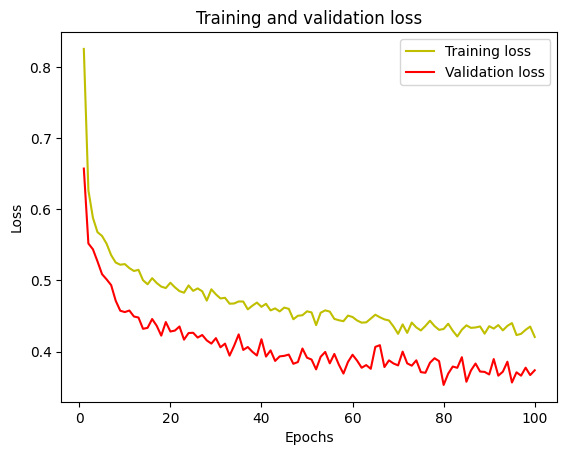

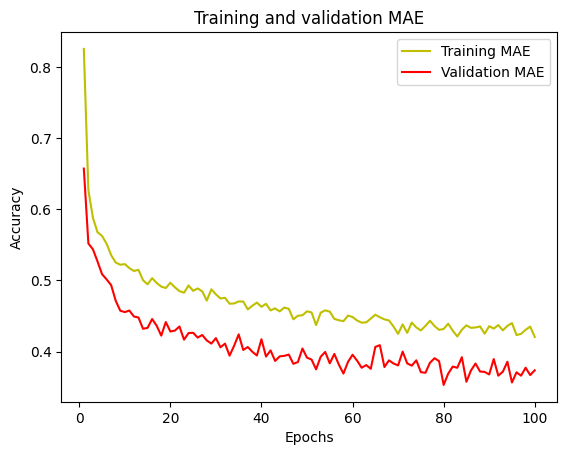

37/37 [==============================] - 0s 1ms/step
Predicted values are:  [[ 6.7699223  4.6167    14.089564   1.2282429 81.77018  ]
 [ 9.386692   6.340579  11.36871    1.2010473 84.93385  ]
 [ 8.37445    5.9167466 11.456228   1.1436578 88.12469  ]
 ...
 [30.872469  24.458588  42.354782   2.427591  19.961872 ]
 [11.430986   7.4392567 21.747774   1.2650638 39.64527  ]
 [13.585795   9.393207  24.373407   1.3441261 36.515987 ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2023-04-01 19:00:00+02:00   2.0    3.0               16.0             1.0  \
2023-05-01 22:00:00+02:00  10.0    5.0               12.0             1.0   
2023-05-01 14:00:00+02:00   4.0    5.0                8.0             1.0   
2023-05-01 04:00:00+02:00   6.0    2.0               12.0             1.0   
2023-06-07 17:00:00+02:00  13.0   14.0               16.0             1.0   
...          

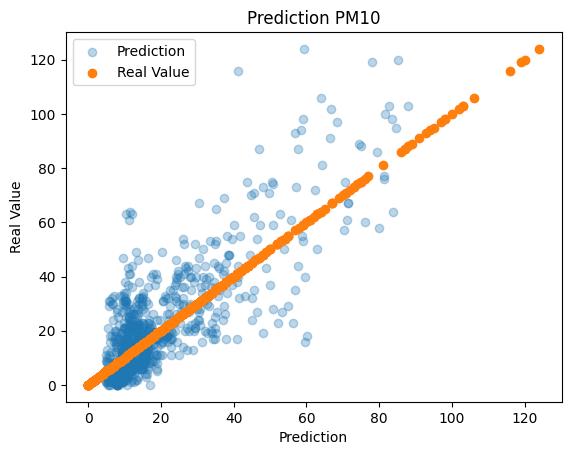

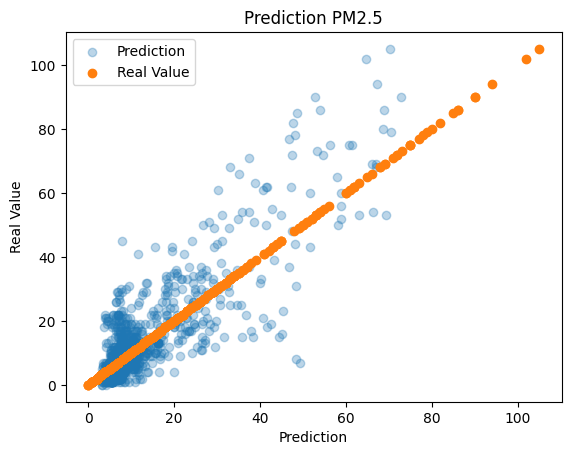

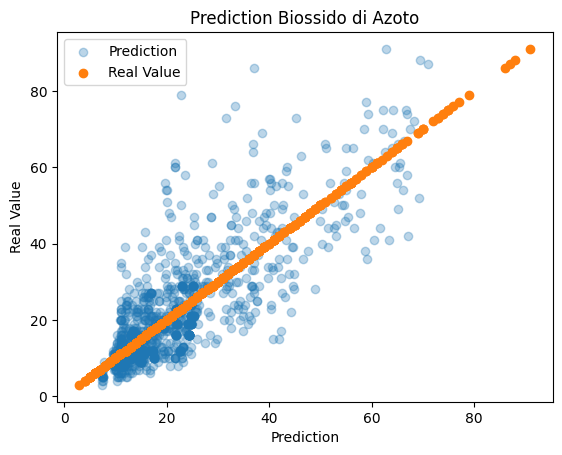

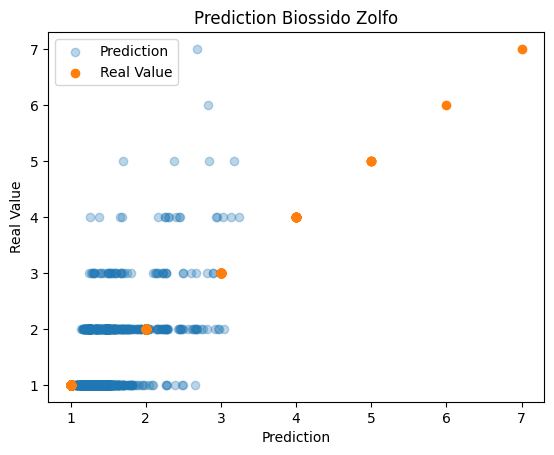

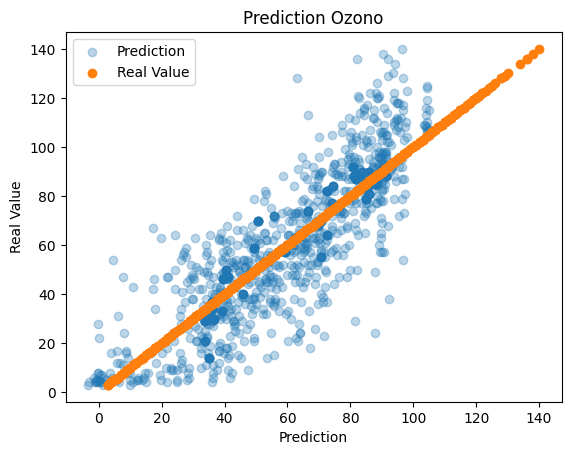

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                512       
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dropout_42 (Dropout)        (None, 64)                0         
                                                                 
 dense_53 (Dense)            (None, 16)              

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 21ms/step - loss: 0.7774 - mean_squared_error: 0.7774 - val_loss: 0.6152 - val_mean_squared_error: 0.6152
Epoch 2/100
56/69 [=======================>......] - ETA: 0s - loss: 0.6380 - mean_squared_error: 0.6380
Epoch 2: val_loss improved from 0.61523 to 0.60094, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 19ms/step - loss: 0.6262 - mean_squared_error: 0.6262 - val_loss: 0.6009 - val_mean_squared_error: 0.6009
Epoch 3/100
67/69 [============================>.] - ETA: 0s - loss: 0.6135 - mean_squared_error: 0.6135
Epoch 3: val_loss improved from 0.60094 to 0.58055, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 23ms/step - loss: 0.6159 - mean_squared_error: 0.6159 - val_loss: 0.5806 - val_mean_squared_error: 0.5806
Epoch 4/100
55/69 [======================>.......] - ETA: 0s - loss: 0.5914 - mean_squared_error: 0.5914
Epoch 4: val_loss improved from 0.58055 to 0.56492, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 21ms/step - loss: 0.6037 - mean_squared_error: 0.6037 - val_loss: 0.5649 - val_mean_squared_error: 0.5649
Epoch 5/100
58/69 [========================>.....] - ETA: 0s - loss: 0.5950 - mean_squared_error: 0.5950
Epoch 5: val_loss improved from 0.56492 to 0.55875, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 22ms/step - loss: 0.5943 - mean_squared_error: 0.5943 - val_loss: 0.5588 - val_mean_squared_error: 0.5588
Epoch 6/100
60/69 [=========================>....] - ETA: 0s - loss: 0.5975 - mean_squared_error: 0.5975
Epoch 6: val_loss improved from 0.55875 to 0.53766, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 2s 23ms/step - loss: 0.5948 - mean_squared_error: 0.5948 - val_loss: 0.5377 - val_mean_squared_error: 0.5377
Epoch 7/100
59/69 [========================>.....] - ETA: 0s - loss: 0.5839 - mean_squared_error: 0.5839
Epoch 7: val_loss did not improve from 0.53766
69/69 [==============================] - 0s 3ms/step - loss: 0.5952 - mean_squared_error: 0.5952 - val_loss: 0.5423 - val_mean_squared_error: 0.5423
Epoch 8/100
62/69 [=========================>....] - ETA: 0s - loss: 0.5881 - mean_squared_error: 0.5881
Epoch 8: val_loss improved from 0.53766 to 0.53388, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 5s 68ms/step - loss: 0.5798 - mean_squared_error: 0.5798 - val_loss: 0.5339 - val_mean_squared_error: 0.5339
Epoch 9/100
58/69 [========================>.....] - ETA: 0s - loss: 0.5894 - mean_squared_error: 0.5894
Epoch 9: val_loss did not improve from 0.53388
69/69 [==============================] - 0s 3ms/step - loss: 0.5656 - mean_squared_error: 0.5656 - val_loss: 0.5441 - val_mean_squared_error: 0.5441
Epoch 10/100
51/69 [=====================>........] - ETA: 0s - loss: 0.5671 - mean_squared_error: 0.5671
Epoch 10: val_loss improved from 0.53388 to 0.53010, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 18ms/step - loss: 0.5637 - mean_squared_error: 0.5637 - val_loss: 0.5301 - val_mean_squared_error: 0.5301
Epoch 11/100
56/69 [=======================>......] - ETA: 0s - loss: 0.5718 - mean_squared_error: 0.5718
Epoch 11: val_loss improved from 0.53010 to 0.52028, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5639 - mean_squared_error: 0.5639 - val_loss: 0.5203 - val_mean_squared_error: 0.5203
Epoch 12/100
59/69 [========================>.....] - ETA: 0s - loss: 0.5669 - mean_squared_error: 0.5669
Epoch 12: val_loss improved from 0.52028 to 0.51304, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 17ms/step - loss: 0.5654 - mean_squared_error: 0.5654 - val_loss: 0.5130 - val_mean_squared_error: 0.5130
Epoch 13/100
44/69 [==================>...........] - ETA: 0s - loss: 0.5791 - mean_squared_error: 0.5791
Epoch 13: val_loss did not improve from 0.51304
69/69 [==============================] - 0s 3ms/step - loss: 0.5662 - mean_squared_error: 0.5662 - val_loss: 0.5200 - val_mean_squared_error: 0.5200
Epoch 14/100
65/69 [===========================>..] - ETA: 0s - loss: 0.5542 - mean_squared_error: 0.5542
Epoch 14: val_loss improved from 0.51304 to 0.50630, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 17ms/step - loss: 0.5554 - mean_squared_error: 0.5554 - val_loss: 0.5063 - val_mean_squared_error: 0.5063
Epoch 15/100
44/69 [==================>...........] - ETA: 0s - loss: 0.5645 - mean_squared_error: 0.5645
Epoch 15: val_loss improved from 0.50630 to 0.49209, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 17ms/step - loss: 0.5509 - mean_squared_error: 0.5509 - val_loss: 0.4921 - val_mean_squared_error: 0.4921
Epoch 16/100
47/69 [===================>..........] - ETA: 0s - loss: 0.5640 - mean_squared_error: 0.5640
Epoch 16: val_loss did not improve from 0.49209
69/69 [==============================] - 0s 3ms/step - loss: 0.5550 - mean_squared_error: 0.5550 - val_loss: 0.5009 - val_mean_squared_error: 0.5009
Epoch 17/100
56/69 [=======================>......] - ETA: 0s - loss: 0.5566 - mean_squared_error: 0.5566
Epoch 17: val_loss did not improve from 0.49209
69/69 [==============================] - 0s 2ms/step - loss: 0.5547 - mean_squared_error: 0.5547 - val_loss: 0.5108 - val_mean_squared_error: 0.5108
Epoch 18/100
53/69 [======================>.......] - ETA: 0s - loss: 0.5467 - mean_squared_error: 0.5467
Epoch 18: val_loss did not improve from 0.49209
69/69 [==============================] - 0s 2ms/step - loss: 0.5439 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 17ms/step - loss: 0.5528 - mean_squared_error: 0.5528 - val_loss: 0.4872 - val_mean_squared_error: 0.4872
Epoch 21/100
52/69 [=====================>........] - ETA: 0s - loss: 0.5394 - mean_squared_error: 0.5394
Epoch 21: val_loss did not improve from 0.48717
69/69 [==============================] - 0s 2ms/step - loss: 0.5488 - mean_squared_error: 0.5488 - val_loss: 0.4989 - val_mean_squared_error: 0.4989
Epoch 22/100
36/69 [==============>...............] - ETA: 0s - loss: 0.5663 - mean_squared_error: 0.5663
Epoch 22: val_loss did not improve from 0.48717
69/69 [==============================] - 0s 2ms/step - loss: 0.5432 - mean_squared_error: 0.5432 - val_loss: 0.4966 - val_mean_squared_error: 0.4966
Epoch 23/100
40/69 [================>.............] - ETA: 0s - loss: 0.5355 - mean_squared_error: 0.5355
Epoch 23: val_loss improved from 0.48717 to 0.48332, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 15ms/step - loss: 0.5414 - mean_squared_error: 0.5414 - val_loss: 0.4833 - val_mean_squared_error: 0.4833
Epoch 24/100
48/69 [===================>..........] - ETA: 0s - loss: 0.5470 - mean_squared_error: 0.5470
Epoch 24: val_loss did not improve from 0.48332
69/69 [==============================] - 0s 3ms/step - loss: 0.5450 - mean_squared_error: 0.5450 - val_loss: 0.4922 - val_mean_squared_error: 0.4922
Epoch 25/100
65/69 [===========================>..] - ETA: 0s - loss: 0.5581 - mean_squared_error: 0.5581
Epoch 25: val_loss improved from 0.48332 to 0.48121, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5530 - mean_squared_error: 0.5530 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 26/100
52/69 [=====================>........] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 26: val_loss did not improve from 0.48121
69/69 [==============================] - 0s 2ms/step - loss: 0.5346 - mean_squared_error: 0.5346 - val_loss: 0.5024 - val_mean_squared_error: 0.5024
Epoch 27/100
68/69 [============================>.] - ETA: 0s - loss: 0.5410 - mean_squared_error: 0.5410
Epoch 27: val_loss did not improve from 0.48121
69/69 [==============================] - 0s 2ms/step - loss: 0.5411 - mean_squared_error: 0.5411 - val_loss: 0.4962 - val_mean_squared_error: 0.4962
Epoch 28/100
66/69 [===========================>..] - ETA: 0s - loss: 0.5300 - mean_squared_error: 0.5300
Epoch 28: val_loss improved from 0.48121 to 0.47669, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5315 - mean_squared_error: 0.5315 - val_loss: 0.4767 - val_mean_squared_error: 0.4767
Epoch 29/100
42/69 [=================>............] - ETA: 0s - loss: 0.5425 - mean_squared_error: 0.5425
Epoch 29: val_loss improved from 0.47669 to 0.47427, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5307 - mean_squared_error: 0.5307 - val_loss: 0.4743 - val_mean_squared_error: 0.4743
Epoch 30/100
46/69 [===================>..........] - ETA: 0s - loss: 0.5267 - mean_squared_error: 0.5267
Epoch 30: val_loss did not improve from 0.47427
69/69 [==============================] - 0s 3ms/step - loss: 0.5346 - mean_squared_error: 0.5346 - val_loss: 0.4818 - val_mean_squared_error: 0.4818
Epoch 31/100
68/69 [============================>.] - ETA: 0s - loss: 0.5220 - mean_squared_error: 0.5220
Epoch 31: val_loss improved from 0.47427 to 0.46751, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 15ms/step - loss: 0.5203 - mean_squared_error: 0.5203 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 32/100
65/69 [===========================>..] - ETA: 0s - loss: 0.5290 - mean_squared_error: 0.5290
Epoch 32: val_loss did not improve from 0.46751
69/69 [==============================] - 0s 2ms/step - loss: 0.5291 - mean_squared_error: 0.5291 - val_loss: 0.5035 - val_mean_squared_error: 0.5035
Epoch 33/100
59/69 [========================>.....] - ETA: 0s - loss: 0.5349 - mean_squared_error: 0.5349
Epoch 33: val_loss did not improve from 0.46751
69/69 [==============================] - 0s 2ms/step - loss: 0.5347 - mean_squared_error: 0.5347 - val_loss: 0.4915 - val_mean_squared_error: 0.4915
Epoch 34/100
59/69 [========================>.....] - ETA: 0s - loss: 0.5206 - mean_squared_error: 0.5206
Epoch 34: val_loss did not improve from 0.46751
69/69 [==============================] - 0s 2ms/step - loss: 0.5228 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5158 - mean_squared_error: 0.5158 - val_loss: 0.4663 - val_mean_squared_error: 0.4663
Epoch 39/100
50/69 [====================>.........] - ETA: 0s - loss: 0.5402 - mean_squared_error: 0.5402
Epoch 39: val_loss improved from 0.46632 to 0.46418, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5320 - mean_squared_error: 0.5320 - val_loss: 0.4642 - val_mean_squared_error: 0.4642
Epoch 40/100
55/69 [======================>.......] - ETA: 0s - loss: 0.5216 - mean_squared_error: 0.5216
Epoch 40: val_loss did not improve from 0.46418
69/69 [==============================] - 0s 2ms/step - loss: 0.5214 - mean_squared_error: 0.5214 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 41/100
67/69 [============================>.] - ETA: 0s - loss: 0.5255 - mean_squared_error: 0.5255
Epoch 41: val_loss improved from 0.46418 to 0.45994, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5202 - mean_squared_error: 0.5202 - val_loss: 0.4599 - val_mean_squared_error: 0.4599
Epoch 42/100
42/69 [=================>............] - ETA: 0s - loss: 0.5409 - mean_squared_error: 0.5409
Epoch 42: val_loss did not improve from 0.45994
69/69 [==============================] - 0s 3ms/step - loss: 0.5232 - mean_squared_error: 0.5232 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 43/100
64/69 [==========================>...] - ETA: 0s - loss: 0.5142 - mean_squared_error: 0.5142
Epoch 43: val_loss did not improve from 0.45994
69/69 [==============================] - 0s 2ms/step - loss: 0.5143 - mean_squared_error: 0.5143 - val_loss: 0.4870 - val_mean_squared_error: 0.4870
Epoch 44/100
67/69 [============================>.] - ETA: 0s - loss: 0.5248 - mean_squared_error: 0.5248
Epoch 44: val_loss did not improve from 0.45994
69/69 [==============================] - 0s 2ms/step - loss: 0.5300 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 15ms/step - loss: 0.5086 - mean_squared_error: 0.5086 - val_loss: 0.4577 - val_mean_squared_error: 0.4577
Epoch 46/100
53/69 [======================>.......] - ETA: 0s - loss: 0.5123 - mean_squared_error: 0.5123
Epoch 46: val_loss did not improve from 0.45772
69/69 [==============================] - 0s 3ms/step - loss: 0.5148 - mean_squared_error: 0.5148 - val_loss: 0.4590 - val_mean_squared_error: 0.4590
Epoch 47/100
58/69 [========================>.....] - ETA: 0s - loss: 0.5016 - mean_squared_error: 0.5016
Epoch 47: val_loss did not improve from 0.45772
69/69 [==============================] - 0s 3ms/step - loss: 0.5066 - mean_squared_error: 0.5066 - val_loss: 0.4681 - val_mean_squared_error: 0.4681
Epoch 48/100
64/69 [==========================>...] - ETA: 0s - loss: 0.5172 - mean_squared_error: 0.5172
Epoch 48: val_loss improved from 0.45772 to 0.44248, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5145 - mean_squared_error: 0.5145 - val_loss: 0.4425 - val_mean_squared_error: 0.4425
Epoch 49/100
43/69 [=================>............] - ETA: 0s - loss: 0.4941 - mean_squared_error: 0.4941
Epoch 49: val_loss did not improve from 0.44248
69/69 [==============================] - 0s 3ms/step - loss: 0.5139 - mean_squared_error: 0.5139 - val_loss: 0.4446 - val_mean_squared_error: 0.4446
Epoch 50/100
62/69 [=========================>....] - ETA: 0s - loss: 0.5379 - mean_squared_error: 0.5379
Epoch 50: val_loss did not improve from 0.44248
69/69 [==============================] - 0s 2ms/step - loss: 0.5277 - mean_squared_error: 0.5277 - val_loss: 0.4585 - val_mean_squared_error: 0.4585
Epoch 51/100
60/69 [=========================>....] - ETA: 0s - loss: 0.5075 - mean_squared_error: 0.5075
Epoch 51: val_loss did not improve from 0.44248
69/69 [==============================] - 0s 2ms/step - loss: 0.5075 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5040 - mean_squared_error: 0.5040 - val_loss: 0.4409 - val_mean_squared_error: 0.4409
Epoch 54/100
69/69 [==============================] - ETA: 0s - loss: 0.5036 - mean_squared_error: 0.5036
Epoch 54: val_loss did not improve from 0.44094
69/69 [==============================] - 0s 3ms/step - loss: 0.5036 - mean_squared_error: 0.5036 - val_loss: 0.4773 - val_mean_squared_error: 0.4773
Epoch 55/100
66/69 [===========================>..] - ETA: 0s - loss: 0.5082 - mean_squared_error: 0.5082
Epoch 55: val_loss did not improve from 0.44094
69/69 [==============================] - 0s 2ms/step - loss: 0.5070 - mean_squared_error: 0.5070 - val_loss: 0.4475 - val_mean_squared_error: 0.4475
Epoch 56/100
56/69 [=======================>......] - ETA: 0s - loss: 0.5058 - mean_squared_error: 0.5058
Epoch 56: val_loss improved from 0.44094 to 0.43198, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.5066 - mean_squared_error: 0.5066 - val_loss: 0.4320 - val_mean_squared_error: 0.4320
Epoch 57/100
58/69 [========================>.....] - ETA: 0s - loss: 0.4948 - mean_squared_error: 0.4948
Epoch 57: val_loss did not improve from 0.43198
69/69 [==============================] - 0s 3ms/step - loss: 0.5024 - mean_squared_error: 0.5024 - val_loss: 0.4630 - val_mean_squared_error: 0.4630
Epoch 58/100
67/69 [============================>.] - ETA: 0s - loss: 0.5021 - mean_squared_error: 0.5021
Epoch 58: val_loss did not improve from 0.43198
69/69 [==============================] - 0s 2ms/step - loss: 0.5001 - mean_squared_error: 0.5001 - val_loss: 0.4437 - val_mean_squared_error: 0.4437
Epoch 59/100
36/69 [==============>...............] - ETA: 0s - loss: 0.4634 - mean_squared_error: 0.4634
Epoch 59: val_loss did not improve from 0.43198
69/69 [==============================] - 0s 2ms/step - loss: 0.4931 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.4953 - mean_squared_error: 0.4953 - val_loss: 0.4252 - val_mean_squared_error: 0.4252
Epoch 66/100
62/69 [=========================>....] - ETA: 0s - loss: 0.4798 - mean_squared_error: 0.4798
Epoch 66: val_loss did not improve from 0.42517
69/69 [==============================] - 0s 3ms/step - loss: 0.4885 - mean_squared_error: 0.4885 - val_loss: 0.4444 - val_mean_squared_error: 0.4444
Epoch 67/100
66/69 [===========================>..] - ETA: 0s - loss: 0.4906 - mean_squared_error: 0.4906
Epoch 67: val_loss did not improve from 0.42517
69/69 [==============================] - 0s 2ms/step - loss: 0.4915 - mean_squared_error: 0.4915 - val_loss: 0.4351 - val_mean_squared_error: 0.4351
Epoch 68/100
64/69 [==========================>...] - ETA: 0s - loss: 0.4814 - mean_squared_error: 0.4814
Epoch 68: val_loss did not improve from 0.42517
69/69 [==============================] - 0s 2ms/step - loss: 0.4833 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.4907 - mean_squared_error: 0.4907 - val_loss: 0.4212 - val_mean_squared_error: 0.4212
Epoch 76/100
49/69 [====================>.........] - ETA: 0s - loss: 0.4799 - mean_squared_error: 0.4799
Epoch 76: val_loss did not improve from 0.42122
69/69 [==============================] - 0s 3ms/step - loss: 0.4902 - mean_squared_error: 0.4902 - val_loss: 0.4303 - val_mean_squared_error: 0.4303
Epoch 77/100
60/69 [=========================>....] - ETA: 0s - loss: 0.4750 - mean_squared_error: 0.4750
Epoch 77: val_loss improved from 0.42122 to 0.42082, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 16ms/step - loss: 0.4786 - mean_squared_error: 0.4786 - val_loss: 0.4208 - val_mean_squared_error: 0.4208
Epoch 78/100
65/69 [===========================>..] - ETA: 0s - loss: 0.4744 - mean_squared_error: 0.4744
Epoch 78: val_loss did not improve from 0.42082
69/69 [==============================] - 0s 3ms/step - loss: 0.4846 - mean_squared_error: 0.4846 - val_loss: 0.4282 - val_mean_squared_error: 0.4282
Epoch 79/100
65/69 [===========================>..] - ETA: 0s - loss: 0.4897 - mean_squared_error: 0.4897
Epoch 79: val_loss did not improve from 0.42082
69/69 [==============================] - 0s 2ms/step - loss: 0.4868 - mean_squared_error: 0.4868 - val_loss: 0.4292 - val_mean_squared_error: 0.4292
Epoch 80/100
57/69 [=======================>......] - ETA: 0s - loss: 0.4953 - mean_squared_error: 0.4953
Epoch 80: val_loss did not improve from 0.42082
69/69 [==============================] - 0s 2ms/step - loss: 0.4850 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 18ms/step - loss: 0.4856 - mean_squared_error: 0.4856 - val_loss: 0.4131 - val_mean_squared_error: 0.4131
Epoch 89/100
69/69 [==============================] - ETA: 0s - loss: 0.4888 - mean_squared_error: 0.4888
Epoch 89: val_loss did not improve from 0.41308
69/69 [==============================] - 0s 3ms/step - loss: 0.4888 - mean_squared_error: 0.4888 - val_loss: 0.4315 - val_mean_squared_error: 0.4315
Epoch 90/100
63/69 [==========================>...] - ETA: 0s - loss: 0.4762 - mean_squared_error: 0.4762
Epoch 90: val_loss did not improve from 0.41308
69/69 [==============================] - 0s 2ms/step - loss: 0.4784 - mean_squared_error: 0.4784 - val_loss: 0.4215 - val_mean_squared_error: 0.4215
Epoch 91/100
57/69 [=======================>......] - ETA: 0s - loss: 0.4807 - mean_squared_error: 0.4807
Epoch 91: val_loss did not improve from 0.41308
69/69 [==============================] - 0s 2ms/step - loss: 0.4861 - mean_squared_error: 

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


69/69 [==============================] - 1s 17ms/step - loss: 0.4818 - mean_squared_error: 0.4818 - val_loss: 0.4107 - val_mean_squared_error: 0.4107
Epoch 93/100
61/69 [=========================>....] - ETA: 0s - loss: 0.4871 - mean_squared_error: 0.4871
Epoch 93: val_loss did not improve from 0.41071
69/69 [==============================] - 0s 2ms/step - loss: 0.4831 - mean_squared_error: 0.4831 - val_loss: 0.4282 - val_mean_squared_error: 0.4282
Epoch 94/100
54/69 [======================>.......] - ETA: 0s - loss: 0.4714 - mean_squared_error: 0.4714
Epoch 94: val_loss did not improve from 0.41071
69/69 [==============================] - 0s 2ms/step - loss: 0.4789 - mean_squared_error: 0.4789 - val_loss: 0.4283 - val_mean_squared_error: 0.4283
Epoch 95/100
60/69 [=========================>....] - ETA: 0s - loss: 0.4850 - mean_squared_error: 0.4850
Epoch 95: val_loss did not improve from 0.41071
69/69 [==============================] - 0s 2ms/step - loss: 0.4776 - mean_squared_error: 

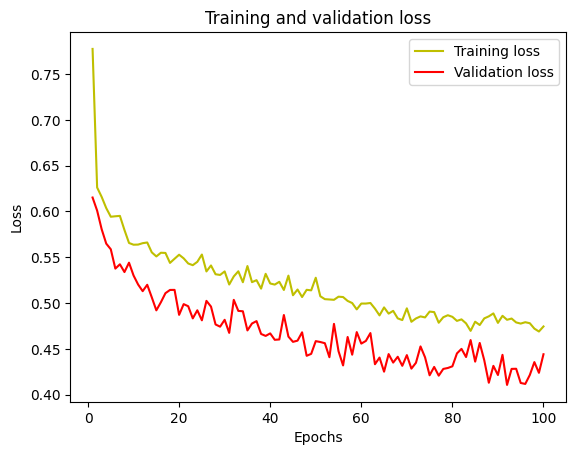

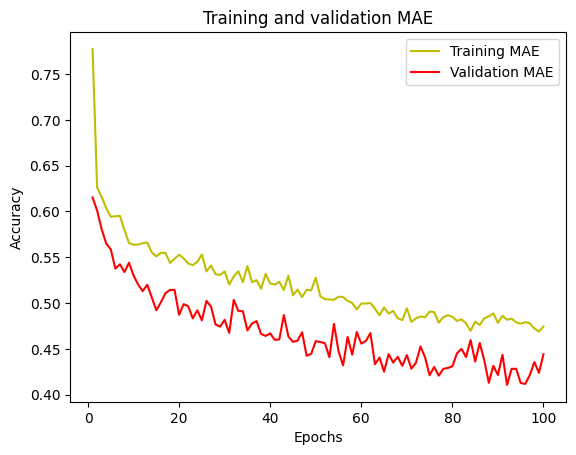

37/37 [==============================] - 0s 748us/step
Predicted values are:  [[ 7.2416773  4.8470807 17.887285   1.3269434 67.64522  ]
 [ 9.111912   5.707587  15.208939   1.2002162 66.78744  ]
 [ 7.5850534  4.771976  13.565471   1.2539405 77.95423  ]
 ...
 [29.816393  23.378199  38.86778    1.9727572 37.264194 ]
 [ 8.5188055  5.213821  14.749594   1.2286131 69.98291  ]
 [ 9.78703    7.0857453 21.95843    1.3055314 44.080948 ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2023-04-01 19:00:00+02:00   2.0    3.0               16.0             1.0  \
2023-05-01 22:00:00+02:00  10.0    5.0               12.0             1.0   
2023-05-01 14:00:00+02:00   4.0    5.0                8.0             1.0   
2023-05-01 04:00:00+02:00   6.0    2.0               12.0             1.0   
2023-06-07 17:00:00+02:00  13.0   14.0               16.0             1.0   
...        

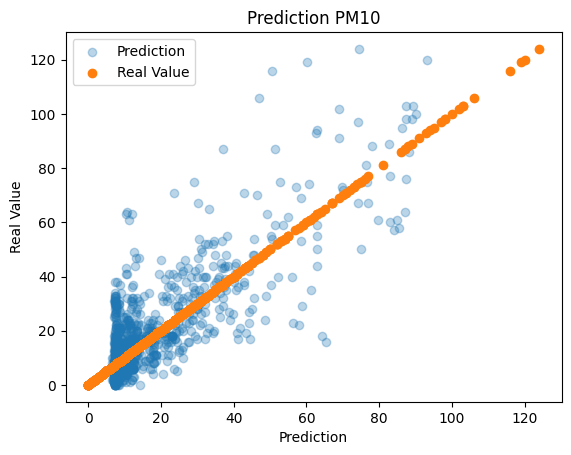

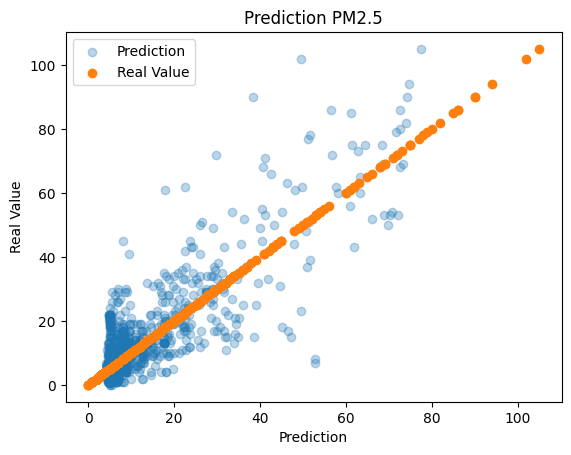

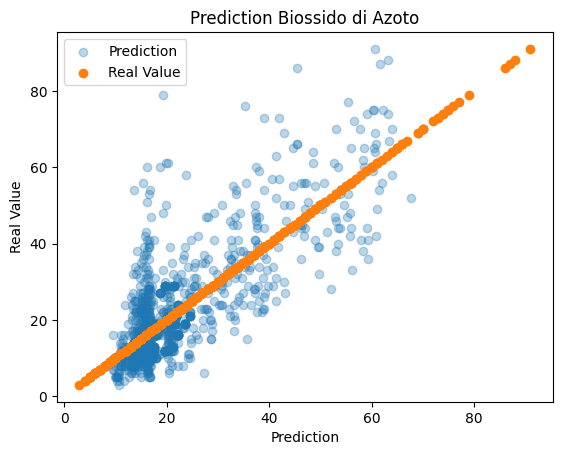

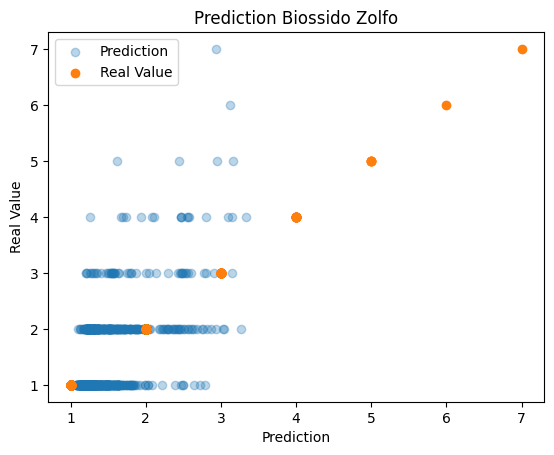

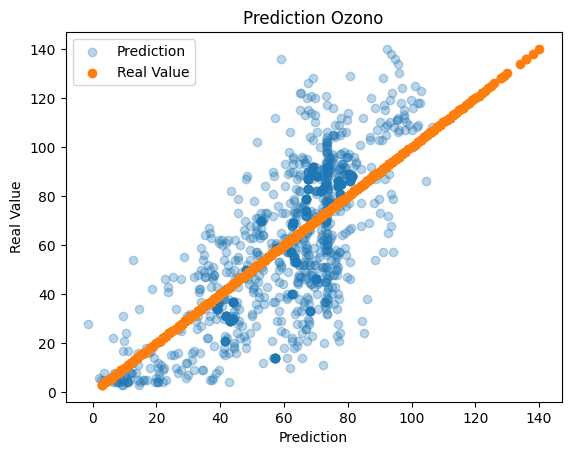

In [12]:



# df_appa = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv")
# df_appa
# df_appa.Time = pd.to_datetime(df_appa.Time)
# timezone_offset = datetime.timedelta(hours=2)
# timezone = datetime.timezone(timezone_offset)

# df_appa.Time = df_appa.Time.apply(lambda x: x.replace(tzinfo=timezone))
# df_appa.rename(columns={"Time": "ts"}, inplace=True)

ind=0
lista_pollutant=[df1_StChiara, df4_StChiara, df5_StChiara, df7_StChiara, df8_StChiara, df11_StChiara, df12_StChiara, df13_StChiara, df14_StChiara, df15_StChiara] #df 9 and 10 are TBD


# # data_ini= [date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,4,29), date(2021,6,30), date(2022,2,24), date(2022,2,24)]
# # data_fini=[date(2023,6,26), date(2021,4,29), date(2021,6,30), date(2023,5,24), date(2022,2,24), date(2023,6,26), date(2023,6,26), date(2023,6,26)]
def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts
dfSC=dfSC.reset_index()
dfSC.ts=tempo(dfSC)
data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-06-30", "2022-01-14", "2021-01-13", "2022-06-30", "2022-01-14", "2023-02-08", "2023-02-08"]
data_fini=["2023-02-08", "2023-06-26", "2021-04-29", "2023-06-26", "2023-06-26", "2023-06-26", "2023-02-08", "2023-06-26", "2023-06-26", "2023-06-26"]
for i in lista_pollutant: 
    df_tot = dfAPPA.merge(lista_pollutant[ind].reset_index())

    df_tot = df_tot.set_index("ts")
    df_tot = df_tot.sort_index()
    df_tot = df_tot.dropna()
    df_tot = df_tot.reset_index()
    df_tot.ts=tempo(df_tot)

    DFTOT = df_tot.merge(dfSC[["ts","T", "RH", "P", "IAQ"]])

    try:
        DFTOT = DFTOT.set_index("ts")
    except:
        pass
    for i in DFTOT.columns:
        DFTOT[i] = pd.to_numeric(DFTOT[i],errors = "coerce" )
    DFTOT = DFTOT.dropna()

    DFTOT = DFTOT[data_ini[ind]:data_fini[ind]]


    X = DFTOT.drop(["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"], axis=1)

    y = DFTOT[["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"]].copy()

    try:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM=1


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

    scaler=StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler=StandardScaler()
    scaler.fit(y_train)

    y_train_s = scaler.transform(y_train)
    y_test_s = pd.DataFrame(data = scaler.transform(y_test), columns = y_test.columns)
                            

    model = Sequential()

    model.add(Dense(64, kernel_initializer='normal',input_dim=INPUT_DIM, activation='selu'))

    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer='normal',activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='normal',activation='selu'))
    model.add(Dropout(0.2))

    model.add(Dense(16, kernel_initializer='normal',activation='selu'))
    model.add(Dropout(0.2))

    model.add(Dense(OUTPUT_DIM, kernel_initializer='normal',activation='linear'))

    a2 = "mean_squared_error"
    model.compile(loss=a2, optimizer='adam', metrics=[a2])
    model.summary()

    checkpoint_name = './tmp/checkpoint' 
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='min')
    callbacks_list = [checkpoint]
    history = model.fit(X_train_scaled, y_train_s, validation_split=0.2, epochs=100,callbacks=[checkpoint])
    model.load_weights(checkpoint_name)

    pollutant1 = DFTOT["PM10"]
    pollutant2 = DFTOT["Biossido di Azoto"]
    pollutant3 = DFTOT["Biossido Zolfo"]
    pollutant4 = DFTOT["PM2.5"]
    pollutant5 = DFTOT["Ozono"]

    pollutants = [pollutant1,pollutant2,pollutant3,pollutant4,pollutant5]

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['mean_squared_error']
    val_acc = history.history['val_mean_squared_error']
    plt.plot(epochs, acc, 'y', label='Training MAE')
    plt.plot(epochs, val_acc, 'r', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    predictions = model.predict(X_test_scaled)

    predictions = scaler.inverse_transform(predictions)

    y_test_ssaved = y_test_s
    y_test_s = y_test
    print("Predicted values are: ", predictions)
    print("Real values are: ", y_test_s)
        

    t = np.arange(0, predictions.size, 1)

    for n,sens in enumerate(y_test.columns):
        plt.scatter(predictions[:,n], y_test_s[sens], label='Prediction', alpha=0.3)
        plt.scatter(y_test_s[sens], y_test_s[sens], label='Real Value')
        plt.title('Prediction '+ sens) 
        plt.xlabel('Prediction')
        plt.ylabel('Real Value')
        plt.legend()
        plt.show()
    ind += 1

In [ ]:
df_appa = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv")
df_appa
df_appa.Time = pd.to_datetime(df_appa.Time)
timezone_offset = datetime.timedelta(hours=2)
timezone = datetime.timezone(timezone_offset)

df_appa.Time = df_appa.Time.apply(lambda x: x.replace(tzinfo=timezone))
df_appa.rename(columns={"Time": "ts"}, inplace=True)

ind=0
lista_pollutant=[df1, df4, df5, df8, df10, df11, df12, df14]


# data_ini= [date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,4,29), date(2021,6,30), date(2022,2,24), date(2022,2,24)]
# data_fini=[date(2023,6,26), date(2021,4,29), date(2021,6,30), date(2023,5,24), date(2022,2,24), date(2023,6,26), date(2023,6,26), date(2023,6,26)]

data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-01-13", "2021-04-29", "2021-06-30", "2022-02-24", "2022-02-24"]
data_fini=["2023-06-26", "2021-04-29", "2021-06-30", "2023-05-24", "2022-02-24", "2023-06-26", "2023-06-26", "2023-06-26"]

for i in lista_pollutant:
    df8 = lista_pollutant[ind]
    
    df8 = df8.resample("1H").mean()
    df_tot = df8.reset_index().merge(df_appa)
    df_tot.set_index("ts", inplace=True)
    df_tot = df_tot.sort_index().dropna()
    df_tot = df_tot.dropna()
    def f_model(x, a, b, c, d, e):
        Sig, T, RH = x
        return a * Sig**b + d * T + e + c
          
    (
        popt,
        pcov,
    ) = curve_fit(f=f_model,
        xdata=(
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["V"].values,
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["R"].values,
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["HT"].values,
        ), ydata=df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["Ossido di Carbonio"].values, p0=(4, 1, 1, 1, 1), maxfev=10000,)
    a_opt, b_opt, c_opt, d_opt, e_opt = popt
    df_tot["model 1"] = f_model(
        (df_tot["V"].values, df_tot["R"].values, df_tot["HT"].values),
        a_opt,
        b_opt,
        c_opt,
        d_opt,
        e_opt,
    )
    plt.scatter(df_tot["HT"], df_tot["model 1"])
    plt.scatter(df_tot["HT"], df_tot["HT"])
    X = df_tot.drop(["PM10","Ossido di Carbonio","Biossido di Azoto"], axis=1)

    y = df_tot["Biossido di Azoto"].copy()

    try :
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = 1
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=True
    )
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler = StandardScaler()
    scaler.fit(y_train.values.reshape(-1,1))

    y_train_s = scaler.transform(y_train.values.reshape(-1,1))
    y_test_s = scaler.transform(y_test.values.reshape(-1,1))    
    

    a2 = "mean_squared_error"

    model = Sequential()
    model.add(
        Dense(64, kernel_initializer="normal", input_dim=INPUT_DIM, activation="selu")
    )
    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))

    model.add(Dense(16, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))

    model.add(Dense(OUTPUT_DIM, kernel_initializer="normal", activation="linear"))

    model.compile(loss=a2, optimizer="adam", metrics=[a2])
    model.summary()

    checkpoint_name = "./tmp/checkpoint"
    checkpoint = ModelCheckpoint(
        checkpoint_name, monitor="val_loss", verbose=1, save_best_only=True, mode="min"
    )
    callbacks_list = [checkpoint]
    history = model.fit(
        X_train_scaled, y_train_s, validation_split=0.2, epochs=300, callbacks=[checkpoint]
    )
    model.load_weights(checkpoint_name)


    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "y", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


    acc = history.history["mean_squared_error"]
    val_acc = history.history["val_mean_squared_error"]
    plt.plot(epochs, acc, "y", label="Training MAE")
    plt.plot(epochs, val_acc, "r", label="Validation MAE")
    plt.title("Training and validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    predictions = model.predict(X_test_scaled)

    predictions = scaler.inverse_transform(predictions)

    y_test_ssaved = y_test_s
    y_test_s = y_test
    print("Predicted values are: ", predictions)
    print("Real values are: ", y_test_s)

    t = np.arange(0, predictions.size, 1)
    plt.scatter(predictions, y_test_s, label="Prediction")
    plt.scatter(y_test_s, y_test_s, label="Real Value")
    plt.title("Prediction")
    plt.xlabel("Prediction")
    plt.ylabel("Real Value")
    plt.legend()
    plt.show()
    ind += 1

NameError: name 'read_csv' is not defined

R-squared: 0.9617956438557783
MSE:  0.003925592437893933
RMSE:  0.0019627962189469666
PM10


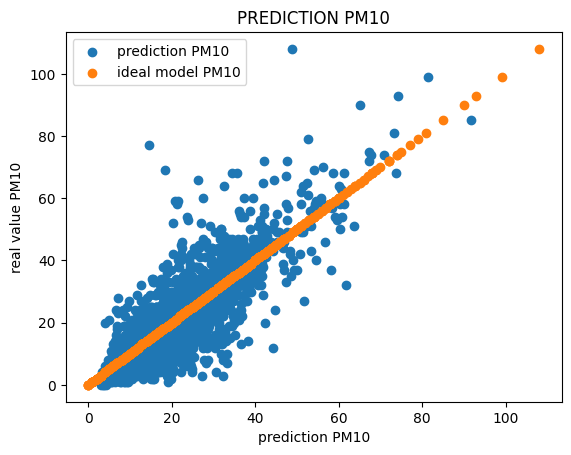

Biossido di Azoto


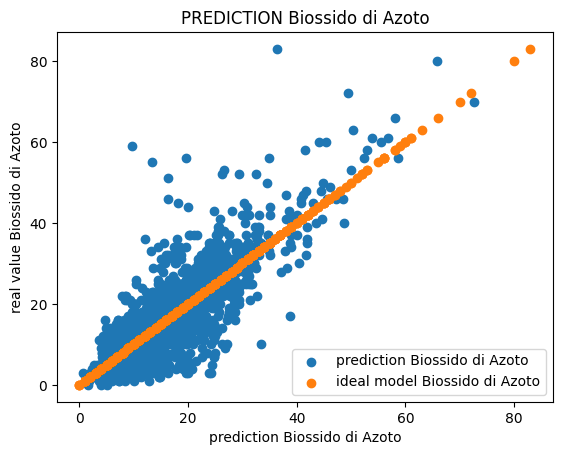

Biossido Zolfo


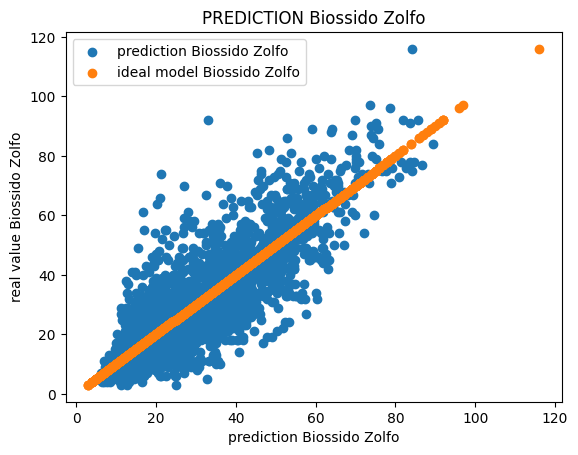

PM2.5


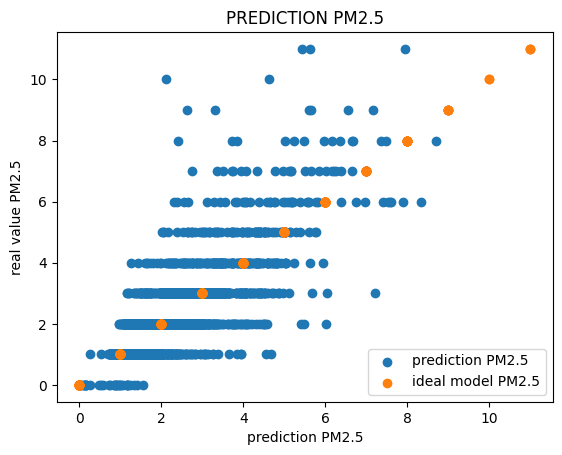

Ozono


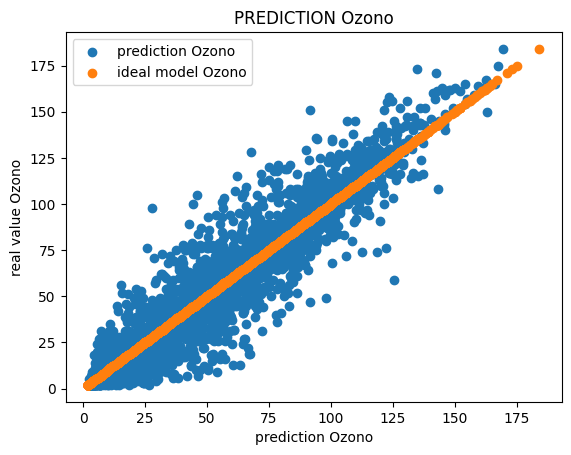

R-squared: 0.9620460727044776
MSE:  0.004027204017064149
RMSE:  0.0020136020085320745
PM10


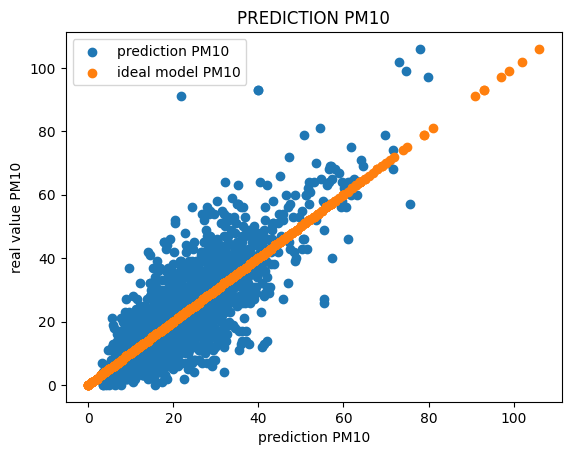

Biossido di Azoto


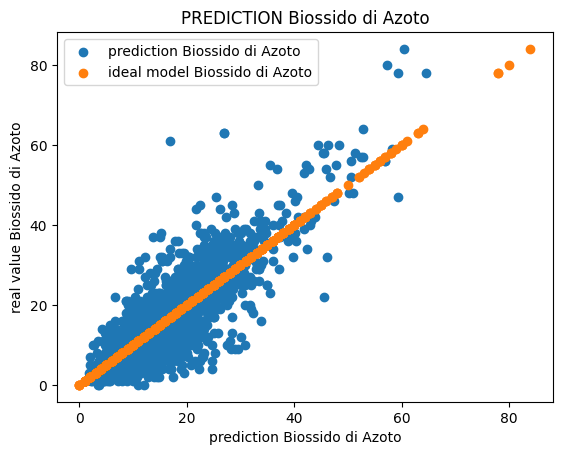

Biossido Zolfo


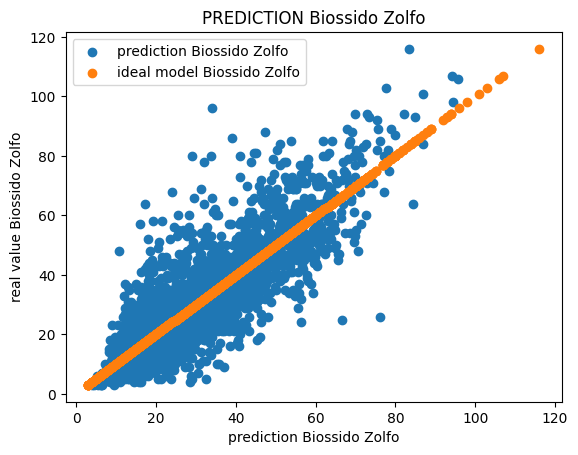

PM2.5


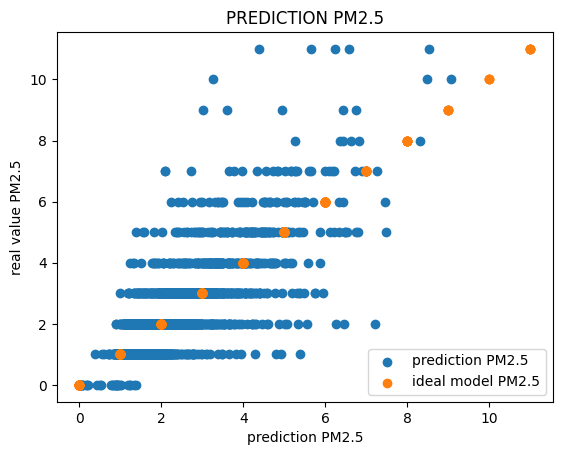

Ozono


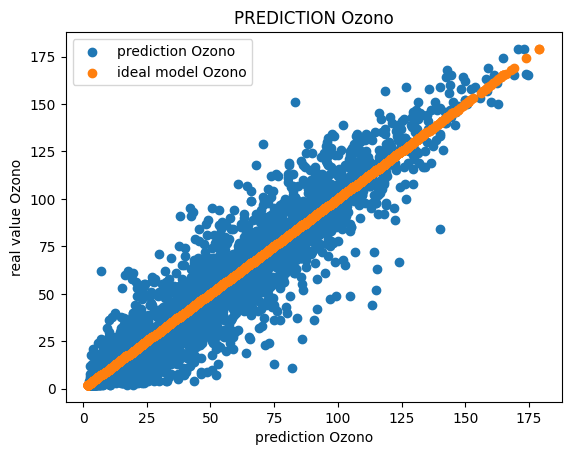

R-squared: 0.9626539215569492
MSE:  0.003954821119456905
RMSE:  0.0019774105597284526
PM10


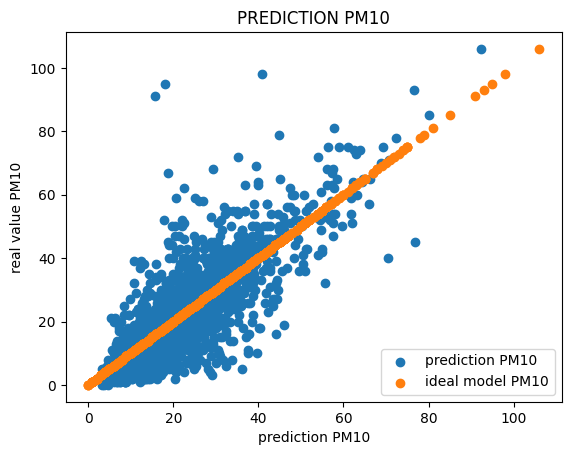

Biossido di Azoto


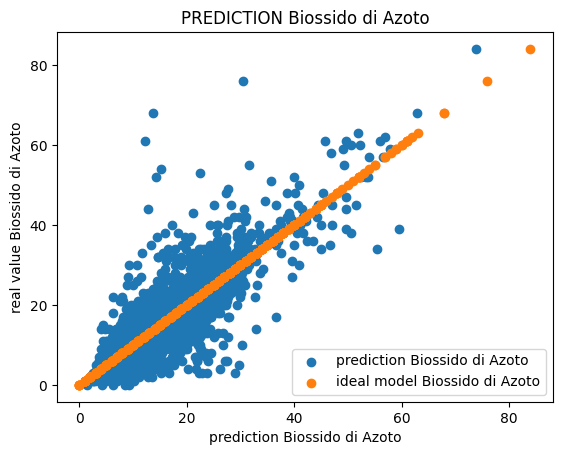

Biossido Zolfo


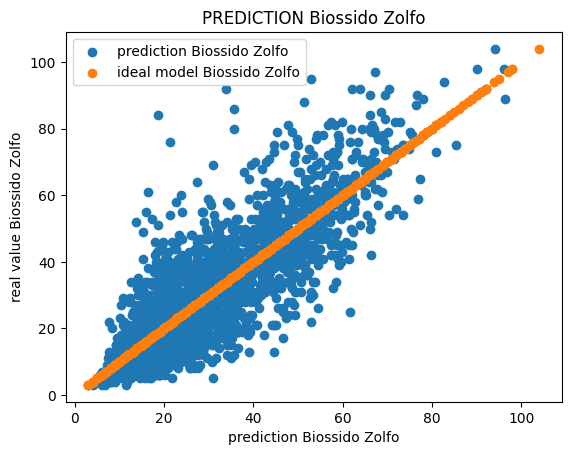

PM2.5


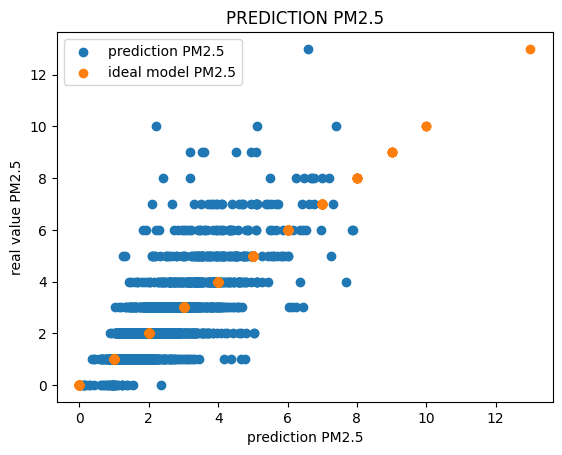

Ozono


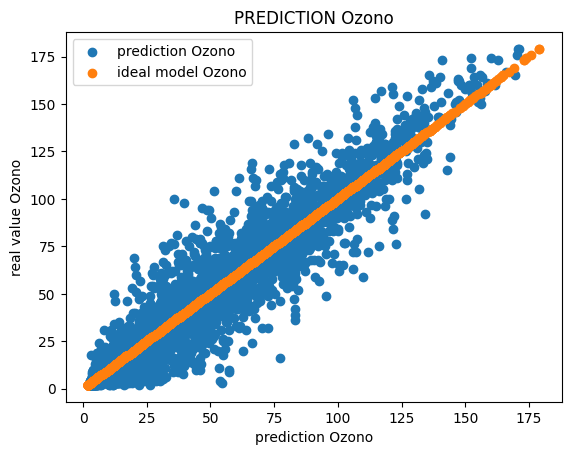

R-squared: 0.9626033936354098
MSE:  0.003967310927467739
RMSE:  0.0019836554637338694
PM10


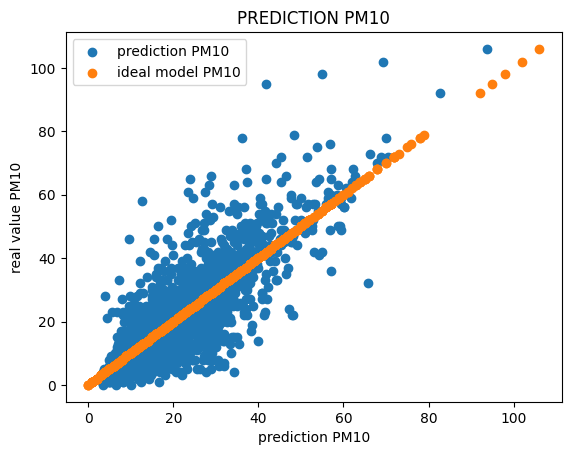

Biossido di Azoto


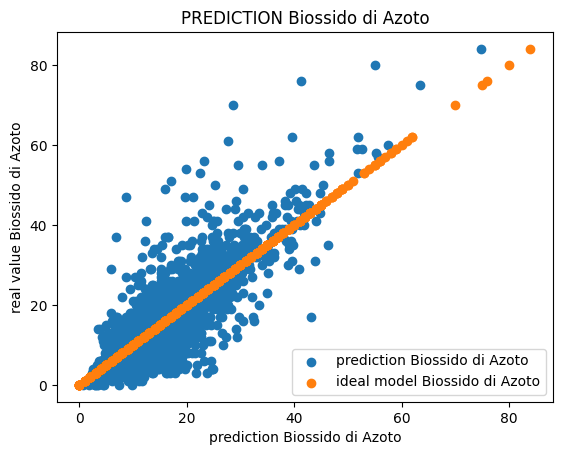

Biossido Zolfo


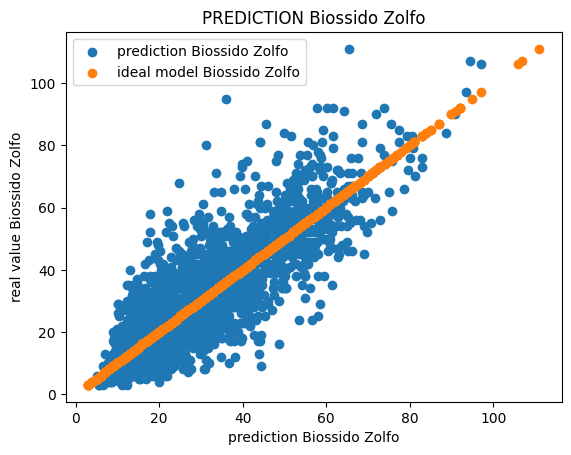

PM2.5


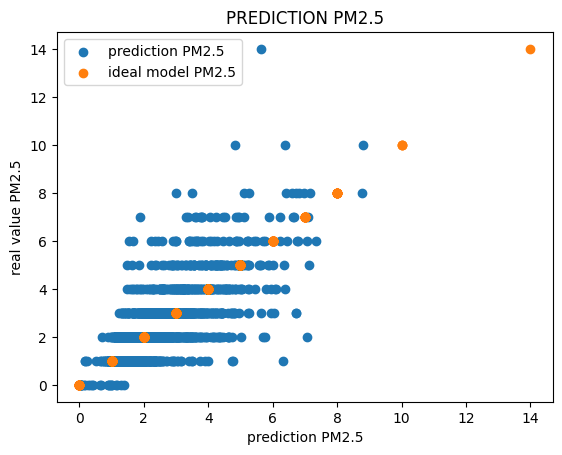

Ozono


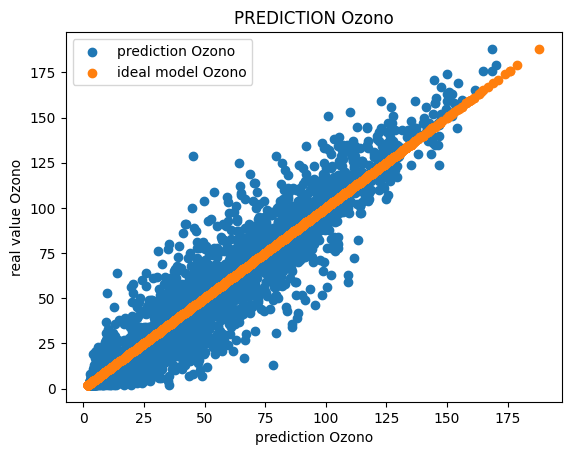

R-squared: 0.9623130750177452
MSE:  0.004295808673424613
RMSE:  0.0021479043367123064
PM10


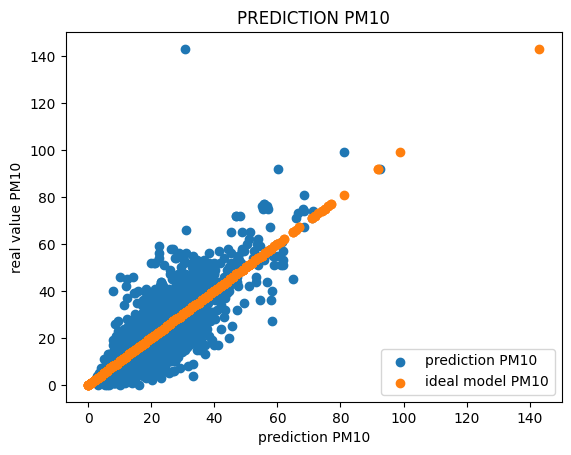

Biossido di Azoto


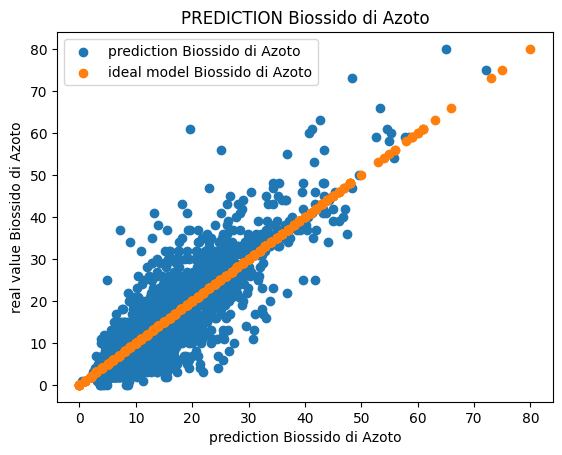

Biossido Zolfo


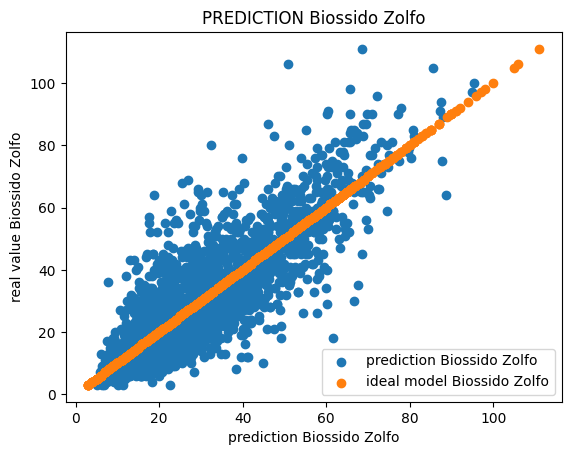

PM2.5


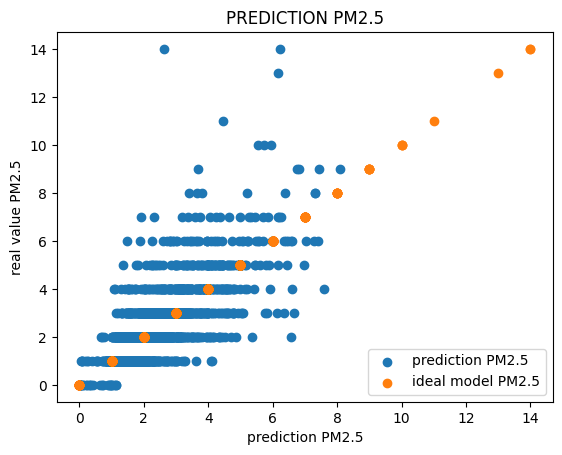

Ozono


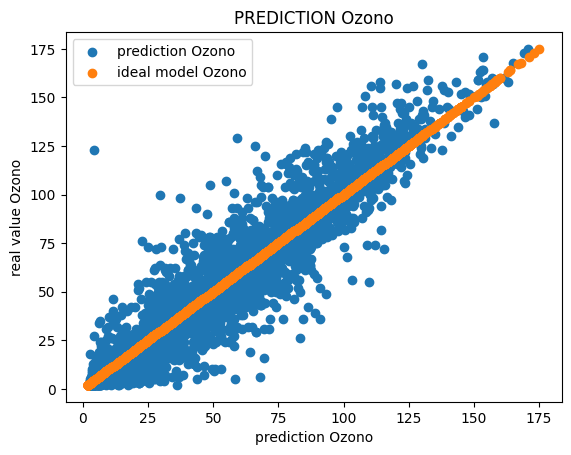

R-squared: 0.9629555600696502
MSE:  0.004112481805059909
RMSE:  0.0020562409025299544
PM10


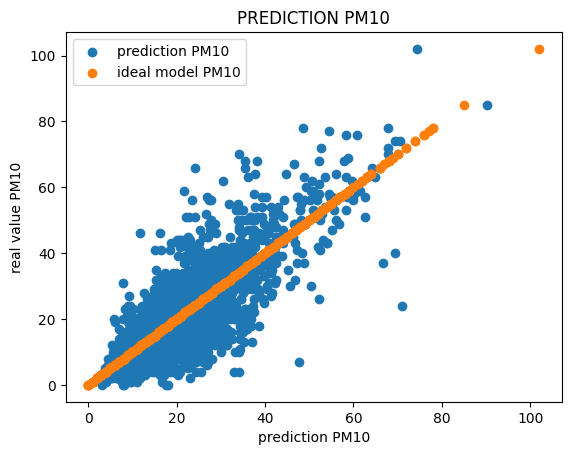

Biossido di Azoto


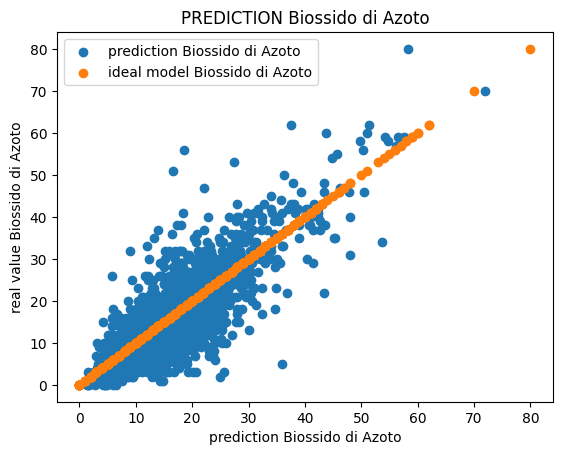

Biossido Zolfo


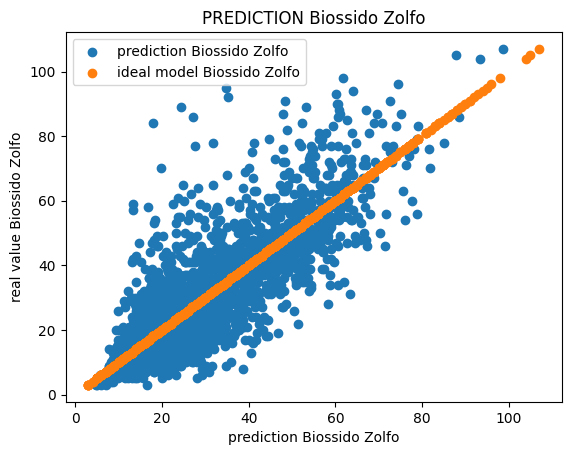

PM2.5


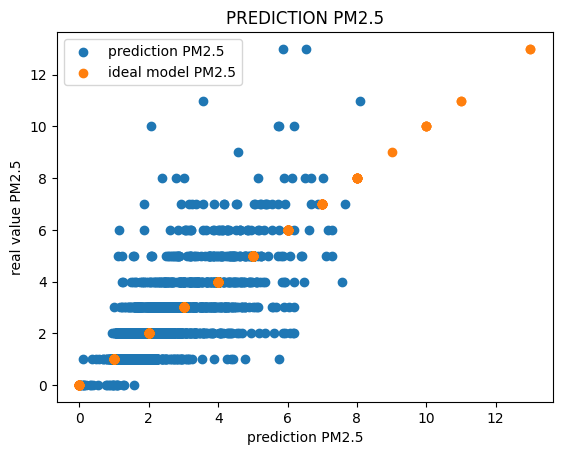

Ozono


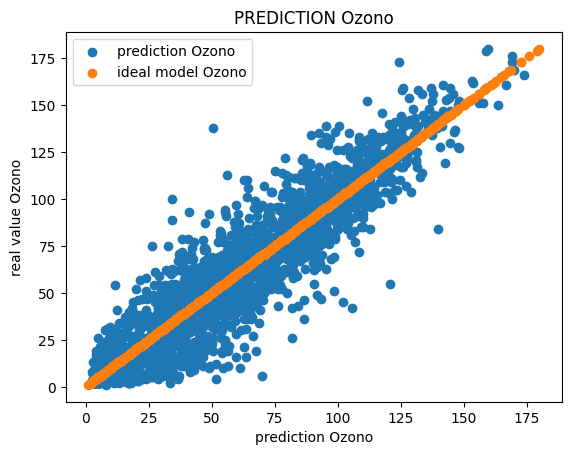

R-squared: 0.9627095521212394
MSE:  0.003928965563307128
RMSE:  0.001964482781653564
PM10


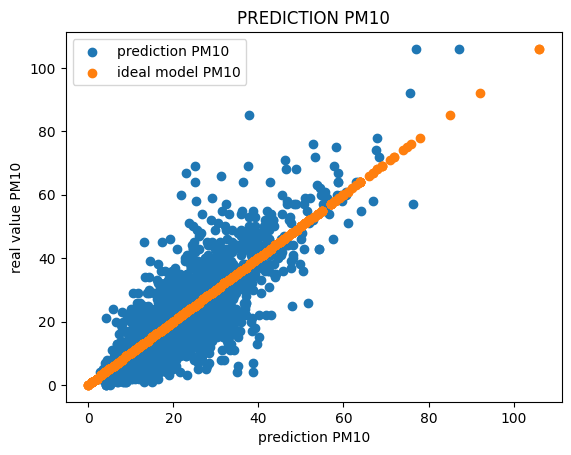

Biossido di Azoto


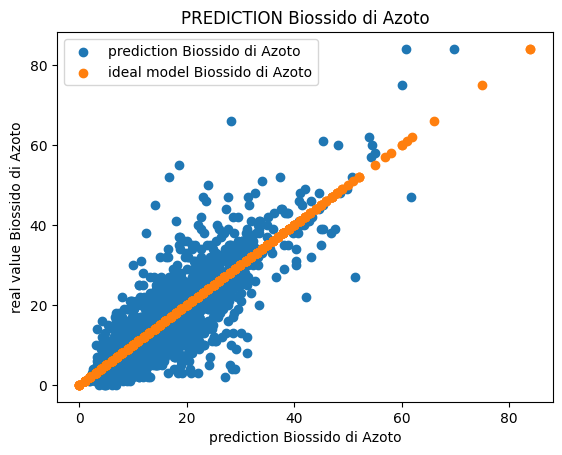

Biossido Zolfo


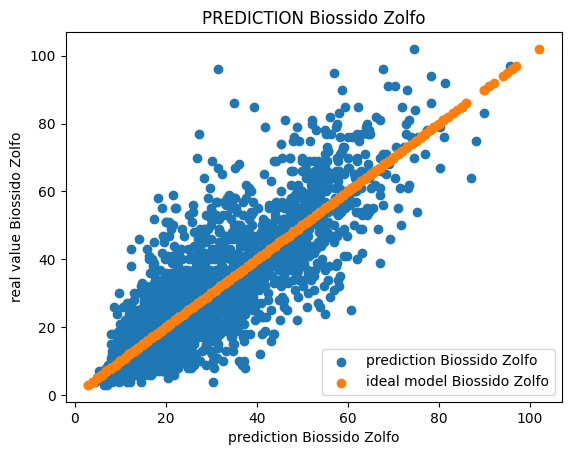

PM2.5


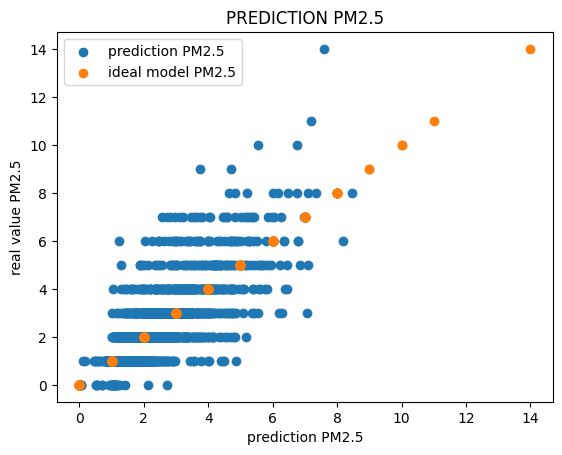

Ozono


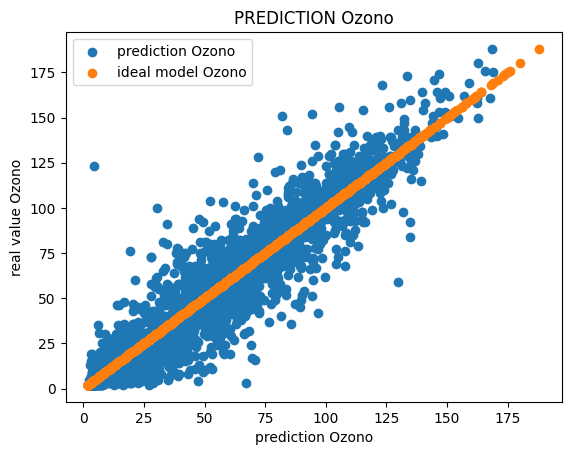

R-squared: 0.9625166484988327
MSE:  0.0038163017550374295
RMSE:  0.0019081508775187148
PM10


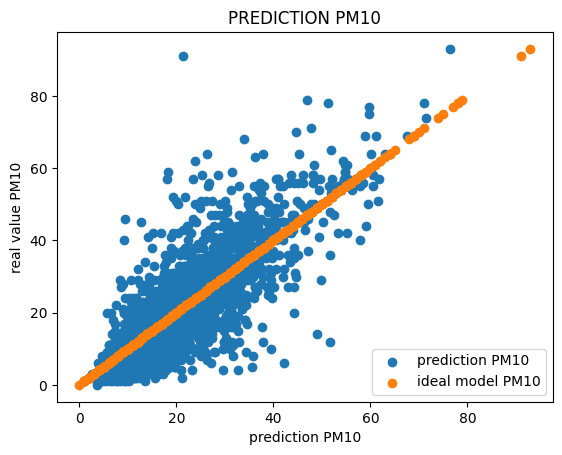

Biossido di Azoto


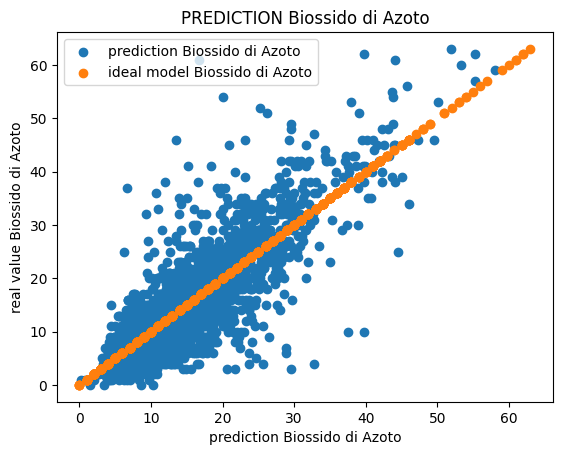

Biossido Zolfo


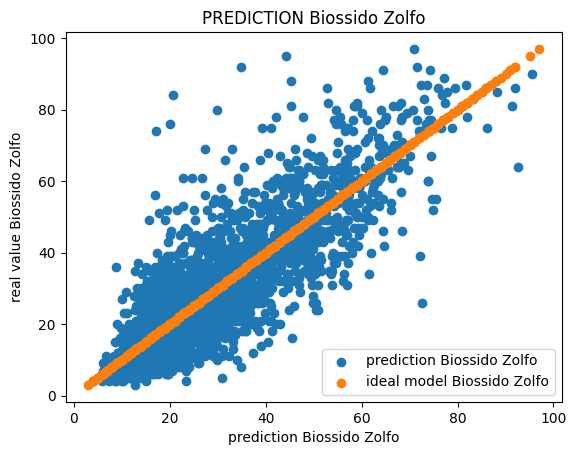

PM2.5


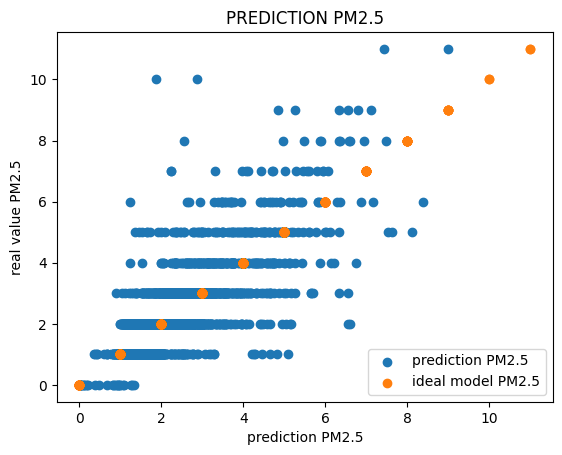

Ozono


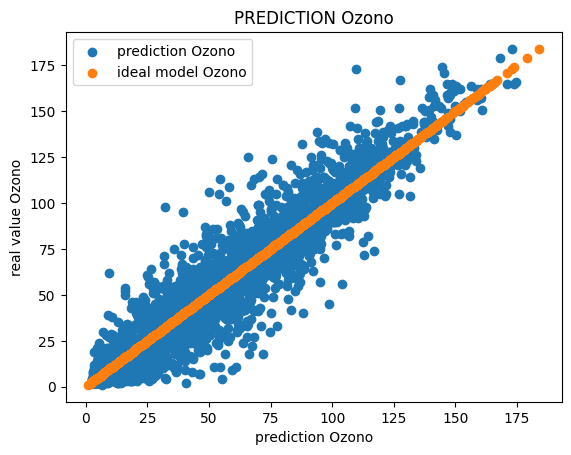

R-squared: 0.9623623318030845
MSE:  0.004004278234319462
RMSE:  0.002002139117159731
PM10


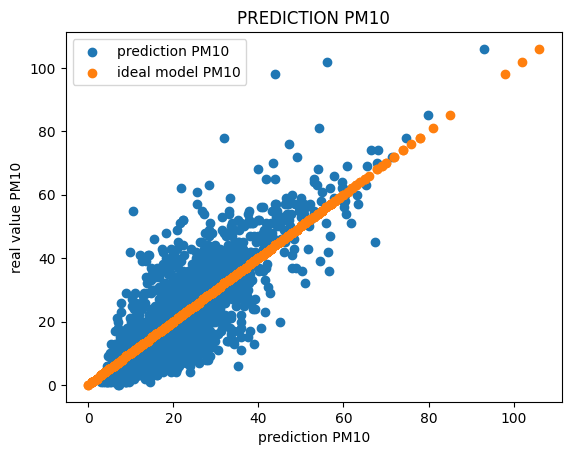

Biossido di Azoto


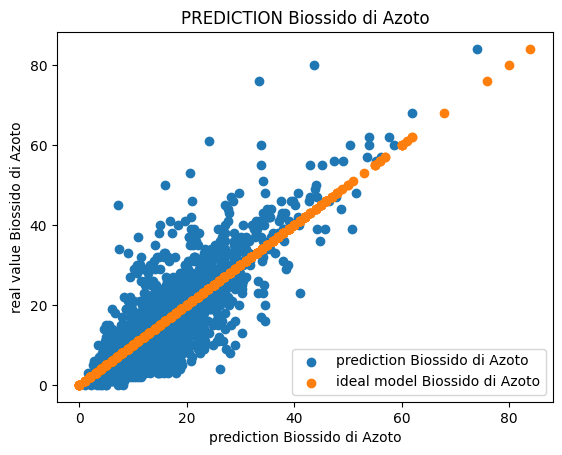

Biossido Zolfo


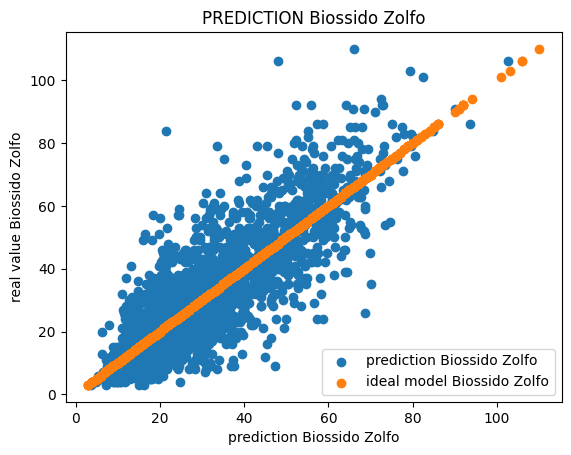

PM2.5


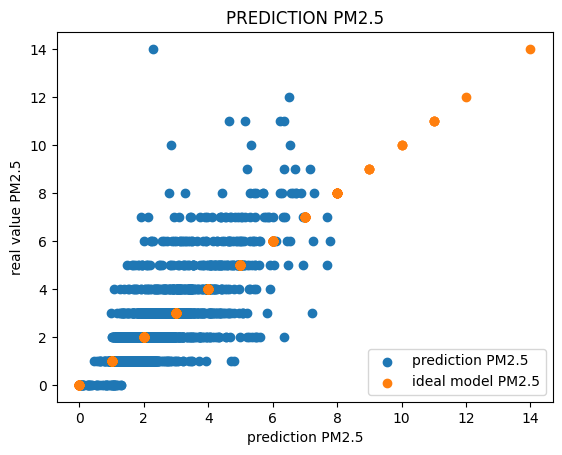

Ozono


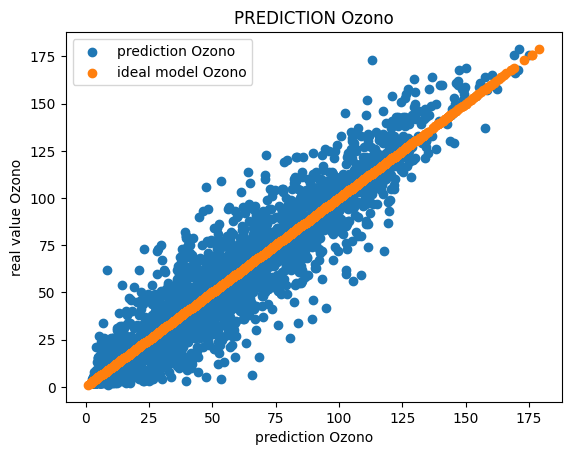

R-squared: 0.9634918646502134
MSE:  0.004172464591685735
RMSE:  0.0020862322958428675
PM10


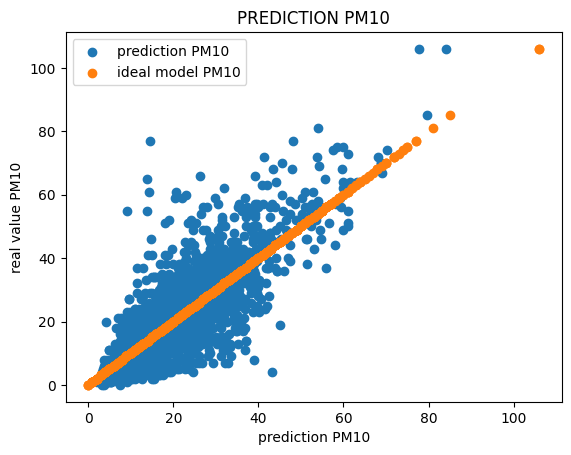

Biossido di Azoto


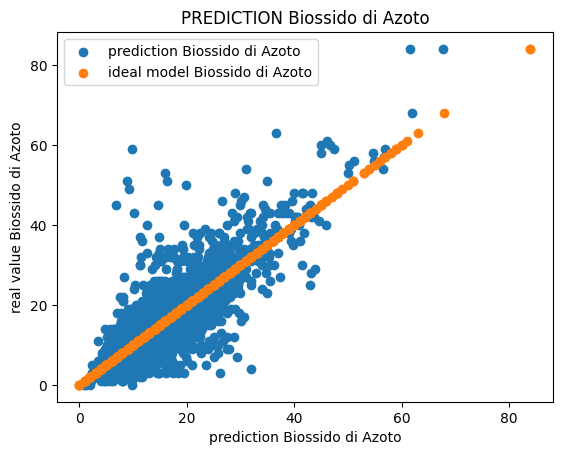

Biossido Zolfo


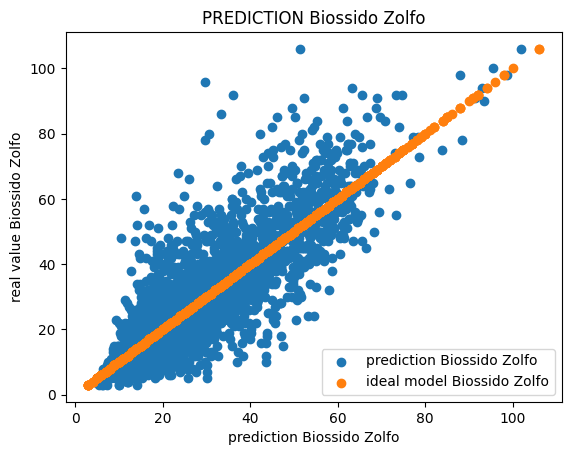

PM2.5


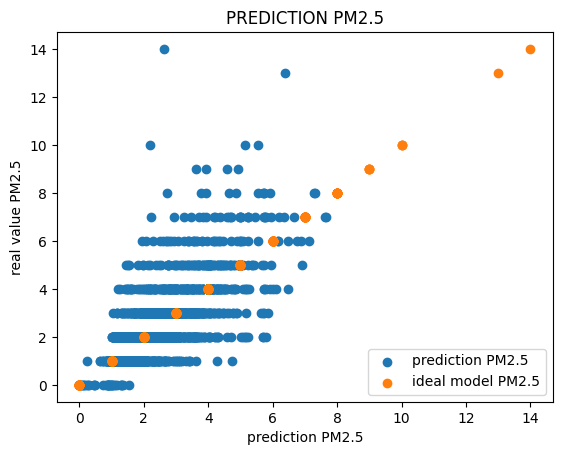

Ozono


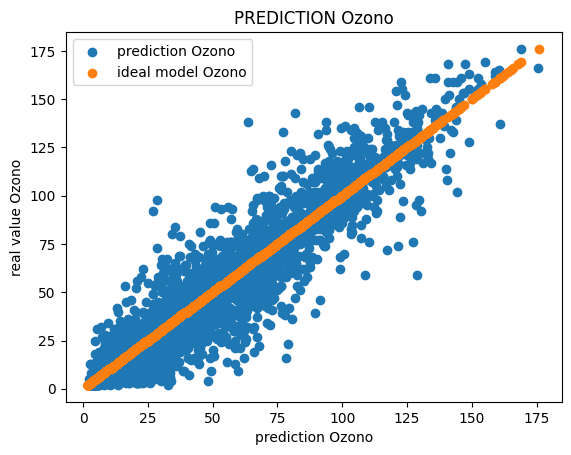

In [21]:
ind=0
lista_pollutant=[df1_StChiara, df4_StChiara, df5_StChiara, df7_StChiara, df8_StChiara, df11_StChiara, df12_StChiara, df13_StChiara, df14_StChiara, df15_StChiara] #df 9 and 10 are TBD

def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts
dfSC=dfSC.reset_index()
dfSC.ts=tempo(dfSC)
data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-06-30", "2022-01-14", "2021-01-13", "2022-06-30", "2022-01-14", "2023-02-08", "2023-02-08"]
data_fini=["2023-02-08", "2023-06-26", "2021-04-29", "2023-06-26", "2023-06-26", "2023-06-26", "2023-02-08", "2023-06-26", "2023-06-26", "2023-06-26"]
for i in lista_pollutant: 
    df_tot = dfAPPA.merge(lista_pollutant[ind].reset_index())

    df_tot = df_tot.set_index("ts")
    df_tot = df_tot.sort_index()
    df_tot = df_tot.dropna()
    df_tot = df_tot.reset_index()
    df_tot.ts=tempo(df_tot)

    DFTOT = df_tot.merge(dfSC[["ts","T", "RH", "P", "IAQ"]])

    try:
        DFTOT = DFTOT.set_index("ts")
    except:
        pass
    for i in DFTOT.columns:
        DFTOT[i] = pd.to_numeric(DFTOT[i],errors = "coerce" )
    DFTOT = DFTOT.dropna()

    DFTOT = DFTOT[data_ini[ind]:data_fini[ind]]


    X = DFTOT.drop(["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"], axis=1)

    y = DFTOT[["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"]].copy()

    try:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM=1

    x_train, x_test, y_train, y_test=train_test_split(X, y, shuffle = True, test_size=0.20)
    scaler=MinMaxScaler()
    scaler2 = MinMaxScaler()
    scaler.fit(x_train)

    X_train = scaler.transform(x_train)
    X_test = scaler.transform(x_test)


    scaler2.fit(y_train)

    y_train = scaler2.transform(y_train)
    y_test = scaler2.transform(y_test)




    rfr = RandomForestRegressor()
    RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=10, max_features=3, max_leaf_nodes=None,
                        max_samples=0.1, min_impurity_decrease=0.0,
                        min_samples_leaf=0.01,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False) 

    rfr.fit(x_train, y_train)
    score = rfr.score(x_train, y_train)

    print("R-squared:", score) 

    ypred = rfr.predict(x_test)

    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0)) 
    y_test = scaler2.inverse_transform(y_test)
    ypred = scaler2.inverse_transform(ypred)


    pollutant1 = "PM10"
    pollutant2 = "Biossido di Azoto"
    pollutant3 = "Biossido Zolfo"
    pollutant4 = "PM2.5"
    pollutant5 = "Ozono"

    pollutants = [pollutant1,pollutant2,pollutant3,pollutant4,pollutant5]

    for i,pollutant in enumerate(pollutants):
        plt.scatter(
            ypred[:,i],
            y_test[:,i]
            ,label="prediction " + pollutant
        )
        
        plt.scatter(
            y_test[:,i],
            y_test[:,i]
            ,label="ideal model " + pollutant
        )
        print(pollutant)

        plt.xlabel("prediction " + pollutant)
        plt.ylabel("real value " + pollutant)
        plt.title("PREDICTION " + pollutant)

        plt.legend()
        plt.show()



In [ ]:
ind=0
lista_pollutant=[df1_StChiara, df4_StChiara, df5_StChiara, df7_StChiara, df8_StChiara, df11_StChiara, df12_StChiara, df13_StChiara, df14_StChiara, df15_StChiara] #df 9 and 10 are TBD

def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts
dfSC=dfSC.reset_index()
dfSC.ts=tempo(dfSC)
data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-06-30", "2022-01-14", "2021-01-13", "2022-06-30", "2022-01-14", "2023-02-08", "2023-02-08"]
data_fini=["2023-02-08", "2023-06-26", "2021-04-29", "2023-06-26", "2023-06-26", "2023-06-26", "2023-02-08", "2023-06-26", "2023-06-26", "2023-06-26"]
for i in lista_pollutant: 
    df_tot = dfAPPA.merge(lista_pollutant[ind].reset_index())

    df_tot = df_tot.set_index("ts")
    df_tot = df_tot.sort_index()
    df_tot = df_tot.dropna()
    df_tot = df_tot.reset_index()
    df_tot.ts=tempo(df_tot)

    DFTOT = df_tot.merge(dfSC[["ts","T", "RH", "P", "IAQ"]])

    try:
        DFTOT = DFTOT.set_index("ts")
    except:
        pass
    for i in DFTOT.columns:
        DFTOT[i] = pd.to_numeric(DFTOT[i],errors = "coerce" )
    DFTOT = DFTOT.dropna()

    DFTOT = DFTOT[data_ini[ind]:data_fini[ind]]


    X = DFTOT.drop(["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"], axis=1)

    y = DFTOT[["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"]].copy()

    try:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM=1

    x_train, x_test, y_train, y_test=train_test_split(X, y, shuffle = True, test_size=0.20)
    scaler=MinMaxScaler()
    scaler2 = MinMaxScaler()
    scaler.fit(x_train)

    X_train = scaler.transform(x_train)
    X_test = scaler.transform(x_test)


    scaler2.fit(y_train)

    y_train = scaler2.transform(y_train)
    y_test = scaler2.transform(y_test)




    rfr = RandomForestRegressor()
    RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                        max_depth=10, max_features=3, max_leaf_nodes=None,
                        max_samples=0.1, min_impurity_decrease=0.0,
                        min_samples_leaf=0.01,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False) 

    rfr.fit(x_train, y_train)
    score = rfr.score(x_train, y_train)

    print("R-squared:", score) 

    ypred = rfr.predict(x_test)

    mse = mean_squared_error(y_test, ypred)
    print("MSE: ", mse)
    print("RMSE: ", mse*(1/2.0)) 
    y_test = scaler2.inverse_transform(y_test)
    ypred = scaler2.inverse_transform(ypred)


    pollutant1 = "PM10"
    pollutant2 = "Biossido di Azoto"
    pollutant3 = "Biossido Zolfo"
    pollutant4 = "PM2.5"
    pollutant5 = "Ozono"

    pollutants = [pollutant1,pollutant2,pollutant3,pollutant4,pollutant5]

    for i,pollutant in enumerate(pollutants):
        plt.scatter(
            ypred[:,i],
            y_test[:,i]
            ,label="prediction " + pollutant
        )
        
        plt.scatter(
            y_test[:,i],
            y_test[:,i]
            ,label="ideal model " + pollutant
        )
        print(pollutant)

        plt.xlabel("prediction " + pollutant)
        plt.ylabel("real value " + pollutant)
        plt.title("PREDICTION " + pollutant)

        plt.legend()
        plt.show()

